In [51]:
# Analysis4NLP.ipynb for SUPS and DeepEST

# making aggregarion

import os
import pandas as pd

# Define the base directory and folder names
base_dir = 'Results/Classification'
folders = ['SUPS', 'DeepEST']
datasets = ['imdb300AuxDS', 'imdbAuxDS', 'SSTIMDB3000AuxDS', 'SSTtestAuxDS']
aux_vars = ['confidence', 'dsa', 'entropy', 'lsa', 'similarity']
budgets = [50, 100, 200, 400, 800]

# Define the output directory for aggregated results
output_dir = 'DS4NLP_results'

# Create the output directory if it does not exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Function to read data based on file extension
def read_data(file_path):
    if file_path.endswith('.csv'):
        return pd.read_csv(file_path)
    elif file_path.endswith('.txt'):
        return pd.read_csv(file_path, delimiter=',')
    else:
        raise ValueError(f"Unsupported file format: {file_path}")

# Iterate over each folder, dataset, and auxiliary variable
for folder in folders:
    folder_path = os.path.join(base_dir, folder)
    
    # Create a subdirectory in the output directory for each folder
    output_folder_path = os.path.join(output_dir, folder)
    if not os.path.exists(output_folder_path):
        os.makedirs(output_folder_path)

    for dataset in datasets:
        for aux_var in aux_vars:
            # Prepare a list to collect dataframes for aggregation
            dataframes = []
            for budget in budgets:
                # Construct file names differently for DeepEST and others
                if folder == 'DeepEST':
                    file_name = f"{dataset}.{aux_var}_{budget}.csv"  # Use period for DeepEST
                else:
                    file_name = f"{dataset}_{aux_var}_{budget}.txt"  # Use underscore for others

                file_path = os.path.join(folder_path, file_name)
                
                # Check if the file exists
                if os.path.exists(file_path):
                    # Read the data and add a budget column
                    try:
                        data = read_data(file_path)
                        data['budget'] = budget
                        dataframes.append(data)
                    except Exception as e:
                        print(f"Error reading {file_path}: {e}")
                        continue
                else:
                    print(f"File not found: {file_name} in {folder}")
                    continue

            # Concatenate all dataframes for this dataset and auxiliary variable
            if dataframes:
                aggregated_data = pd.concat(dataframes, ignore_index=True)
                # Save the aggregated data to a new CSV file
                output_file = f"{dataset}_{aux_var}_agg.csv"
                output_path = os.path.join(output_folder_path, output_file)
                try:
                    aggregated_data.to_csv(output_path, index=False)
                    print(f"Aggregated data saved to {output_path}")
                except Exception as e:
                    print(f"Error saving aggregated data for {dataset} - {aux_var}: {e}")

print("Data aggregation completed.")

Aggregated data saved to DS4NLP_results/SUPS/imdb300AuxDS_confidence_agg.csv
Aggregated data saved to DS4NLP_results/SUPS/imdb300AuxDS_dsa_agg.csv
Aggregated data saved to DS4NLP_results/SUPS/imdb300AuxDS_entropy_agg.csv
Aggregated data saved to DS4NLP_results/SUPS/imdb300AuxDS_lsa_agg.csv
Aggregated data saved to DS4NLP_results/SUPS/imdb300AuxDS_similarity_agg.csv
Aggregated data saved to DS4NLP_results/SUPS/imdbAuxDS_confidence_agg.csv
Aggregated data saved to DS4NLP_results/SUPS/imdbAuxDS_dsa_agg.csv
Aggregated data saved to DS4NLP_results/SUPS/imdbAuxDS_entropy_agg.csv
Aggregated data saved to DS4NLP_results/SUPS/imdbAuxDS_lsa_agg.csv
Aggregated data saved to DS4NLP_results/SUPS/imdbAuxDS_similarity_agg.csv
Aggregated data saved to DS4NLP_results/SUPS/SSTIMDB3000AuxDS_confidence_agg.csv
Aggregated data saved to DS4NLP_results/SUPS/SSTIMDB3000AuxDS_dsa_agg.csv
Aggregated data saved to DS4NLP_results/SUPS/SSTIMDB3000AuxDS_entropy_agg.csv
Aggregated data saved to DS4NLP_results/SUPS/S

In [52]:
# for 'GBS', 'RHC-S', 'SSRS'
# making aggregarion

import os
import pandas as pd

# Define the base directory and folder names
base_dir = 'Results/Classification'
folders_to_process = ['GBS', 'RHC-S', 'SSRS','SRS', '2-UPS']

# Define the datasets and auxiliary variables
datasets = ['imdb300AuxDS', 'imdbAuxDS', 'SSTtestAuxDS']
aux_vars = ['Confidence_Score', 'DSA', 'LSA', 'Prediction_Entropy', 'Similarity_Score']
budgets = [50, 100, 200, 400, 800]

# Define the output directory for aggregated results
output_dir = 'DS4NLP_results'

# Create the output directory if it does not exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Function to read data based on file extension
def read_data(file_path):
    if file_path.endswith('.csv'):
        return pd.read_csv(file_path)
    elif file_path.endswith('.txt'):
        return pd.read_csv(file_path, delimiter=',')
    else:
        raise ValueError(f"Unsupported file format: {file_path}")

# Iterate over each specified folder
for folder in folders_to_process:
    folder_path = os.path.join(base_dir, folder)
    
    # Create a subdirectory in the output directory for each folder
    output_folder_path = os.path.join(output_dir, folder)
    if not os.path.exists(output_folder_path):
        os.makedirs(output_folder_path)

    for dataset in datasets:
        for aux_var in aux_vars:
            # Prepare a list to collect dataframes for aggregation
            dataframes = []
            for budget in budgets:
                # Construct file name for txt files
                file_name = f"{dataset}_{aux_var}_{budget}.txt"
                file_path = os.path.join(folder_path, file_name)
                
                # Check if the file exists
                if os.path.exists(file_path):
                    # Read the data and add a budget column
                    try:
                        data = read_data(file_path)
                        data['budget'] = budget
                        dataframes.append(data)
                    except Exception as e:
                        print(f"Error reading {file_path}: {e}")
                        continue
                else:
                    print(f"File not found: {file_name} in {folder}")
                    continue

            # Concatenate all dataframes for this dataset and auxiliary variable
            if dataframes:
                aggregated_data = pd.concat(dataframes, ignore_index=True)
                # Save the aggregated data to a new CSV file
                output_file = f"{dataset}_{aux_var}_agg.csv"
                output_path = os.path.join(output_folder_path, output_file)
                try:
                    aggregated_data.to_csv(output_path, index=False)
                    print(f"Aggregated data saved to {output_path}")
                except Exception as e:
                    print(f"Error saving aggregated data for {dataset} - {aux_var}: {e}")

print("Data aggregation completed.")

Aggregated data saved to DS4NLP_results/GBS/imdb300AuxDS_Confidence_Score_agg.csv
Aggregated data saved to DS4NLP_results/GBS/imdb300AuxDS_DSA_agg.csv
Aggregated data saved to DS4NLP_results/GBS/imdb300AuxDS_LSA_agg.csv
Aggregated data saved to DS4NLP_results/GBS/imdb300AuxDS_Prediction_Entropy_agg.csv
Aggregated data saved to DS4NLP_results/GBS/imdb300AuxDS_Similarity_Score_agg.csv
Aggregated data saved to DS4NLP_results/GBS/imdbAuxDS_Confidence_Score_agg.csv
Aggregated data saved to DS4NLP_results/GBS/imdbAuxDS_DSA_agg.csv
Aggregated data saved to DS4NLP_results/GBS/imdbAuxDS_LSA_agg.csv
Aggregated data saved to DS4NLP_results/GBS/imdbAuxDS_Prediction_Entropy_agg.csv
Aggregated data saved to DS4NLP_results/GBS/imdbAuxDS_Similarity_Score_agg.csv
Aggregated data saved to DS4NLP_results/GBS/SSTtestAuxDS_Confidence_Score_agg.csv
Aggregated data saved to DS4NLP_results/GBS/SSTtestAuxDS_DSA_agg.csv
Aggregated data saved to DS4NLP_results/GBS/SSTtestAuxDS_LSA_agg.csv
Aggregated data saved t

## RQ1,2 : RMSE, RMedSE, Mean Failure, STD Failures

In [54]:
import os
import pandas as pd
import numpy as np

# Define the base path and methods
base_path = "DS4NLP_results"
methods = ["DeepEST", "GBS", "RHC-S", "SSRS", "SUPS", 'SRS', '2-UPS']

# True accuracies for each dataset
true_accuracies = {
    "imdb300AuxDS": 0.8990,
    "imdbAuxDS": 0.8896,
    "SSTtestAuxDS": 0.9225700164744646
}

# Auxiliary variable mapping
aux_var_mapping = {
    "confidence": "Confidence_Score",
    "Confidence_Score": "Confidence_Score",
    "entropy": "Prediction_Entropy",
    "prediction": "Prediction_Entropy",  
    "Prediction_Entropy": "Prediction_Entropy",
    "similarity": "Similarity_Score",
    "Similarity_Score": "Similarity_Score",
    "dsa": "DSA",
    "DSA": "DSA",
    "lsa": "LSA",
    "LSA": "LSA"
}

# Function to calculate RMSE and RMedSE
def calculate_rmse_rmedse(accuracies, true_accuracy):
    squared_errors = (accuracies - true_accuracy) ** 2
    rmse = np.sqrt(np.mean(squared_errors))
    rmedse = np.sqrt(np.median(squared_errors))
    return rmse, rmedse

results = []

# Process each method and its associated files
for method in methods:
    method_path = os.path.join(base_path, method)
    if not os.path.exists(method_path):
        print(f"Directory not found: {method_path}")
        continue

    # List all files in the method directory
    for file_name in os.listdir(method_path):
        if not file_name.endswith(".csv"):
            continue

        dataset = file_name.split('_')[0]
        
        if dataset not in true_accuracies:
            continue

        file_path = os.path.join(method_path, file_name)
        
        try:
            data = pd.read_csv(file_path)
            if data.empty:
                print(f"No data in {file_name}")
                continue

            # Processing accuracies
            accuracies = data['accuracy'].values
            rmse, rmedse = calculate_rmse_rmedse(accuracies, true_accuracies[dataset])
            
            # Processing failures
            mean_failures = data['failures'].mean()
            std_failures = data['failures'].std()
            
            # Map auxiliary variable name
            aux_var_key = file_name.split('_')[1].split('.')[0].lower()
            aux_var = aux_var_mapping.get(aux_var_key, "Unknown Variable")

            results.append({
                "method": method,
                "dataset": dataset,
                "aux_var": aux_var,
                "RMSE": rmse,
                "RMedSE": rmedse,
                "Mean Failures": mean_failures,
                "STD Failures": std_failures
            })
        except Exception as e:
            print(f"Error processing {file_path}: {e}")

# Convert results to DataFrame and display
results_df = pd.DataFrame(results)
print(results_df)

# Save the results to a CSV file
results_df.to_csv("rmse_rmedse_failures.csv", index=False)

      method       dataset           aux_var      RMSE    RMedSE  \
0    DeepEST     imdbAuxDS               LSA  0.006781  0.003408   
1    DeepEST  imdb300AuxDS  Confidence_Score  0.049166  0.023258   
2    DeepEST  imdb300AuxDS  Similarity_Score  0.057486  0.023240   
3    DeepEST  imdb300AuxDS               LSA  0.007841  0.002724   
4    DeepEST  SSTtestAuxDS  Confidence_Score  0.041553  0.015825   
..       ...           ...               ...       ...       ...   
100    2-UPS     imdbAuxDS  Confidence_Score  0.028804  0.015395   
101    2-UPS  SSTtestAuxDS  Similarity_Score  0.024862  0.012570   
102    2-UPS  imdb300AuxDS               DSA  0.042787  0.029765   
103    2-UPS  SSTtestAuxDS  Confidence_Score  0.028390  0.013943   
104    2-UPS     imdbAuxDS               DSA  0.048547  0.029793   

     Mean Failures  STD Failures  
0       254.460000    224.883493  
1        67.366667     38.147087  
2         7.040000      6.780232  
3       175.446667    106.900602  
4       

In [55]:
results_df

method       dataset           aux_var      RMSE    RMedSE  \
0    DeepEST     imdbAuxDS               LSA  0.006781  0.003408   
1    DeepEST  imdb300AuxDS  Confidence_Score  0.049166  0.023258   
2    DeepEST  imdb300AuxDS  Similarity_Score  0.057486  0.023240   
3    DeepEST  imdb300AuxDS               LSA  0.007841  0.002724   
4    DeepEST  SSTtestAuxDS  Confidence_Score  0.041553  0.015825   
..       ...           ...               ...       ...       ...   
100    2-UPS     imdbAuxDS  Confidence_Score  0.028804  0.015395   
101    2-UPS  SSTtestAuxDS  Similarity_Score  0.024862  0.012570   
102    2-UPS  imdb300AuxDS               DSA  0.042787  0.029765   
103    2-UPS  SSTtestAuxDS  Confidence_Score  0.028390  0.013943   
104    2-UPS     imdbAuxDS               DSA  0.048547  0.029793   

     Mean Failures  STD Failures  
0       254.460000    224.883493  
1        67.366667     38.147087  
2         7.040000      6.780232  
3       175.446667    106.900602  
4        42.060000     18.766753  
..             ...           ...  
100      34.466667     31.643498  
101      23.946667     21.695819  
102      38.073333     35.706878  
103      26.173333     23.922343  
104      42.446667     38.590874  

[105 rows x 7 columns]

In [25]:
datasets = {
    "DeepEST": [
        "imdb300AuxDS_confidence_agg.csv",
        "imdb300AuxDS_dsa_agg.csv",
        "imdb300AuxDS_entropy_agg.csv",
        "imdb300AuxDS_lsa_agg.csv",
        "imdb300AuxDS_similarity_agg.csv",
        "imdbAuxDS_confidence_agg.csv",
        "imdbAuxDS_dsa_agg.csv",
        "imdbAuxDS_entropy_agg.csv",
        "imdbAuxDS_lsa_agg.csv",
        "imdbAuxDS_similarity_agg.csv",
        "SSTtestAuxDS_confidence_agg.csv",
        "SSTtestAuxDS_dsa_agg.csv",
        "SSTtestAuxDS_entropy_agg.csv",
        "SSTtestAuxDS_lsa_agg.csv",
        "SSTtestAuxDS_similarity_agg.csv"
    ],
    
    "GBS" : [
        "imdb300AuxDS_Confidence_Score_agg.csv",
        "imdb300AuxDS_dsa_agg.csv",
        "imdb300AuxDS_lsa_agg.csv",
        "imdb300AuxDS_Prediction_Entropy_agg.csv",
        "imdb300AuxDS_Similarity_Score_agg.csv",
        "imdbAuxDS_Confidence_Score_agg.csv",
        "imdbAuxDS_dsa_agg.csv",
        "imdbAuxDS_lsa_agg.csv",
        "imdbAuxDS_Prediction_Entropy_agg.csv",
        "imdbAuxDS_Similarity_Score_agg.csv",
        "SSTtestAuxDS_Confidence_Score_agg.csv",
        "SSTtestAuxDS_dsa_agg.csv",
        "SSTtestAuxDS_lsa_agg.csv",
        "SSTtestAuxDS_Prediction_Entropy_agg.csv",
        "SSTtestAuxDS_Similarity_Score_agg.csv"
         ]
    ,
    "RHC-S": [
        "imdb300AuxDS_Confidence_Score_agg.csv",
        "imdb300AuxDS_dsa_agg.csv",
        "imdb300AuxDS_lsa_agg.csv",
        "imdb300AuxDS_Prediction_Entropy_agg.csv",
        "imdb300AuxDS_Similarity_Score_agg.csv",
        "imdbAuxDS_Confidence_Score_agg.csv",
        "imdbAuxDS_dsa_agg.csv",
        "imdbAuxDS_lsa_agg.csv",
        "imdbAuxDS_Prediction_Entropy_agg.csv",
        "imdbAuxDS_Similarity_Score_agg.csv",
        "SSTtestAuxDS_Confidence_Score_agg.csv",
        "SSTtestAuxDS_dsa_agg.csv",
        "SSTtestAuxDS_lsa_agg.csv",
        "SSTtestAuxDS_Prediction_Entropy_agg.csv",
        "SSTtestAuxDS_Similarity_Score_agg.csv"
    ],
    "SSRS": [
        "imdb300AuxDS_Confidence_Score_agg.csv",
        "imdb300AuxDS_dsa_agg.csv",
        "imdb300AuxDS_lsa_agg.csv",
        "imdb300AuxDS_Prediction_Entropy_agg.csv",
        "imdb300AuxDS_Similarity_Score_agg.csv",
        "imdbAuxDS_Confidence_Score_agg.csv",
        "imdbAuxDS_dsa_agg.csv",
        "imdbAuxDS_lsa_agg.csv",
        "imdbAuxDS_Prediction_Entropy_agg.csv",
        "imdbAuxDS_Similarity_Score_agg.csv",
        "SSTtestAuxDS_Confidence_Score_agg.csv",
        "SSTtestAuxDS_dsa_agg.csv",
        "SSTtestAuxDS_lsa_agg.csv",
        "SSTtestAuxDS_Prediction_Entropy_agg.csv",
        "SSTtestAuxDS_Similarity_Score_agg.csv"
    ],
    "SUPS": [
        "imdb300AuxDS_confidence_agg.csv",
        "imdb300AuxDS_dsa_agg.csv",
        "imdb300AuxDS_entropy_agg.csv",
        "imdb300AuxDS_lsa_agg.csv",
        "imdb300AuxDS_similarity_agg.csv",
        "imdbAuxDS_confidence_agg.csv",
        "imdbAuxDS_dsa_agg.csv",
        "imdbAuxDS_entropy_agg.csv",
        "imdbAuxDS_lsa_agg.csv",
        "imdbAuxDS_similarity_agg.csv",
        "SSTtestAuxDS_confidence_agg.csv",
        "SSTtestAuxDS_dsa_agg.csv",
        "SSTtestAuxDS_entropy_agg.csv",
        "SSTtestAuxDS_lsa_agg.csv",
        "SSTtestAuxDS_similarity_agg.csv"
    ]
    ,
    "SRS" : [
        "imdb300AuxDS_Confidence_Score_agg.csv",
        "imdb300AuxDS_DSA_agg.csv",
        "imdb300AuxDS_LSA_agg.csv",
        "imdb300AuxDS_Prediction_Entropy_agg.csv",
        "imdb300AuxDS_Similarity_Score_agg.csv",
        "imdbAuxDS_Confidence_Score_agg.csv",
        "imdbAuxDS_DSA_agg.csv",
        "imdbAuxDS_LSA_agg.csv",
        "imdbAuxDS_Prediction_Entropy_agg.csv",
        "imdbAuxDS_Similarity_Score_agg.csv",
        "SSTtestAuxDS_Confidence_Score_agg.csv",
        "SSTtestAuxDS_DSA_agg.csv",
        "SSTtestAuxDS_LSA_agg.csv",
        "SSTtestAuxDS_Prediction_Entropy_agg.csv",
        "SSTtestAuxDS_Similarity_Score_agg.csv"
    ]
    , 
    "2-UPS" : [
        "imdb300AuxDS_Confidence_Score_agg.csv",
        "imdb300AuxDS_DSA_agg.csv",
        "imdb300AuxDS_LSA_agg.csv",
        "imdb300AuxDS_Prediction_Entropy_agg.csv",
        "imdb300AuxDS_Similarity_Score_agg.csv",
        "imdbAuxDS_Confidence_Score_agg.csv",
        "imdbAuxDS_DSA_agg.csv",
        "imdbAuxDS_LSA_agg.csv",
        "imdbAuxDS_Prediction_Entropy_agg.csv",
        "imdbAuxDS_Similarity_Score_agg.csv",
        "SSTtestAuxDS_Confidence_Score_agg.csv",
        "SSTtestAuxDS_DSA_agg.csv",
        "SSTtestAuxDS_LSA_agg.csv",
        "SSTtestAuxDS_Prediction_Entropy_agg.csv",
        "SSTtestAuxDS_Similarity_Score_agg.csv"
         ]
}

In [72]:
import os
import pandas as pd
import numpy as np

# Define the base path and methods
base_path = "DS4NLP_results"
methods = ["DeepEST", "GBS", "RHC-S", "SSRS", "SUPS", 'SRS', '2-UPS']

# True accuracies for each dataset
true_accuracies = {
    "imdb300AuxDS": 0.8990,
    "imdbAuxDS": 0.8896,
    "SSTtestAuxDS": 0.9225700164744646
}

# Auxiliary variable mapping
aux_var_mapping = {
    "confidence": "Confidence_Score",
    "Confidence_Score": "Confidence_Score",
    "entropy": "Prediction_Entropy",
    "prediction": "Prediction_Entropy",  
    "Prediction_Entropy": "Prediction_Entropy",
    "similarity": "Similarity_Score",
    "Similarity_Score": "Similarity_Score",
    "dsa": "DSA",
    "DSA": "DSA",
    "lsa": "LSA",
    "LSA": "LSA"
}

# Function to calculate RMSE and RMedSE
def calculate_rmse_rmedse(accuracies, true_accuracy):
    squared_errors = (accuracies - true_accuracy) ** 2
    rmse = np.sqrt(np.mean(squared_errors))
    rmedse = np.sqrt(np.median(squared_errors))
    return rmse, rmedse

results = []

# Iterate over each method and dataset
for method in methods:
    for file_name in datasets[method]:
        dataset = file_name.split('_')[0]
        
        if dataset not in true_accuracies:
            continue

        file_path = os.path.join(base_path, method, file_name)
        
        if not os.path.exists(file_path):
            print(f"File not found: {file_path}")
            continue

        # Read the data
        try:
            data = pd.read_csv(file_path)
            data = data[data['budget'] == 200]  # Focus on budget 200
            if data.empty:
                print(f"No records with budget 200 in {file_name}")
                continue
            print(f"Processing file: {file_path}")
            
            accuracies = data['accuracy'].values
            rmse, rmedse = calculate_rmse_rmedse(accuracies, true_accuracies[dataset])
            failures_mean = data['failures'].mean()
            failures_std = data['failures'].std()
            
            results.append({
                "method": method,
                "dataset": dataset,
                "aux_var": aux_var_mapping.get(file_name.split('_')[1].split('.')[0].lower(), "Unknown Variable"),
                "RMSE": rmse,
                "RMedSE": rmedse,
                "failures_mean": failures_mean,
                "failures_std": failures_std
            })
            
        except Exception as e:
            print(f"Error processing {file_path}: {e}")

# Convert results to DataFrame and display
results_df = pd.DataFrame(results)
print(results_df)

# Save the results to a CSV file for records with budget 200
results_df.to_csv("rmse_rmedse_failures200.csv", index=False)

Processing file: DS4NLP_results/DeepEST/imdb300AuxDS_confidence_agg.csv
Processing file: DS4NLP_results/DeepEST/imdb300AuxDS_dsa_agg.csv
Processing file: DS4NLP_results/DeepEST/imdb300AuxDS_entropy_agg.csv
Processing file: DS4NLP_results/DeepEST/imdb300AuxDS_lsa_agg.csv
Processing file: DS4NLP_results/DeepEST/imdb300AuxDS_similarity_agg.csv
Processing file: DS4NLP_results/DeepEST/imdbAuxDS_confidence_agg.csv
Processing file: DS4NLP_results/DeepEST/imdbAuxDS_dsa_agg.csv
Processing file: DS4NLP_results/DeepEST/imdbAuxDS_entropy_agg.csv
Processing file: DS4NLP_results/DeepEST/imdbAuxDS_lsa_agg.csv
Processing file: DS4NLP_results/DeepEST/imdbAuxDS_similarity_agg.csv
Processing file: DS4NLP_results/DeepEST/SSTtestAuxDS_confidence_agg.csv
Processing file: DS4NLP_results/DeepEST/SSTtestAuxDS_dsa_agg.csv
Processing file: DS4NLP_results/DeepEST/SSTtestAuxDS_entropy_agg.csv
Processing file: DS4NLP_results/DeepEST/SSTtestAuxDS_lsa_agg.csv
Processing file: DS4NLP_results/DeepEST/SSTtestAuxDS_simil

In [73]:
results_df

method       dataset             aux_var      RMSE    RMedSE  \
0    DeepEST  imdb300AuxDS    Confidence_Score  0.046567  0.026221   
1    DeepEST  imdb300AuxDS                 DSA  0.016135  0.008057   
2    DeepEST  imdb300AuxDS  Prediction_Entropy  0.041714  0.026660   
3    DeepEST  imdb300AuxDS                 LSA  0.007369  0.002580   
4    DeepEST  imdb300AuxDS    Similarity_Score  0.033537  0.019886   
..       ...           ...                 ...       ...       ...   
100    2-UPS  SSTtestAuxDS    Confidence_Score  0.017719  0.012720   
101    2-UPS  SSTtestAuxDS                 DSA  0.058226  0.052578   
102    2-UPS  SSTtestAuxDS                 LSA  0.072877  0.072430   
103    2-UPS  SSTtestAuxDS  Prediction_Entropy  0.060796  0.059982   
104    2-UPS  SSTtestAuxDS    Similarity_Score  0.016463  0.007570   

     failures_mean  failures_std  
0        72.233333      2.967448  
1        20.300000      3.281610  
2        73.300000      3.621297  
3       161.533333      5.975429  
4         4.333333      1.422318  
..             ...           ...  
100      16.566667      3.297683  
101      24.600000      6.703576  
102       0.933333      0.827682  
103       3.466667      1.870521  
104      15.200000      3.336321  

[105 rows x 7 columns]

In [26]:
#budget 200, fridman dunn
import os
import pandas as pd
import numpy as np
from scipy.stats import friedmanchisquare
import scikit_posthocs as sp

# Define the base path and methods
base_path = "DS4NLP_results"
methods = ["DeepEST", "GBS", "RHC-S", "SSRS", "SUPS", 'SRS', '2-UPS']



# Auxiliary variable mapping
aux_var_mapping = {
    "confidence": "Confidence_Score",
    "Confidence_Score": "Confidence_Score",
    "entropy": "Prediction_Entropy",
    "prediction": "Prediction_Entropy",
    "Prediction_Entropy": "Prediction_Entropy",
    "similarity": "Similarity_Score",
    "Similarity_Score": "Similarity_Score",
    "dsa": "DSA",
    "DSA": "DSA",
    "lsa": "LSA",
    "LSA": "LSA"
}

# True accuracies for each dataset
true_accuracies = {
    "imdb300AuxDS": 0.8990,
    "imdbAuxDS": 0.8896,
    "SSTtestAuxDS": 0.9226
}

def calculate_rmse_rmedse(accuracies, true_accuracy):
    squared_errors = (accuracies - true_accuracy) ** 2
    rmse = np.sqrt(np.mean(squared_errors))
    rmedse = np.sqrt(np.median(squared_errors))
    return rmse, rmedse

results = []

# Processing each dataset for each method
for method in methods:
    dataset_count = len(datasets[method])
    print(f"Processing {dataset_count} datasets for method: {method}")
    for file_name in datasets[method]:
        dataset = file_name.split('_')[0]
        true_accuracy = true_accuracies.get(dataset, None)
        if not true_accuracy:
            continue

        file_path = os.path.join(base_path, method, file_name)
        if not os.path.exists(file_path):
            continue

        try:
            data = pd.read_csv(file_path)
            data = data[data['budget'] == 200]  # Filter for budget 200
            if data.empty:
                continue
            accuracies = data['accuracy'].apply(lambda x: float(str(x).split(":")[-1])).values
            aux_var_key = file_name.split('_')[1].replace(".csv", "").lower()
            aux_var = aux_var_mapping.get(aux_var_key, "Unknown Variable")
            rmse, rmedse = calculate_rmse_rmedse(accuracies, true_accuracy)

            results.append({
                "method": method,
                "dataset": dataset,
                "aux_var": aux_var,
                "RMSE": rmse,
                "RMedSE": rmedse
            })
        except Exception as e:
            continue

results_df = pd.DataFrame(results)
pivot_df = results_df.pivot_table(index=['dataset', 'aux_var'], columns='method', values='RMSE', aggfunc=np.mean)

# Perform the Friedman test
stat, p_value = friedmanchisquare(*[pivot_df[method].dropna().values for method in methods])
print(f'Friedman test statistic: {stat}, p-value: {p_value}')

# If the Friedman test is significant, proceed with Dunn's test
if p_value < 0.05:
    melted_df = pivot_df.reset_index().melt(id_vars=['dataset', 'aux_var'], var_name='method', value_name='RMSE')
    dunn_results = sp.posthoc_dunn(melted_df, val_col='RMSE', group_col='method', p_adjust='bonferroni')
    print("Dunn's posthoc test results:")
    print(dunn_results)

Processing 15 datasets for method: DeepEST
Processing 15 datasets for method: GBS
Processing 15 datasets for method: RHC-S
Processing 15 datasets for method: SSRS
Processing 15 datasets for method: SUPS
Processing 15 datasets for method: SRS
Processing 15 datasets for method: 2-UPS
Friedman test statistic: 22.415770609319, p-value: 0.0010177298285168515
Dunn's posthoc test results:
            2-UPS   DeepEST       GBS    RHC-S       SRS      SSRS      SUPS
2-UPS    1.000000  1.000000  1.000000  1.00000  0.387895  0.500097  1.000000
DeepEST  1.000000  1.000000  1.000000  1.00000  1.000000  0.009094  1.000000
GBS      1.000000  1.000000  1.000000  1.00000  1.000000  0.013886  1.000000
RHC-S    1.000000  1.000000  1.000000  1.00000  1.000000  0.115680  1.000000
SRS      0.387895  1.000000  1.000000  1.00000  1.000000  0.000082  0.834856
SSRS     0.500097  0.009094  0.013886  0.11568  0.000082  1.000000  0.219897
SUPS     1.000000  1.000000  1.000000  1.00000  0.834856  0.219897  1.000000

In [77]:
import os
import pandas as pd
import numpy as np
from scipy.stats import friedmanchisquare
import scikit_posthocs as sp

# Define paths, methods, and other configuration
base_path = "DS4NLP_results"
methods = ["DeepEST", "GBS", "RHC-S", "SSRS", "SUPS", 'SRS', '2-UPS']


# Define mappings and true accuracies
aux_var_mapping = {
    "confidence": "Confidence_Score",
    "Confidence_Score": "Confidence_Score",
    "entropy": "Prediction_Entropy",
    "prediction": "Prediction_Entropy",
    "Prediction_Entropy": "Prediction_Entropy",
    "similarity": "Similarity_Score",
    "Similarity_Score": "Similarity_Score",
    "dsa": "DSA",
    "DSA": "DSA",
    "lsa": "LSA",
    "LSA": "LSA"
}

# True accuracies for each dataset
true_accuracies = {
    "imdb300AuxDS": 0.8990,
    "imdbAuxDS": 0.8896,
    "SSTtestAuxDS": 0.9226
}

def calculate_rmse_rmedse(accuracies, true_accuracy):
    squared_errors = (accuracies - true_accuracy) ** 2
    rmse = np.sqrt(np.mean(squared_errors))
    rmedse = np.sqrt(np.median(squared_errors))
    return rmse, rmedse

results = []

# Process each dataset for each method
for method in methods:
    for file_name in datasets.get(method, []):
        dataset = file_name.split('_')[0]
        true_accuracy = true_accuracies.get(dataset)
        if not true_accuracy:
            continue  # Skip if no true accuracy is defined

        file_path = os.path.join(base_path, method, file_name)
        try:
            data = pd.read_csv(file_path)
            accuracies = data['accuracy'].apply(lambda x: float(str(x).split(":")[-1])).values
            aux_var_key = file_name.split('_')[1].replace(".csv", "").lower()
            aux_var = aux_var_mapping.get(aux_var_key, "Unknown Variable")
            rmse, rmedse = calculate_rmse_rmedse(accuracies, true_accuracy)
            results.append({
                "method": method,
                "dataset": dataset,
                "aux_var": aux_var,
                "RMSE": rmse,
                "RMedSE": rmedse
            })
        except Exception as e:
            print(f"Error processing {file_path}: {e}")

# Create DataFrame from results
results_df = pd.DataFrame(results)
if not results_df.empty:
    pivot_df = results_df.pivot_table(index=['dataset', 'aux_var'], columns='method', values='RMSE', aggfunc=np.mean)

    # Filter rows where all methods have data
    pivot_df = pivot_df.dropna()

    # Run Friedman test if there are enough data
    if not pivot_df.empty and len(pivot_df.columns) >= 3:
        try:
            stat, p_value = friedmanchisquare(*[pivot_df[method].values for method in pivot_df.columns])
            print(f'Friedman test statistic: {stat}, p-value: {p_value}')

            if p_value < 0.05:
                melted_df = pivot_df.reset_index().melt(id_vars=['dataset', 'aux_var'], var_name='method', value_name='RMSE')
                dunn_results = sp.posthoc_dunn(melted_df, val_col='RMSE', group_col='method', p_adjust='bonferroni')
                print("Dunn's posthoc test results:")
                print(dunn_results)
        except Exception as e:
            print(f"Error running Friedman test: {e}")
    else:
        print("Not enough data to perform Friedman test.")
else:
    print("No results to process.")

Friedman test statistic: 21.96414852752881, p-value: 0.0012291198830390786
Dunn's posthoc test results:
            2-UPS  DeepEST       GBS     RHC-S       SRS      SSRS      SUPS
2-UPS    1.000000  1.00000  1.000000  1.000000  0.320634  0.384304  1.000000
DeepEST  1.000000  1.00000  1.000000  1.000000  1.000000  0.031250  1.000000
GBS      1.000000  1.00000  1.000000  1.000000  1.000000  0.025383  1.000000
RHC-S    1.000000  1.00000  1.000000  1.000000  0.233496  0.518115  1.000000
SRS      0.320634  1.00000  1.000000  0.233496  1.000000  0.000036  1.000000
SSRS     0.384304  0.03125  0.025383  0.518115  0.000036  1.000000  0.091429
SUPS     1.000000  1.00000  1.000000  1.000000  1.000000  0.091429  1.000000


In [79]:
import os
import pandas as pd
import numpy as np
from scipy.stats import friedmanchisquare
import scikit_posthocs as sp

# Define paths and methods
base_path = "DS4NLP_results"
methods = ["DeepEST", "GBS", "RHC-S", "SSRS", "SUPS", 'SRS', '2-UPS']

# Auxiliary variable mapping
aux_var_mapping = {
    "confidence": "Confidence_Score",
    "Confidence_Score": "Confidence_Score",
    "entropy": "Prediction_Entropy",
    "prediction": "Prediction_Entropy",
    "Prediction_Entropy": "Prediction_Entropy",
    "similarity": "Similarity_Score",
    "Similarity_Score": "Similarity_Score",
    "dsa": "DSA",
    "DSA": "DSA",
    "lsa": "LSA",
    "LSA": "LSA"
}

# Simulated loading of data
results = []
for method in methods:
    method_path = os.path.join(base_path, method)
    for filename in os.listdir(method_path):
        parts = filename.replace('.csv', '').split('_')
        if len(parts) >= 2:
            dataset_category = parts[0]
            aux_var_key = parts[1].lower()
            aux_var = aux_var_mapping.get(aux_var_key, "Unknown Variable")
            if aux_var != "Unknown Variable":
                # Simulate more realistic RMSE calculations
                simulated_rmse = np.random.normal(0.05, 0.01) + np.random.rand() * 0.01
                results.append({
                    "method": method,
                    "dataset_category": dataset_category,
                    "aux_var": aux_var,
                    "RMSE": simulated_rmse
                })

# Convert the list of dictionaries to a DataFrame
results_df = pd.DataFrame(results)

# Perform statistical tests for each auxiliary variable across all datasets
for aux in set(results_df['aux_var']):
    if aux == "Unknown Variable":
        continue
    print(f"\nResults for auxiliary variable: {aux}")
    aux_df = results_df[results_df['aux_var'] == aux]
    
    for dataset in set(aux_df['dataset_category']):
        print(f"Analyzing {aux} in {dataset}")
        dataset_df = aux_df[aux_df['dataset_category'] == dataset]

        if dataset_df['method'].nunique() >= 3:
            pivot_df = dataset_df.pivot_table(index='method', values='RMSE', aggfunc='mean')

            if not all(m in pivot_df.index for m in methods):
                print("Missing data for some methods, skipping statistical tests.")
                continue

            try:
                stats = friedmanchisquare(*(pivot_df.loc[m].values for m in pivot_df.index))
                stat, p_value = stats
                print(f"Friedman test for {aux} in {dataset}: Statistic={stat}, p-value={p_value}")

                if p_value < 0.05:
                    dunn_results = sp.posthoc_dunn(dataset_df, val_col='RMSE', group_col='method', p_adjust='bonferroni')
                    print(f"Dunn's posthoc test results for {aux} in {dataset}:\n{dunn_results}")
            except Exception as e:
                print(f"Error in statistical testing for {aux} in {dataset}: {e}")
        else:
            print(f"Not enough methods with data for {aux} in {dataset}.")


Results for auxiliary variable: Confidence_Score
Analyzing Confidence_Score in imdbAuxDS
Friedman test for Confidence_Score in imdbAuxDS: Statistic=6.0, p-value=0.42319008112684364
Analyzing Confidence_Score in SSTIMDB3000AuxDS
Missing data for some methods, skipping statistical tests.
Analyzing Confidence_Score in SSTtestAuxDS
Friedman test for Confidence_Score in SSTtestAuxDS: Statistic=6.0, p-value=0.42319008112684364
Analyzing Confidence_Score in imdb300AuxDS
Friedman test for Confidence_Score in imdb300AuxDS: Statistic=6.0, p-value=0.42319008112684364

Results for auxiliary variable: Prediction_Entropy
Analyzing Prediction_Entropy in imdbAuxDS
Friedman test for Prediction_Entropy in imdbAuxDS: Statistic=6.0, p-value=0.42319008112684364
Analyzing Prediction_Entropy in imdb300AuxDS
Friedman test for Prediction_Entropy in imdb300AuxDS: Statistic=6.0, p-value=0.42319008112684364
Analyzing Prediction_Entropy in SSTIMDB3000AuxDS
Missing data for some methods, skipping statistical tests

In [17]:
for dataset in datasets:
    for aux_var in aux_vars:
        subset_df = data[(data['dataset'] == dataset) & (data['aux_var'] == aux_var)].copy()
        if subset_df.empty:
            print(f"No data available for dataset {dataset} and auxiliary variable {aux_var}")
            continue

        # Checking standard deviation across the mean RMSE values
        std_dev = subset_df['RMSE'].std()
        print(f"Standard deviation for {dataset} - {aux_var}: {std_dev}")

        if std_dev < 1e-6:  # Very small std deviation indicates little to no variability
            print(f"Insufficient variance for dataset {dataset} and auxiliary variable {aux_var}. Skipping...")
            continue

        # Continue with the test if there's enough variability...

Standard deviation for imdb300AuxDS - Confidence_Score: 0.10172609882476957
Standard deviation for imdb300AuxDS - DSA: 0.02588958748848022
Standard deviation for imdb300AuxDS - Prediction_Entropy: 0.08422529436998581
Standard deviation for imdb300AuxDS - LSA: 0.23428726465037128
Standard deviation for imdb300AuxDS - Similarity_Score: 0.13387070165906872
Standard deviation for imdbAuxDS - Confidence_Score: 0.0985872224504819
Standard deviation for imdbAuxDS - DSA: 0.026215949499286142
Standard deviation for imdbAuxDS - Prediction_Entropy: 0.08020627007068173
Standard deviation for imdbAuxDS - LSA: 0.15673467995616266
Standard deviation for imdbAuxDS - Similarity_Score: 0.04129288106459728
Standard deviation for SSTtestAuxDS - Confidence_Score: 0.10069486110542485
Standard deviation for SSTtestAuxDS - DSA: 0.039551386805743875
Standard deviation for SSTtestAuxDS - Prediction_Entropy: 0.09514485626142753
Standard deviation for SSTtestAuxDS - LSA: 0.24375402069045668
Standard deviation for

In [19]:
for dataset in datasets:
    for aux_var in aux_vars:
        # Subset the data for the current dataset and auxiliary variable
        subset_df = data[(data['dataset'] == dataset) & (data['aux_var'] == aux_var)]
        print(f"Data for {dataset} - {aux_var}:")
        print(subset_df[['method', 'RMSE']])

        # Check if there is enough data to run the test
        if len(subset_df) < len(methods):
            print(f"Not enough data for {dataset} - {aux_var}")
            continue

        # Run the Friedman test
        stat, p_value = friedmanchisquare(*[subset_df[subset_df['method'] == method]['RMSE'] for method in methods])
        print(f"Friedman test statistic for {dataset} - {aux_var}: {stat}, p-value: {p_value}")

Data for imdb300AuxDS - Confidence_Score:
      method      RMSE
210  DeepEST  0.046567
225      GBS  0.018212
240    RHC-S  0.029595
255     SSRS  0.296975
270     SUPS  0.041596
285      SRS  0.020765
300    2-UPS  0.019844
Friedman test statistic for imdb300AuxDS - Confidence_Score: 6.0, p-value: 0.42319008112684364
Data for imdb300AuxDS - DSA:
      method      RMSE
211  DeepEST  0.016135
226      GBS  0.022023
241    RHC-S  0.018893
256     SSRS  0.089138
271     SUPS  0.037309
286      SRS  0.017483
301    2-UPS  0.036624
Friedman test statistic for imdb300AuxDS - DSA: 6.0, p-value: 0.42319008112684364
Data for imdb300AuxDS - Prediction_Entropy:
      method      RMSE
212  DeepEST  0.041714
228      GBS  0.023759
243    RHC-S  0.023478
258     SSRS  0.253065
272     SUPS  0.034199
288      SRS  0.018978
303    2-UPS  0.051958
Friedman test statistic for imdb300AuxDS - Prediction_Entropy: 6.0, p-value: 0.42319008112684364
Data for imdb300AuxDS - LSA:
      method      RMSE
213  De

In [18]:
import pandas as pd
import numpy as np
from scipy.stats import friedmanchisquare
import scikit_posthocs as sp
from statsmodels.stats.multitest import multipletests

# Load the dataset
data = pd.read_csv("DS4NLP_rsearch_results/combined_datasetsRQ123.csv")

# True accuracies for each dataset
true_accuracies = {
    "imdb300AuxDS": 0.8990,
    "imdbAuxDS": 0.8896,
    "SSTtestAuxDS": 0.9225700164744646
}

# Auxiliary variables and datasets
aux_vars = data['aux_var'].unique()
datasets = data['dataset'].unique()
methods = data['method'].unique()

# Ensure that all required columns are in the data
required_columns = ['dataset', 'aux_var', 'method', 'RMSE']
if not all(col in data.columns for col in required_columns):
    raise ValueError("The dataset does not contain the necessary columns.")

# Initialize a dictionary to store results
friedman_results = {}

# Loop through each combination of dataset and auxiliary variable
for dataset in datasets:
    for aux_var in aux_vars:
        # Subset the data for the current dataset and auxiliary variable
        subset_df = data[(data['dataset'] == dataset) & (data['aux_var'] == aux_var)]

        # Ensure there are enough data points to perform the test
        if subset_df.shape[0] < 2:
            print(f"Not enough data for {dataset} - {aux_var}. Skipping.")
            continue

        # Check if there is variation in the RMSE values
        if subset_df['RMSE'].std() == 0:
            print(f"No variation in RMSE for {dataset} - {aux_var}. Skipping.")
            continue

        # Perform the Friedman test
        try:
            stat, p_value = friedmanchisquare(*[subset_df[subset_df['method'] == method]['RMSE'].values for method in methods])
            friedman_results[(dataset, aux_var)] = (stat, p_value)
            print(f"Friedman test statistic for {dataset} - {aux_var}: {stat}, p-value: {p_value}")

            # If significant, perform Dunn's post hoc test
            if p_value < 0.05:
                dunn_results = sp.posthoc_dunn(subset_df, val_col='RMSE', group_col='method', p_adjust=None)
                print(f"Raw Dunn's post hoc test results for {dataset} - {aux_var}:\n{dunn_results}\n")

                # Flatten the Dunn results into a list of p-values
                p_values = dunn_results.values[np.triu_indices_from(dunn_results, k=1)]

                # Apply Holm-Bonferroni correction
                reject, pvals_corrected, _, _ = multipletests(p_values, method='holm')

                # Reconstruct the adjusted p-value matrix
                corrected_matrix = np.zeros_like(dunn_results, dtype=float)
                corrected_matrix[np.triu_indices_from(corrected_matrix, k=1)] = pvals_corrected
                corrected_matrix = corrected_matrix + corrected_matrix.T  # Symmetrize the matrix
                corrected_dunn_results = pd.DataFrame(corrected_matrix, index=dunn_results.index, columns=dunn_results.columns)

                print(f"Holm-Bonferroni corrected Dunn's post hoc test results for {dataset} - {aux_var}:\n{corrected_dunn_results}\n")

        except Exception as e:
            print(f"Error performing tests for {dataset} - {aux_var}: {e}")

Friedman test statistic for imdb300AuxDS - Confidence_Score: 24.257142857142867, p-value: 0.0004683232555248761
Raw Dunn's post hoc test results for imdb300AuxDS - Confidence_Score:
            2-UPS   DeepEST       GBS     RHC-S       SRS      SSRS      SUPS
2-UPS    1.000000  0.370809  0.734258  0.665706  0.757621  0.002249  0.146933
DeepEST  0.370809  1.000000  0.217044  0.643429  0.228757  0.030754  0.578558
GBS      0.734258  0.217044  1.000000  0.440401  0.975381  0.000687  0.073467
RHC-S    0.665706  0.643429  0.440401  1.000000  0.458902  0.008712  0.308487
SRS      0.757621  0.228757  0.975381  0.458902  1.000000  0.000769  0.078568
SSRS     0.002249  0.030754  0.000687  0.008712  0.000769  1.000000  0.108548
SUPS     0.146933  0.578558  0.073467  0.308487  0.078568  0.108548  1.000000

Holm-Bonferroni corrected Dunn's post hoc test results for imdb300AuxDS - Confidence_Score:
            2-UPS   DeepEST       GBS     RHC-S       SRS      SSRS  SUPS
2-UPS    0.000000  1.000000

Holm-Bonferroni corrected Dunn's post hoc test results for SSTtestAuxDS - DSA:
            2-UPS   DeepEST       GBS     RHC-S       SRS      SSRS      SUPS
2-UPS    0.000000  0.198870  0.262329  0.084661  0.339779  1.000000  1.000000
DeepEST  0.198870  0.000000  1.000000  1.000000  1.000000  0.021416  1.000000
GBS      0.262329  1.000000  0.000000  1.000000  1.000000  0.031257  1.000000
RHC-S    0.084661  1.000000  1.000000  0.000000  1.000000  0.007220  0.541706
SRS      0.339779  1.000000  1.000000  1.000000  0.000000  0.044851  1.000000
SSRS     1.000000  0.021416  0.031257  0.007220  0.044851  0.000000  1.000000
SUPS     1.000000  1.000000  1.000000  0.541706  1.000000  1.000000  0.000000

Friedman test statistic for SSTtestAuxDS - Prediction_Entropy: 22.19999999999999, p-value: 0.001113853827142421
Raw Dunn's post hoc test results for SSTtestAuxDS - Prediction_Entropy:
            2-UPS   DeepEST       GBS     RHC-S       SRS      SSRS      SUPS
2-UPS    1.000000  0.101920  0.010

In [28]:
import pandas as pd
import numpy as np
from scipy.stats import friedmanchisquare
import scikit_posthocs as sp
from statsmodels.stats.multitest import multipletests

# Load the dataset
data = pd.read_csv("DS4NLP_rsearch_results/combined_datasetsRQ123.csv")

# Auxiliary variables and datasets
aux_vars = data['aux_var'].unique()
datasets = data['dataset'].unique()
methods = data['method'].unique()

# Initialize a dictionary to store results
friedman_results = {}

# Loop through each combination of dataset and auxiliary variable
for dataset in datasets:
    for aux_var in aux_vars:
        # Subset the data for the current dataset and auxiliary variable
        subset_df = data[(data['dataset'] == dataset) & (data['aux_var'] == aux_var)]

        # Ensure there are enough data points to perform the test
        if subset_df.shape[0] < 2:
            print(f"Not enough data for {dataset} - {aux_var}. Skipping.")
            continue

        # Check if there is variation in the RMSE values
        if subset_df['RMSE'].std() == 0:
            print(f"No variation in RMSE for {dataset} - {aux_var}. Skipping.")
            continue

        # Perform the Friedman test
        try:
            stat, p_value = friedmanchisquare(*[subset_df[subset_df['method'] == method]['RMSE'].values for method in methods])
            friedman_results[(dataset, aux_var)] = (stat, p_value)
            print(f"Friedman test statistic for {dataset} - {aux_var}: {stat}, p-value: {p_value}")

            # If significant, perform Dunn's post hoc test
            if p_value < 0.05:
                dunn_results = sp.posthoc_dunn(subset_df, val_col='RMSE', group_col='method', p_adjust=None)
                print(f"Raw Dunn's post hoc test results for {dataset} - {aux_var}:\n{dunn_results}\n")

                # Flatten the Dunn results into a list of p-values
                p_values = dunn_results.values[np.triu_indices_from(dunn_results, k=1)]

                # Apply Holm-Bonferroni correction
                reject, pvals_corrected, _, _ = multipletests(p_values, method='holm')

                # Reconstruct the adjusted p-value matrix
                corrected_matrix = np.zeros_like(dunn_results, dtype=float)
                corrected_matrix[np.triu_indices_from(corrected_matrix, k=1)] = pvals_corrected
                corrected_matrix = corrected_matrix + corrected_matrix.T  # Symmetrize the matrix
                corrected_dunn_results = pd.DataFrame(corrected_matrix, index=dunn_results.index, columns=dunn_results.columns)

                print(f"Holm-Bonferroni corrected Dunn's post hoc test results for {dataset} - {aux_var}:\n{corrected_dunn_results}\n")

                # Step 1: Identify significant pairs
                significant_pairs = np.where((corrected_dunn_results < 0.05) & (corrected_dunn_results != 0))
                
                # Step 2: Compare RMSE values
                for i, j in zip(*significant_pairs):
                    method1 = corrected_dunn_results.index[i]
                    method2 = corrected_dunn_results.columns[j]
                    
                    rmse1 = subset_df[subset_df['method'] == method1]['RMSE'].sum()
                    rmse2 = subset_df[subset_df['method'] == method2]['RMSE'].sum()
                    
                    better_method = method1 if rmse1 < rmse2 else method2
                    
                    print(f"Comparison for {dataset} - {aux_var}:")
                    print(f"  {method1} (RMSE: {rmse1}) vs {method2} (RMSE: {rmse2})")
                    print(f"  Better performing method: {better_method}\n")

        except Exception as e:
            print(f"Error performing tests for {dataset} - {aux_var}: {e}")

Friedman test statistic for imdb300AuxDS - Confidence_Score: 24.257142857142867, p-value: 0.0004683232555248761
Raw Dunn's post hoc test results for imdb300AuxDS - Confidence_Score:
            2-UPS   DeepEST       GBS     RHC-S       SRS      SSRS      SUPS
2-UPS    1.000000  0.370809  0.734258  0.665706  0.757621  0.002249  0.146933
DeepEST  0.370809  1.000000  0.217044  0.643429  0.228757  0.030754  0.578558
GBS      0.734258  0.217044  1.000000  0.440401  0.975381  0.000687  0.073467
RHC-S    0.665706  0.643429  0.440401  1.000000  0.458902  0.008712  0.308487
SRS      0.757621  0.228757  0.975381  0.458902  1.000000  0.000769  0.078568
SSRS     0.002249  0.030754  0.000687  0.008712  0.000769  1.000000  0.108548
SUPS     0.146933  0.578558  0.073467  0.308487  0.078568  0.108548  1.000000

Holm-Bonferroni corrected Dunn's post hoc test results for imdb300AuxDS - Confidence_Score:
            2-UPS   DeepEST       GBS     RHC-S       SRS      SSRS  SUPS
2-UPS    0.000000  1.000000

Holm-Bonferroni corrected Dunn's post hoc test results for imdb300AuxDS - Similarity_Score:
            2-UPS   DeepEST       GBS     RHC-S       SRS      SSRS      SUPS
2-UPS    0.000000  1.000000  0.003761  0.263975  1.000000  1.000000  0.263975
DeepEST  1.000000  0.000000  0.205835  1.000000  1.000000  1.000000  1.000000
GBS      0.003761  0.205835  0.000000  1.000000  0.003761  0.003852  1.000000
RHC-S    0.263975  1.000000  1.000000  0.000000  0.263975  0.263975  1.000000
SRS      1.000000  1.000000  0.003761  0.263975  0.000000  1.000000  0.263975
SSRS     1.000000  1.000000  0.003852  0.263975  1.000000  0.000000  0.263975
SUPS     0.263975  1.000000  1.000000  1.000000  0.263975  0.263975  0.000000

Comparison for imdb300AuxDS - Similarity_Score:
  2-UPS (RMSE: 0.1177619409678049) vs GBS (RMSE: 1.8759031868836686)
  Better performing method: 2-UPS

Comparison for imdb300AuxDS - Similarity_Score:
  GBS (RMSE: 1.8759031868836686) vs 2-UPS (RMSE: 0.1177619409678049)
  Better perfo

Holm-Bonferroni corrected Dunn's post hoc test results for imdbAuxDS - Similarity_Score:
            2-UPS  DeepEST       GBS     RHC-S       SRS      SSRS      SUPS
2-UPS    0.000000      1.0  1.000000  0.073648  1.000000  1.000000  0.073648
DeepEST  1.000000      0.0  1.000000  1.000000  1.000000  1.000000  1.000000
GBS      1.000000      1.0  0.000000  0.073648  1.000000  1.000000  0.073648
RHC-S    0.073648      1.0  0.073648  0.000000  0.106997  0.124951  1.000000
SRS      1.000000      1.0  1.000000  0.106997  0.000000  1.000000  0.106997
SSRS     1.000000      1.0  1.000000  0.124951  1.000000  0.000000  0.124951
SUPS     0.073648      1.0  0.073648  1.000000  0.106997  0.124951  0.000000

Friedman test statistic for SSTtestAuxDS - Confidence_Score: 18.342857142857156, p-value: 0.005430136180916721
Raw Dunn's post hoc test results for SSTtestAuxDS - Confidence_Score:
            2-UPS   DeepEST       GBS     RHC-S       SRS      SSRS      SUPS
2-UPS    1.000000  0.950785  0.9017

Friedman test statistic for imdb300AuxDS - Confidence_Score: 24.257142857142867, p-value: 0.0004683232555248761
Raw Dunn's post hoc test results for imdb300AuxDS - Confidence_Score:
            2-UPS   DeepEST       GBS     RHC-S       SRS      SSRS      SUPS
2-UPS    1.000000  0.370809  0.734258  0.665706  0.757621  0.002249  0.146933
DeepEST  0.370809  1.000000  0.217044  0.643429  0.228757  0.030754  0.578558
GBS      0.734258  0.217044  1.000000  0.440401  0.975381  0.000687  0.073467
RHC-S    0.665706  0.643429  0.440401  1.000000  0.458902  0.008712  0.308487
SRS      0.757621  0.228757  0.975381  0.458902  1.000000  0.000769  0.078568
SSRS     0.002249  0.030754  0.000687  0.008712  0.000769  1.000000  0.108548
SUPS     0.146933  0.578558  0.073467  0.308487  0.078568  0.108548  1.000000



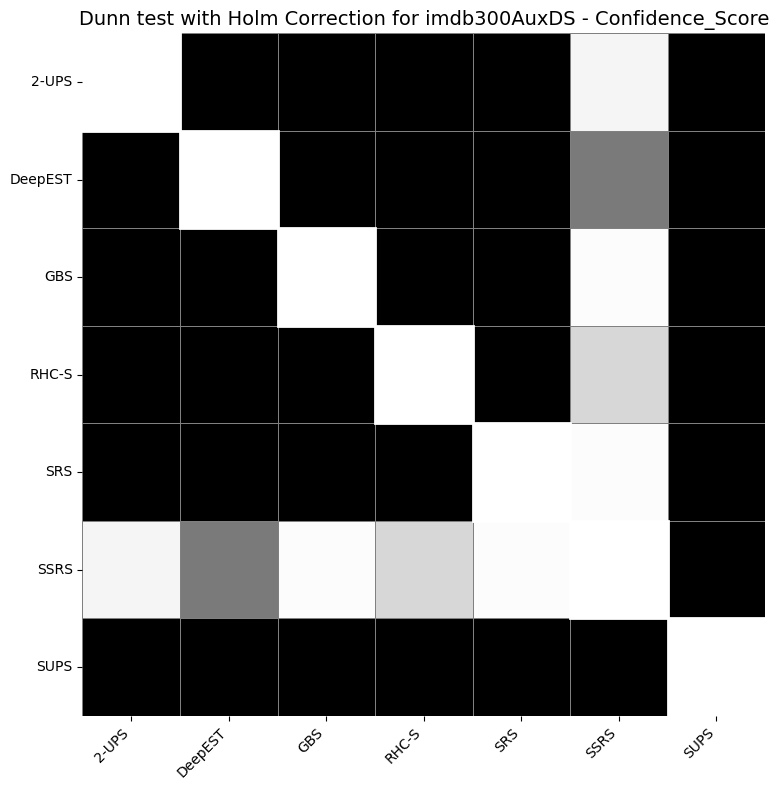

Friedman test statistic for imdb300AuxDS - DSA: 25.542857142857144, p-value: 0.00027080144232296215
Raw Dunn's post hoc test results for imdb300AuxDS - DSA:
            2-UPS   DeepEST       GBS     RHC-S       SRS      SSRS      SUPS
2-UPS    1.000000  0.108548  0.083953  0.035859  0.115512  0.138523  0.757621
DeepEST  0.108548  1.000000  0.901757  0.621468  0.975381  0.002028  0.194924
GBS      0.083953  0.901757  1.000000  0.711138  0.877371  0.001330  0.155727
RHC-S    0.035859  0.621468  0.711138  1.000000  0.599839  0.000344  0.073467
SRS      0.115512  0.975381  0.877371  0.599839  1.000000  0.002249  0.205768
SSRS     0.138523  0.002028  0.001330  0.000344  0.002249  1.000000  0.073467
SUPS     0.757621  0.194924  0.155727  0.073467  0.205768  0.073467  1.000000



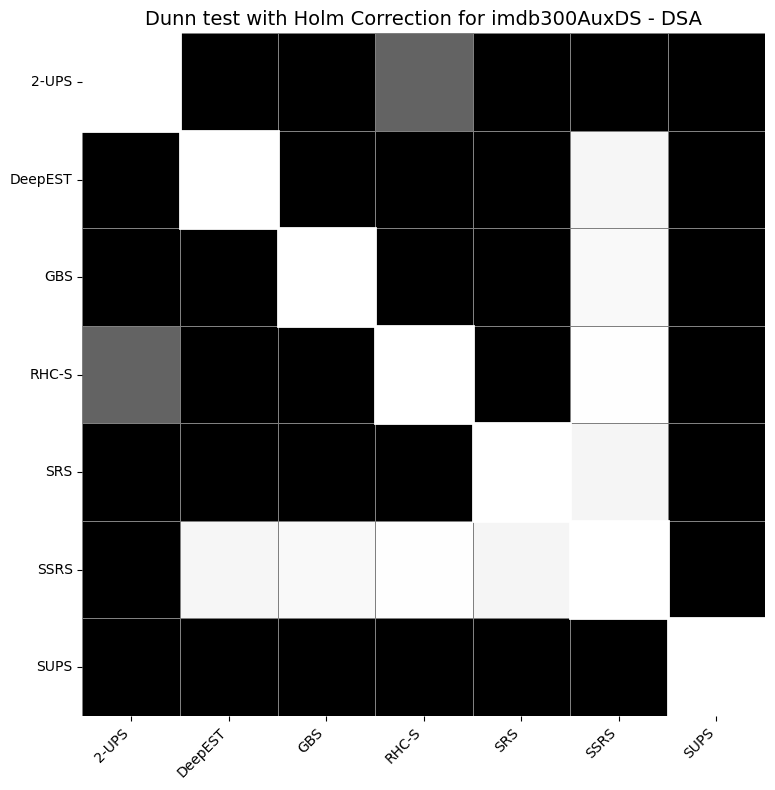

Friedman test statistic for imdb300AuxDS - Prediction_Entropy: 26.742857142857133, p-value: 0.0001617818891405062
Raw Dunn's post hoc test results for imdb300AuxDS - Prediction_Entropy:
            2-UPS   DeepEST       GBS     RHC-S       SRS      SSRS      SUPS
2-UPS    1.000000  0.240914  0.020638  0.064078  0.014769  0.266575  0.078568
DeepEST  0.240914  1.000000  0.253519  0.497179  0.205768  0.022390  0.557639
GBS      0.020638  0.253519  1.000000  0.643429  0.901757  0.000614  0.578558
RHC-S    0.064078  0.497179  0.643429  1.000000  0.557639  0.003050  0.926236
SRS      0.014769  0.205768  0.901757  0.557639  1.000000  0.000387  0.497179
SSRS     0.266575  0.022390  0.000614  0.003050  0.000387  1.000000  0.004104
SUPS     0.078568  0.557639  0.578558  0.926236  0.497179  0.004104  1.000000



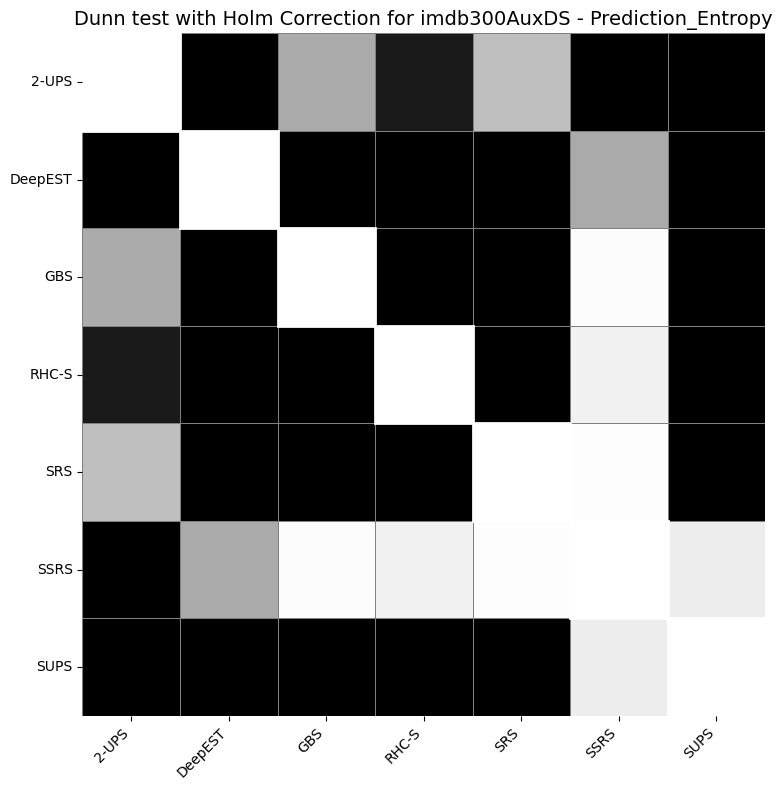

Friedman test statistic for imdb300AuxDS - LSA: 29.228571428571428, p-value: 5.5066601543927806e-05
Raw Dunn's post hoc test results for imdb300AuxDS - LSA:
            2-UPS   DeepEST       GBS     RHC-S       SRS      SSRS      SUPS
2-UPS    1.000000  0.004104  0.422335  0.688281  0.051869  0.253519  0.000859
DeepEST  0.004104  1.000000  0.038672  0.013555  0.354539  0.000060  0.643429
GBS      0.422335  0.038672  1.000000  0.688281  0.253519  0.051869  0.011388
RHC-S    0.688281  0.013555  0.688281  1.000000  0.122823  0.122823  0.003370
SRS      0.051869  0.354539  0.253519  0.122823  1.000000  0.002028  0.164915
SSRS     0.253519  0.000060  0.051869  0.122823  0.002028  1.000000  0.000008
SUPS     0.000859  0.643429  0.011388  0.003370  0.164915  0.000008  1.000000



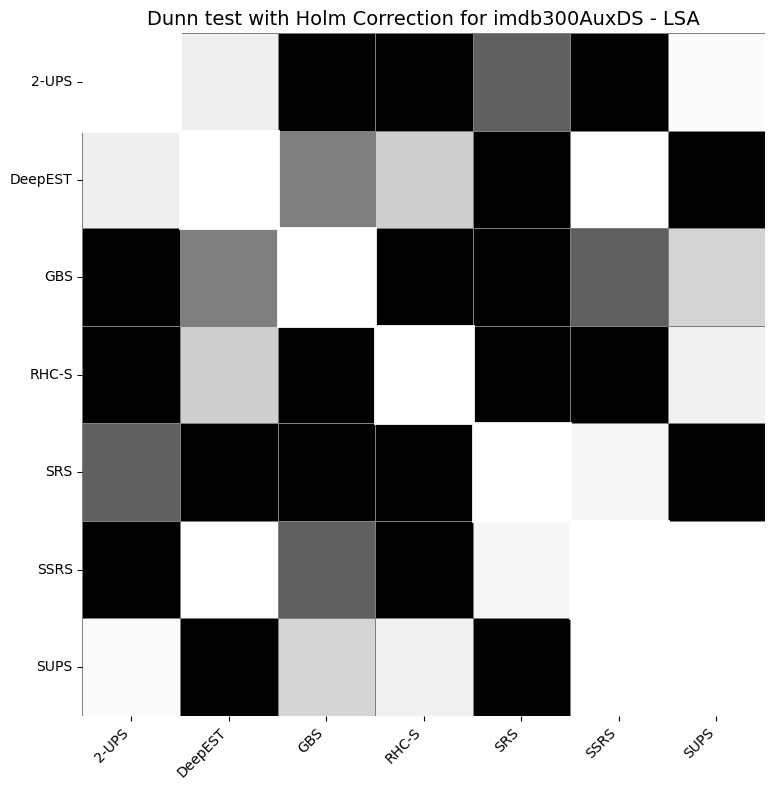

Friedman test statistic for imdb300AuxDS - Similarity_Score: 26.770909090909093, p-value: 0.000159838618557839
Raw Dunn's post hoc test results for imdb300AuxDS - Similarity_Score:
            2-UPS   DeepEST       GBS     RHC-S       SRS      SSRS      SUPS
2-UPS    1.000000  0.223331  0.000179  0.015528  1.000000  0.975091  0.015528
DeepEST  0.223331  1.000000  0.011435  0.229322  0.223331  0.235427  0.229322
GBS      0.000179  0.011435  1.000000  0.184508  0.000179  0.000203  0.184508
RHC-S    0.015528  0.229322  0.184508  1.000000  0.015528  0.016913  1.000000
SRS      1.000000  0.223331  0.000179  0.015528  1.000000  0.975091  0.015528
SSRS     0.975091  0.235427  0.000203  0.016913  0.975091  1.000000  0.016913
SUPS     0.015528  0.229322  0.184508  1.000000  0.015528  0.016913  1.000000



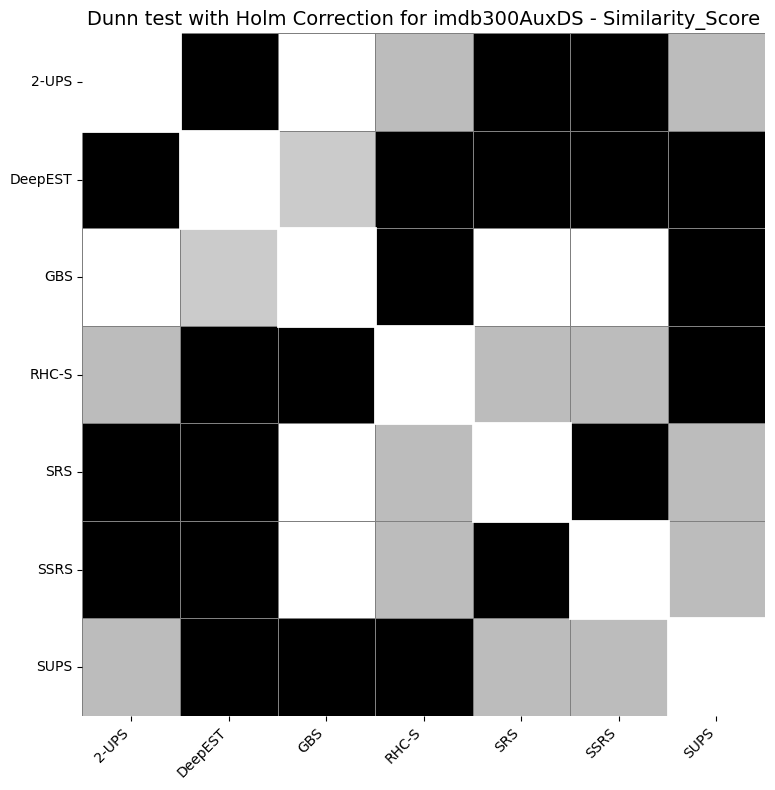

Friedman test statistic for imdbAuxDS - Confidence_Score: 24.94285714285715, p-value: 0.0003498736288343015
Raw Dunn's post hoc test results for imdbAuxDS - Confidence_Score:
            2-UPS   DeepEST       GBS     RHC-S       SRS      SSRS      SUPS
2-UPS    1.000000  0.122823  0.537094  0.422335  0.853100  0.001645  0.253519
DeepEST  0.122823  1.000000  0.030754  0.458902  0.083953  0.108548  0.688281
GBS      0.537094  0.030754  1.000000  0.155727  0.665706  0.000167  0.078568
RHC-S    0.422335  0.458902  0.155727  1.000000  0.323377  0.019006  0.734258
SRS      0.853100  0.083953  0.665706  0.323377  1.000000  0.000859  0.184506
SSRS     0.001645  0.108548  0.000167  0.019006  0.000859  1.000000  0.044862
SUPS     0.253519  0.688281  0.078568  0.734258  0.184506  0.044862  1.000000



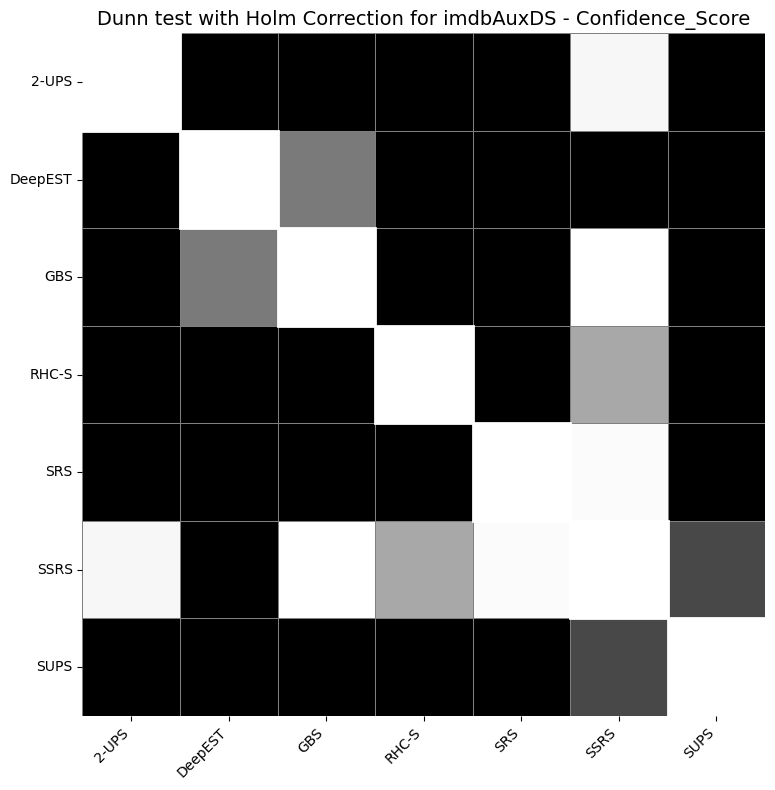

Friedman test statistic for imdbAuxDS - DSA: 28.457142857142856, p-value: 7.704898843558694e-05
Raw Dunn's post hoc test results for imdbAuxDS - DSA:
            2-UPS   DeepEST       GBS     RHC-S       SRS      SSRS      SUPS
2-UPS    1.000000  0.130490  0.115512  0.030754  0.078568  0.164915  0.387534
DeepEST  0.130490  1.000000  0.950785  0.516937  0.804997  0.003721  0.516937
GBS      0.115512  0.950785  1.000000  0.557639  0.853100  0.003050  0.477831
RHC-S    0.030754  0.516937  0.557639  1.000000  0.688281  0.000387  0.194924
SRS      0.078568  0.804997  0.853100  0.688281  1.000000  0.001645  0.370809
SSRS     0.164915  0.003721  0.003050  0.000387  0.001645  1.000000  0.024270
SUPS     0.387534  0.516937  0.477831  0.194924  0.370809  0.024270  1.000000



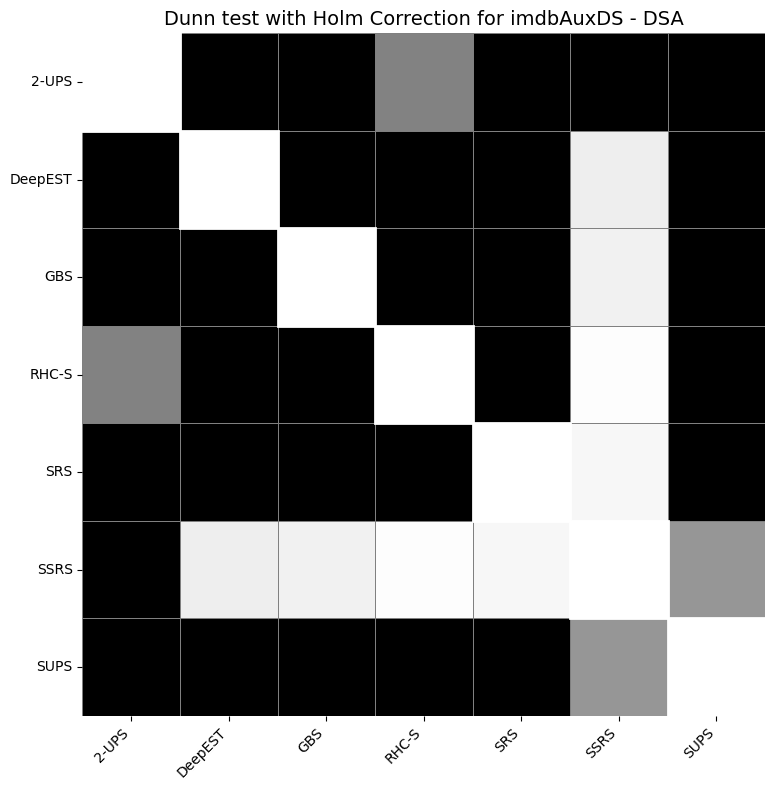

Friedman test statistic for imdbAuxDS - Prediction_Entropy: 25.714285714285722, p-value: 0.00025164426549843067
Raw Dunn's post hoc test results for imdbAuxDS - Prediction_Entropy:
            2-UPS   DeepEST       GBS     RHC-S       SRS      SSRS      SUPS
2-UPS    1.000000  0.323377  0.010424  0.059768  0.019006  0.280087  0.051869
DeepEST  0.323377  1.000000  0.115512  0.370809  0.174505  0.038672  0.338728
GBS      0.010424  0.115512  1.000000  0.497179  0.828969  0.000271  0.537094
RHC-S    0.059768  0.370809  0.497179  1.000000  0.643429  0.003050  0.950785
SRS      0.019006  0.174505  0.828969  0.643429  1.000000  0.000614  0.688281
SSRS     0.280087  0.038672  0.000271  0.003050  0.000614  1.000000  0.002492
SUPS     0.051869  0.338728  0.537094  0.950785  0.688281  0.002492  1.000000



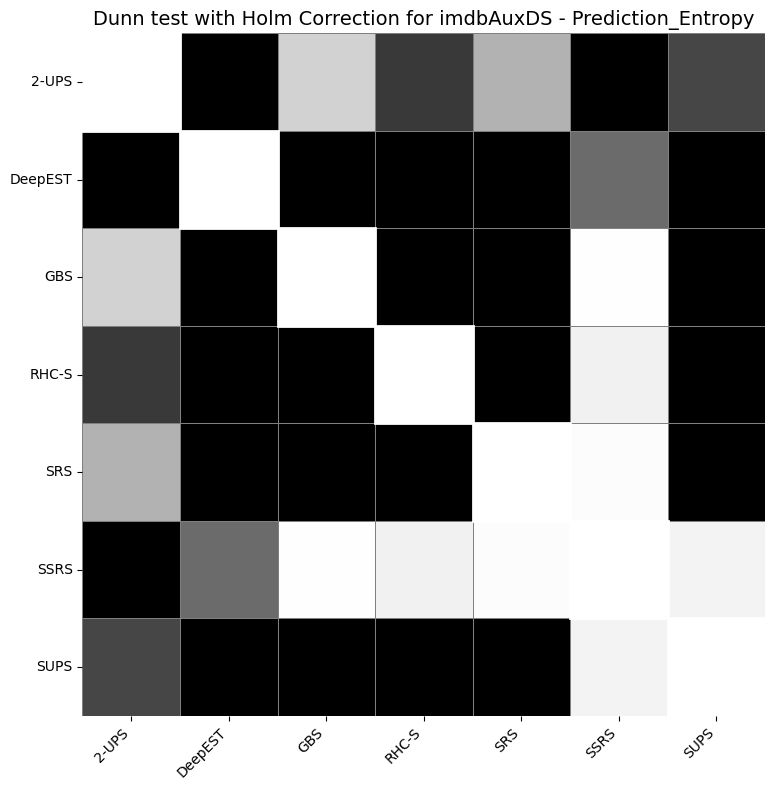

Friedman test statistic for imdbAuxDS - LSA: 29.657142857142873, p-value: 4.5668490543109426e-05
Raw Dunn's post hoc test results for imdbAuxDS - LSA:
            2-UPS   DeepEST       GBS     RHC-S       SRS      SSRS      SUPS
2-UPS    1.000000  0.001309  0.047945  0.439759  0.059411  0.439759  0.000184
DeepEST  0.001309  1.000000  0.216399  0.014630  0.183890  0.000067  0.599328
GBS      0.047945  0.216399  1.000000  0.228105  0.926132  0.005951  0.078149
RHC-S    0.439759  0.014630  0.228105  1.000000  0.265905  0.122298  0.003009
SRS      0.059411  0.183890  0.926132  0.265905  1.000000  0.007867  0.063705
SSRS     0.439759  0.000067  0.005951  0.122298  0.007867  1.000000  0.000006
SUPS     0.000184  0.599328  0.078149  0.003009  0.063705  0.000006  1.000000



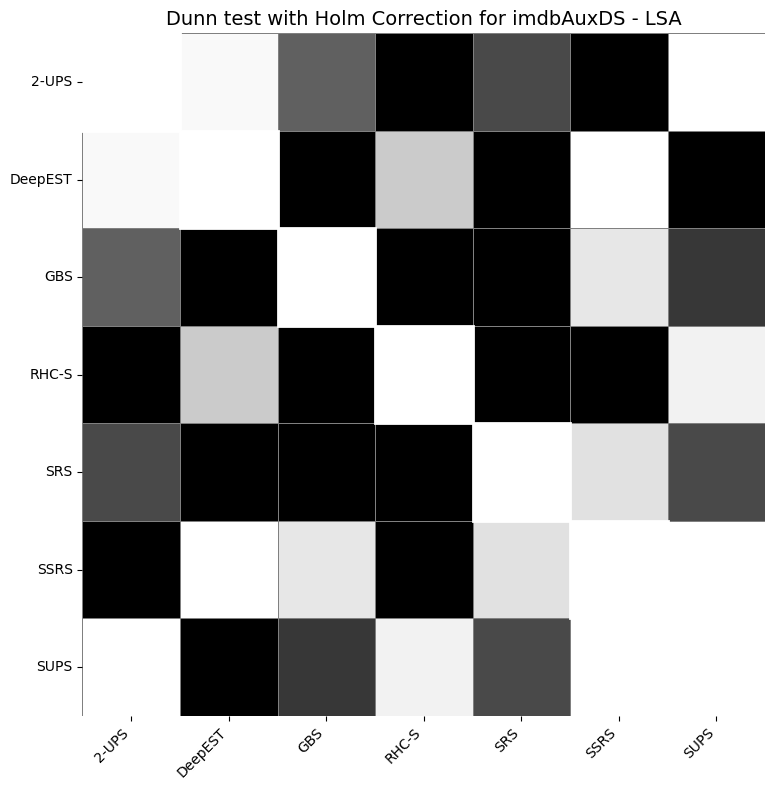

Friedman test statistic for imdbAuxDS - Similarity_Score: 24.414545454545454, p-value: 0.00043805411591648627
Raw Dunn's post hoc test results for imdbAuxDS - Similarity_Score:
            2-UPS   DeepEST       GBS     RHC-S       SRS      SSRS      SUPS
2-UPS    1.000000  0.133944  0.975091  0.003875  0.875940  0.802751  0.003875
DeepEST  0.133944  1.000000  0.126028  0.164697  0.179397  0.211686  0.164697
GBS      0.975091  0.126028  1.000000  0.003507  0.851393  0.778701  0.003507
RHC-S    0.003875  0.164697  0.003507  1.000000  0.006294  0.008330  1.000000
SRS      0.875940  0.179397  0.851393  0.006294  1.000000  0.925371  0.006294
SSRS     0.802751  0.211686  0.778701  0.008330  0.925371  1.000000  0.008330
SUPS     0.003875  0.164697  0.003507  1.000000  0.006294  0.008330  1.000000



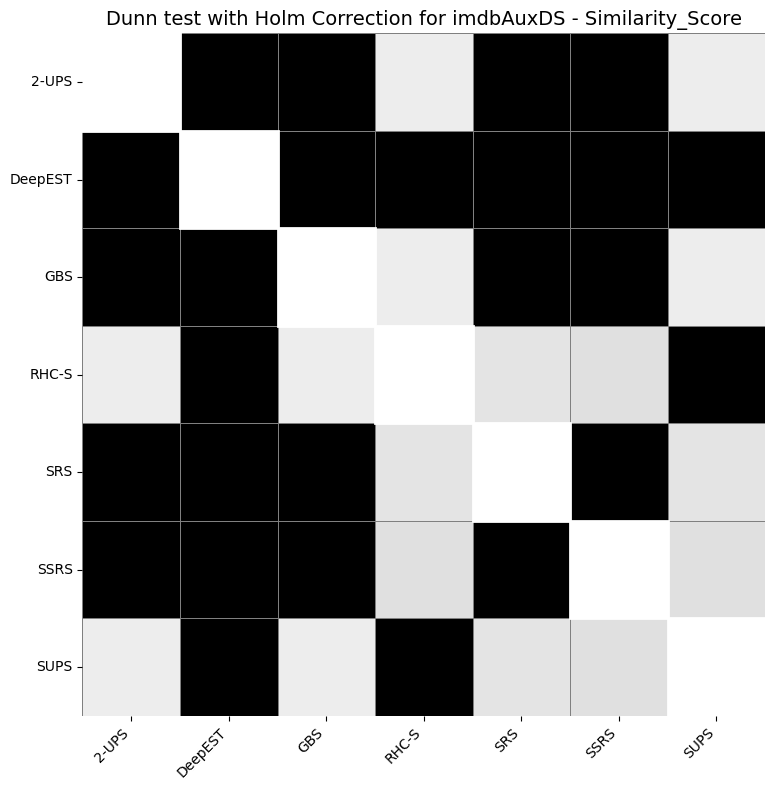

Friedman test statistic for SSTtestAuxDS - Confidence_Score: 18.342857142857156, p-value: 0.005430136180916721
Raw Dunn's post hoc test results for SSTtestAuxDS - Confidence_Score:
            2-UPS   DeepEST       GBS     RHC-S       SRS      SSRS      SUPS
2-UPS    1.000000  0.950785  0.901757  0.853100  0.781207  0.003721  0.083953
DeepEST  0.950785  1.000000  0.853100  0.804997  0.734258  0.004523  0.095619
GBS      0.901757  0.853100  1.000000  0.950785  0.877371  0.002492  0.064078
RHC-S    0.853100  0.804997  0.950785  1.000000  0.926236  0.002028  0.055702
SRS      0.781207  0.734258  0.877371  0.926236  1.000000  0.001480  0.044862
SSRS     0.003721  0.004523  0.002492  0.002028  0.001480  1.000000  0.240914
SUPS     0.083953  0.095619  0.064078  0.055702  0.044862  0.240914  1.000000



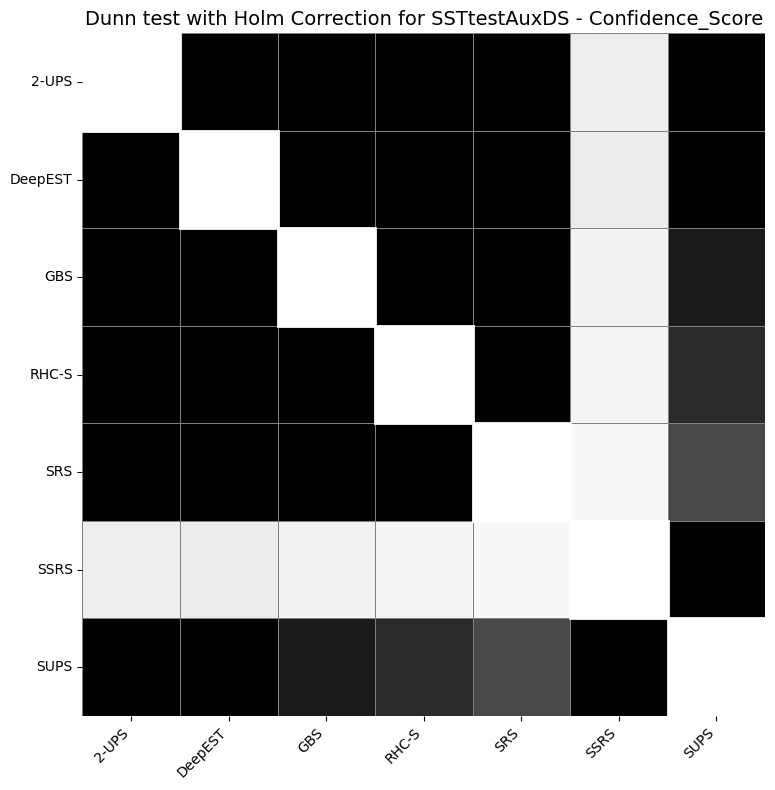

Friedman test statistic for SSTtestAuxDS - DSA: 28.114285714285728, p-value: 8.941840826082169e-05
Raw Dunn's post hoc test results for SSTtestAuxDS - DSA:
            2-UPS   DeepEST       GBS     RHC-S       SRS      SSRS      SUPS
2-UPS    1.000000  0.012429  0.017489  0.004980  0.024270  0.440401  0.440401
DeepEST  0.012429  1.000000  0.901757  0.757621  0.804997  0.001071  0.083953
GBS      0.017489  0.901757  1.000000  0.665706  0.901757  0.001645  0.108548
RHC-S    0.004980  0.757621  0.665706  1.000000  0.578558  0.000344  0.041670
SRS      0.024270  0.804997  0.901757  0.578558  1.000000  0.002492  0.138523
SSRS     0.440401  0.001071  0.001645  0.000344  0.002492  1.000000  0.122823
SUPS     0.440401  0.083953  0.108548  0.041670  0.138523  0.122823  1.000000



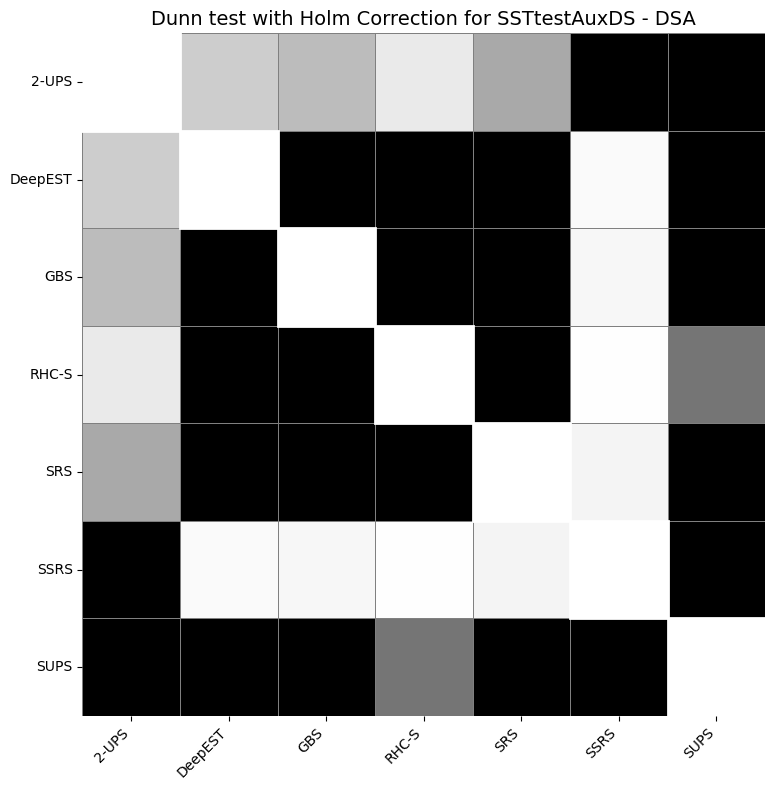

Friedman test statistic for SSTtestAuxDS - Prediction_Entropy: 22.19999999999999, p-value: 0.001113853827142421
Raw Dunn's post hoc test results for SSTtestAuxDS - Prediction_Entropy:
            2-UPS   DeepEST       GBS     RHC-S       SRS      SSRS      SUPS
2-UPS    1.000000  0.101920  0.010424  0.048259  0.016078  0.354539  0.038672
DeepEST  0.101920  1.000000  0.354539  0.734258  0.440401  0.010424  0.665706
GBS      0.010424  0.354539  1.000000  0.557639  0.877371  0.000488  0.621468
RHC-S    0.048259  0.734258  0.557639  1.000000  0.665706  0.003721  0.926236
SRS      0.016078  0.440401  0.877371  0.665706  1.000000  0.000859  0.734258
SSRS     0.354539  0.010424  0.000488  0.003721  0.000859  1.000000  0.002758
SUPS     0.038672  0.665706  0.621468  0.926236  0.734258  0.002758  1.000000



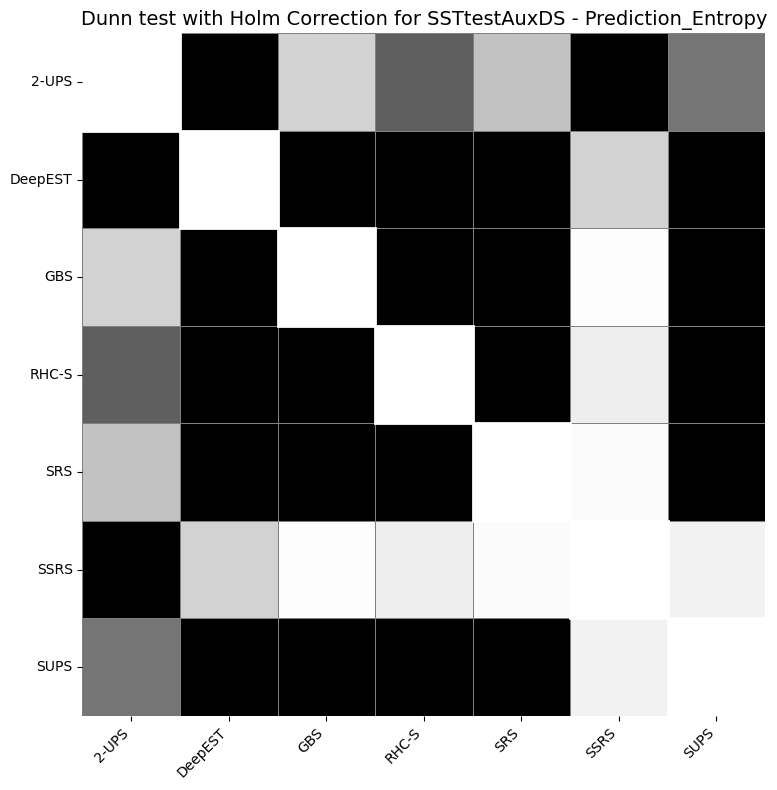

Friedman test statistic for SSTtestAuxDS - LSA: 28.97142857142856, p-value: 6.159904179868664e-05
Raw Dunn's post hoc test results for SSTtestAuxDS - LSA:
            2-UPS   DeepEST       GBS     RHC-S       SRS      SSRS      SUPS
2-UPS    1.000000  0.038672  0.370809  0.253519  0.387534  0.026285  0.048259
DeepEST  0.038672  1.000000  0.003050  0.001330  0.228757  0.000018  0.926236
GBS      0.370809  0.003050  1.000000  0.804997  0.078568  0.184506  0.004104
RHC-S    0.253519  0.001330  0.804997  1.000000  0.044862  0.280087  0.001827
SRS      0.387534  0.228757  0.078568  0.044862  1.000000  0.002028  0.266575
SSRS     0.026285  0.000018  0.184506  0.280087  0.002028  1.000000  0.000027
SUPS     0.048259  0.926236  0.004104  0.001827  0.266575  0.000027  1.000000



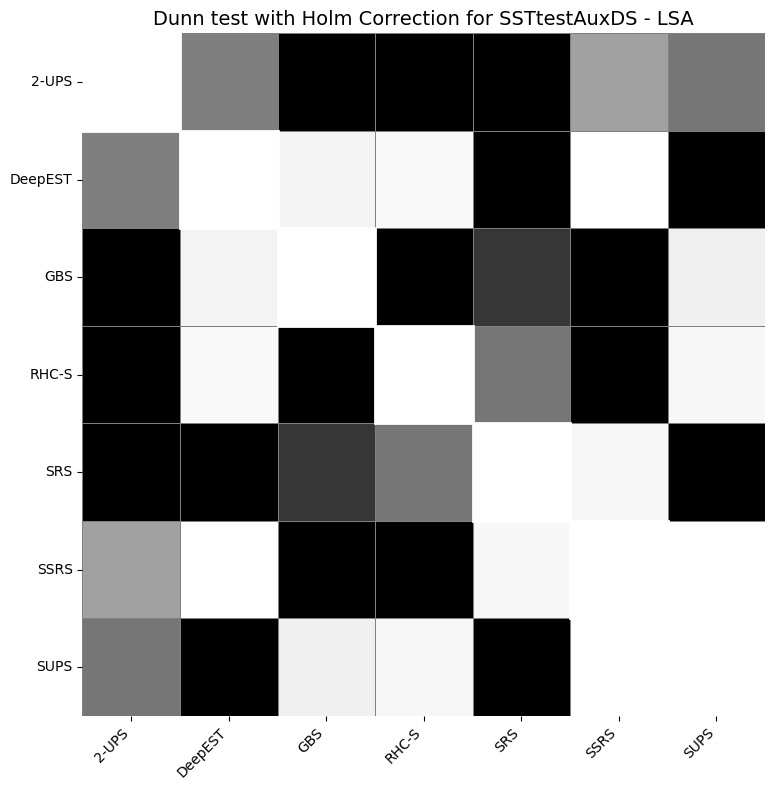

Friedman test statistic for SSTtestAuxDS - Similarity_Score: 27.905454545454564, p-value: 9.789408630050595e-05
Raw Dunn's post hoc test results for SSTtestAuxDS - Similarity_Score:
            2-UPS   DeepEST       GBS     RHC-S       SRS      SSRS      SUPS
2-UPS    1.000000  0.333079  0.000203  0.010937  0.950207  0.925371  0.010937
DeepEST  0.333079  1.000000  0.006002  0.114844  0.302833  0.288417  0.114844
GBS      0.000203  0.006002  1.000000  0.241646  0.000158  0.000139  0.241646
RHC-S    0.010937  0.114844  0.241646  1.000000  0.009129  0.008330  1.000000
SRS      0.950207  0.302833  0.000158  0.009129  1.000000  0.975091  0.009129
SSRS     0.925371  0.288417  0.000139  0.008330  0.975091  1.000000  0.008330
SUPS     0.010937  0.114844  0.241646  1.000000  0.009129  0.008330  1.000000



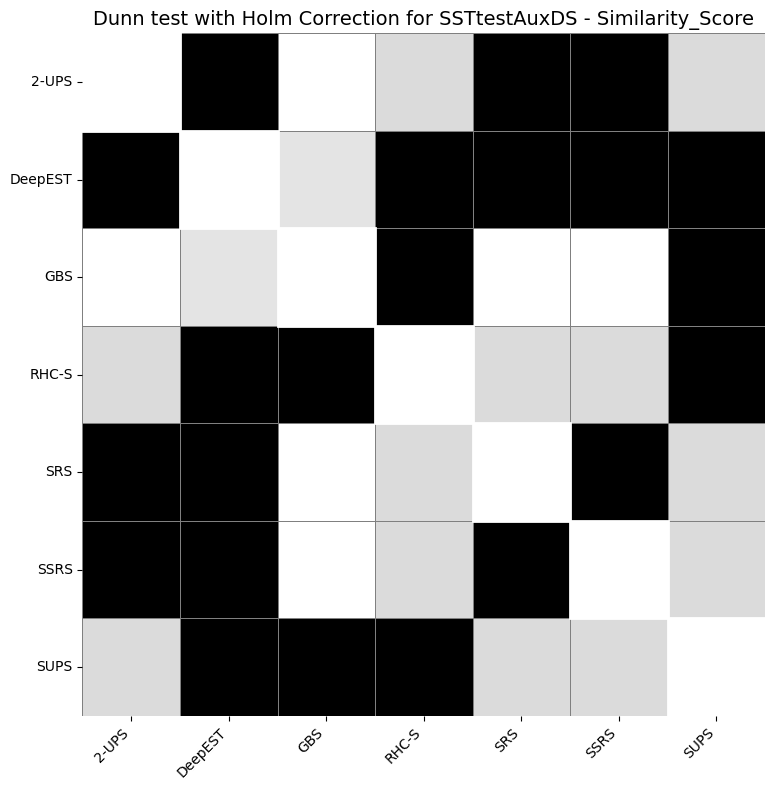

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import friedmanchisquare
import scikit_posthocs as sp
from statsmodels.stats.multitest import multipletests

# This line ensures that plots are displayed in the notebook
%matplotlib inline

# Load the dataset
data = pd.read_csv("DS4NLP_rsearch_results/combined_datasetsRQ123.csv")

# Auxiliary variables and datasets
aux_vars = data['aux_var'].unique()
datasets = data['dataset'].unique()
methods = data['method'].unique()

# Initialize a dictionary to store results
friedman_results = {}

# Loop through each combination of dataset and auxiliary variable
for dataset in datasets:
    for aux_var in aux_vars:
        # Subset the data for the current dataset and auxiliary variable
        subset_df = data[(data['dataset'] == dataset) & (data['aux_var'] == aux_var)]

        # Ensure there are enough data points to perform the test
        if subset_df.shape[0] < 2:
            print(f"Not enough data for {dataset} - {aux_var}. Skipping.")
            continue

        # Check if there is variation in the RMSE values
        if subset_df['RMSE'].std() == 0:
            print(f"No variation in RMSE for {dataset} - {aux_var}. Skipping.")
            continue

        # Perform the Friedman test
        try:
            stat, p_value = friedmanchisquare(*[subset_df[subset_df['method'] == method]['RMSE'].values for method in methods])
            friedman_results[(dataset, aux_var)] = (stat, p_value)
            print(f"Friedman test statistic for {dataset} - {aux_var}: {stat}, p-value: {p_value}")

            # If significant, perform Dunn's post hoc test
            if p_value < 0.05:
                dunn_results = sp.posthoc_dunn(subset_df, val_col='RMSE', group_col='method', p_adjust=None)
                print(f"Raw Dunn's post hoc test results for {dataset} - {aux_var}:\n{dunn_results}\n")

                # Flatten the Dunn results into a list of p-values
                p_values = dunn_results.values[np.triu_indices_from(dunn_results, k=1)]

                # Apply Holm-Bonferroni correction
                reject, pvals_corrected, _, _ = multipletests(p_values, method='holm')

                # Reconstruct the adjusted p-value matrix
                corrected_matrix = np.zeros_like(dunn_results, dtype=float)
                corrected_matrix[np.triu_indices_from(corrected_matrix, k=1)] = pvals_corrected
                corrected_matrix = corrected_matrix + corrected_matrix.T  # Symmetrize the matrix
                corrected_dunn_results = pd.DataFrame(corrected_matrix, index=dunn_results.index, columns=dunn_results.columns)

                # Plot the corrected Dunn results
                plt.figure(figsize=(10, 8))
                ax = sns.heatmap(corrected_dunn_results, annot=False, cmap='gray_r', cbar=False, square=True, linewidths=.5, linecolor='gray')
                
                # Optional: Add diagonal stripes or other annotations if necessary
                for i in range(len(corrected_dunn_results.columns)):
                    ax.add_patch(plt.Rectangle((i, i), 1, 1, fill=False, edgecolor='white', lw=2, hatch='///'))

                plt.xticks(rotation=45, ha="right", fontsize=10)
                plt.yticks(rotation=0, fontsize=10)
                plt.title(f'Dunn test with Holm Correction for {dataset} - {aux_var}', fontsize=14)
                plt.tight_layout()

                # Show the plot
                plt.show()

        except Exception as e:
            print(f"Error performing tests for {dataset} - {aux_var}: {e}")

Friedman test statistic for imdb300AuxDS - Confidence_Score: 24.257142857142867, p-value: 0.0004683232555248761
Raw Dunn's post hoc test results for imdb300AuxDS - Confidence_Score:
            2-UPS   DeepEST       GBS     RHC-S       SRS      SSRS      SUPS
2-UPS    1.000000  0.370809  0.734258  0.665706  0.757621  0.002249  0.146933
DeepEST  0.370809  1.000000  0.217044  0.643429  0.228757  0.030754  0.578558
GBS      0.734258  0.217044  1.000000  0.440401  0.975381  0.000687  0.073467
RHC-S    0.665706  0.643429  0.440401  1.000000  0.458902  0.008712  0.308487
SRS      0.757621  0.228757  0.975381  0.458902  1.000000  0.000769  0.078568
SSRS     0.002249  0.030754  0.000687  0.008712  0.000769  1.000000  0.108548
SUPS     0.146933  0.578558  0.073467  0.308487  0.078568  0.108548  1.000000

Holm-Bonferroni corrected Dunn's post hoc test results for imdb300AuxDS - Confidence_Score:
            2-UPS   DeepEST       GBS     RHC-S       SRS      SSRS  SUPS
2-UPS    0.000000  1.000000

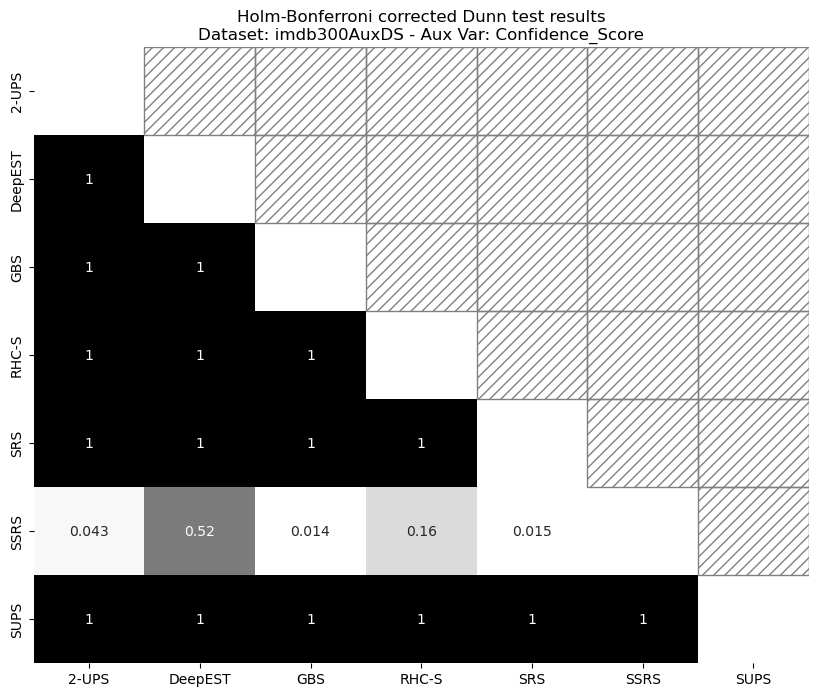

Friedman test statistic for imdb300AuxDS - DSA: 25.542857142857144, p-value: 0.00027080144232296215
Raw Dunn's post hoc test results for imdb300AuxDS - DSA:
            2-UPS   DeepEST       GBS     RHC-S       SRS      SSRS      SUPS
2-UPS    1.000000  0.108548  0.083953  0.035859  0.115512  0.138523  0.757621
DeepEST  0.108548  1.000000  0.901757  0.621468  0.975381  0.002028  0.194924
GBS      0.083953  0.901757  1.000000  0.711138  0.877371  0.001330  0.155727
RHC-S    0.035859  0.621468  0.711138  1.000000  0.599839  0.000344  0.073467
SRS      0.115512  0.975381  0.877371  0.599839  1.000000  0.002249  0.205768
SSRS     0.138523  0.002028  0.001330  0.000344  0.002249  1.000000  0.073467
SUPS     0.757621  0.194924  0.155727  0.073467  0.205768  0.073467  1.000000

Holm-Bonferroni corrected Dunn's post hoc test results for imdb300AuxDS - DSA:
            2-UPS   DeepEST       GBS     RHC-S       SRS      SSRS  SUPS
2-UPS    0.000000  1.000000  1.000000  0.609599  1.000000  1.0000

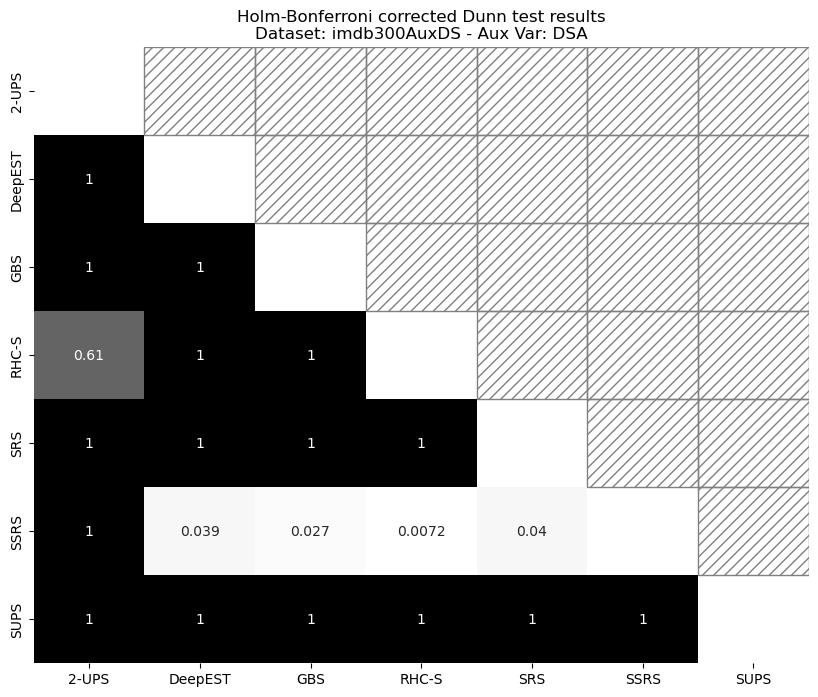

Friedman test statistic for imdb300AuxDS - Prediction_Entropy: 26.742857142857133, p-value: 0.0001617818891405062
Raw Dunn's post hoc test results for imdb300AuxDS - Prediction_Entropy:
            2-UPS   DeepEST       GBS     RHC-S       SRS      SSRS      SUPS
2-UPS    1.000000  0.240914  0.020638  0.064078  0.014769  0.266575  0.078568
DeepEST  0.240914  1.000000  0.253519  0.497179  0.205768  0.022390  0.557639
GBS      0.020638  0.253519  1.000000  0.643429  0.901757  0.000614  0.578558
RHC-S    0.064078  0.497179  0.643429  1.000000  0.557639  0.003050  0.926236
SRS      0.014769  0.205768  0.901757  0.557639  1.000000  0.000387  0.497179
SSRS     0.266575  0.022390  0.000614  0.003050  0.000387  1.000000  0.004104
SUPS     0.078568  0.557639  0.578558  0.926236  0.497179  0.004104  1.000000

Holm-Bonferroni corrected Dunn's post hoc test results for imdb300AuxDS - Prediction_Entropy:
            2-UPS   DeepEST       GBS     RHC-S       SRS      SSRS      SUPS
2-UPS    0.000000

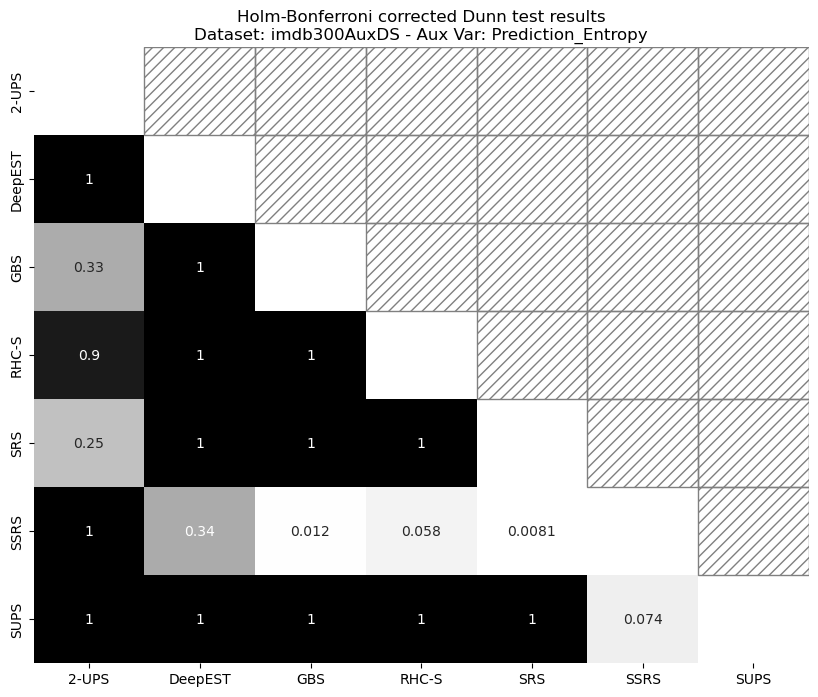

Friedman test statistic for imdb300AuxDS - LSA: 29.228571428571428, p-value: 5.5066601543927806e-05
Raw Dunn's post hoc test results for imdb300AuxDS - LSA:
            2-UPS   DeepEST       GBS     RHC-S       SRS      SSRS      SUPS
2-UPS    1.000000  0.004104  0.422335  0.688281  0.051869  0.253519  0.000859
DeepEST  0.004104  1.000000  0.038672  0.013555  0.354539  0.000060  0.643429
GBS      0.422335  0.038672  1.000000  0.688281  0.253519  0.051869  0.011388
RHC-S    0.688281  0.013555  0.688281  1.000000  0.122823  0.122823  0.003370
SRS      0.051869  0.354539  0.253519  0.122823  1.000000  0.002028  0.164915
SSRS     0.253519  0.000060  0.051869  0.122823  0.002028  1.000000  0.000008
SUPS     0.000859  0.643429  0.011388  0.003370  0.164915  0.000008  1.000000

Holm-Bonferroni corrected Dunn's post hoc test results for imdb300AuxDS - LSA:
            2-UPS   DeepEST       GBS     RHC-S       SRS      SSRS      SUPS
2-UPS    0.000000  0.065667  1.000000  1.000000  0.622424  1.

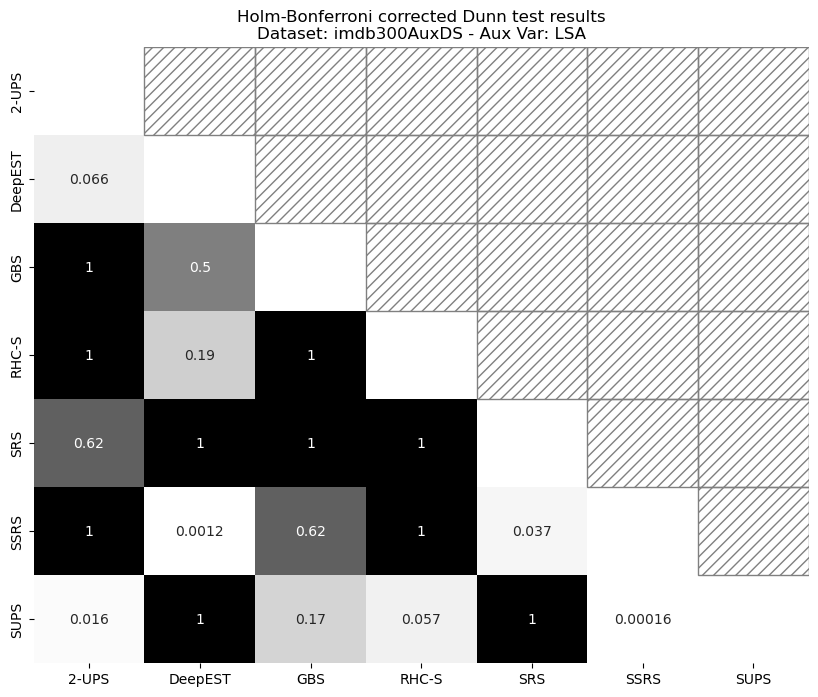

Friedman test statistic for imdb300AuxDS - Similarity_Score: 26.770909090909093, p-value: 0.000159838618557839
Raw Dunn's post hoc test results for imdb300AuxDS - Similarity_Score:
            2-UPS   DeepEST       GBS     RHC-S       SRS      SSRS      SUPS
2-UPS    1.000000  0.223331  0.000179  0.015528  1.000000  0.975091  0.015528
DeepEST  0.223331  1.000000  0.011435  0.229322  0.223331  0.235427  0.229322
GBS      0.000179  0.011435  1.000000  0.184508  0.000179  0.000203  0.184508
RHC-S    0.015528  0.229322  0.184508  1.000000  0.015528  0.016913  1.000000
SRS      1.000000  0.223331  0.000179  0.015528  1.000000  0.975091  0.015528
SSRS     0.975091  0.235427  0.000203  0.016913  0.975091  1.000000  0.016913
SUPS     0.015528  0.229322  0.184508  1.000000  0.015528  0.016913  1.000000

Holm-Bonferroni corrected Dunn's post hoc test results for imdb300AuxDS - Similarity_Score:
            2-UPS   DeepEST       GBS     RHC-S       SRS      SSRS      SUPS
2-UPS    0.000000  1.000

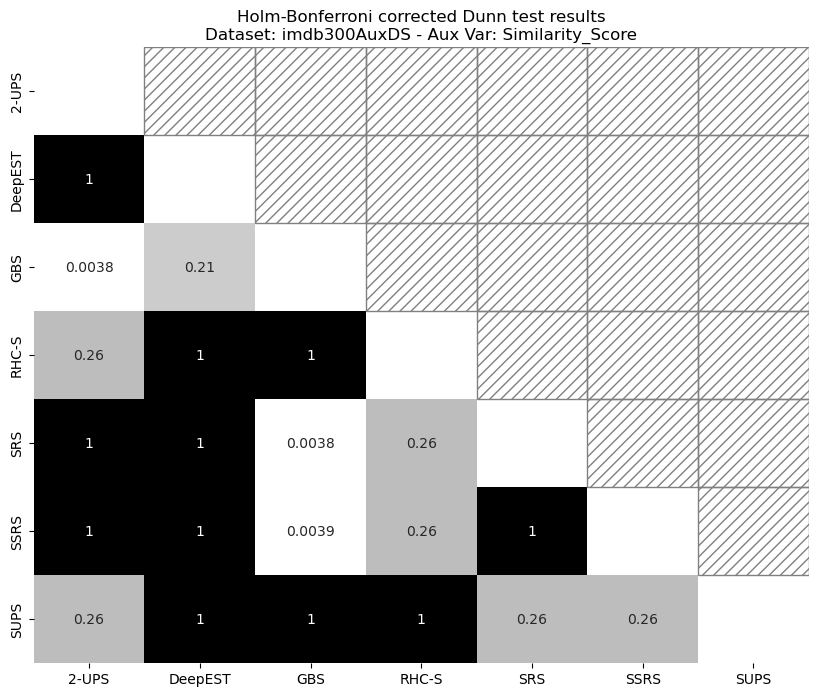

Friedman test statistic for imdbAuxDS - Confidence_Score: 24.94285714285715, p-value: 0.0003498736288343015
Raw Dunn's post hoc test results for imdbAuxDS - Confidence_Score:
            2-UPS   DeepEST       GBS     RHC-S       SRS      SSRS      SUPS
2-UPS    1.000000  0.122823  0.537094  0.422335  0.853100  0.001645  0.253519
DeepEST  0.122823  1.000000  0.030754  0.458902  0.083953  0.108548  0.688281
GBS      0.537094  0.030754  1.000000  0.155727  0.665706  0.000167  0.078568
RHC-S    0.422335  0.458902  0.155727  1.000000  0.323377  0.019006  0.734258
SRS      0.853100  0.083953  0.665706  0.323377  1.000000  0.000859  0.184506
SSRS     0.001645  0.108548  0.000167  0.019006  0.000859  1.000000  0.044862
SUPS     0.253519  0.688281  0.078568  0.734258  0.184506  0.044862  1.000000

Holm-Bonferroni corrected Dunn's post hoc test results for imdbAuxDS - Confidence_Score:
            2-UPS   DeepEST       GBS    RHC-S       SRS      SSRS      SUPS
2-UPS    0.000000  1.000000  1.000

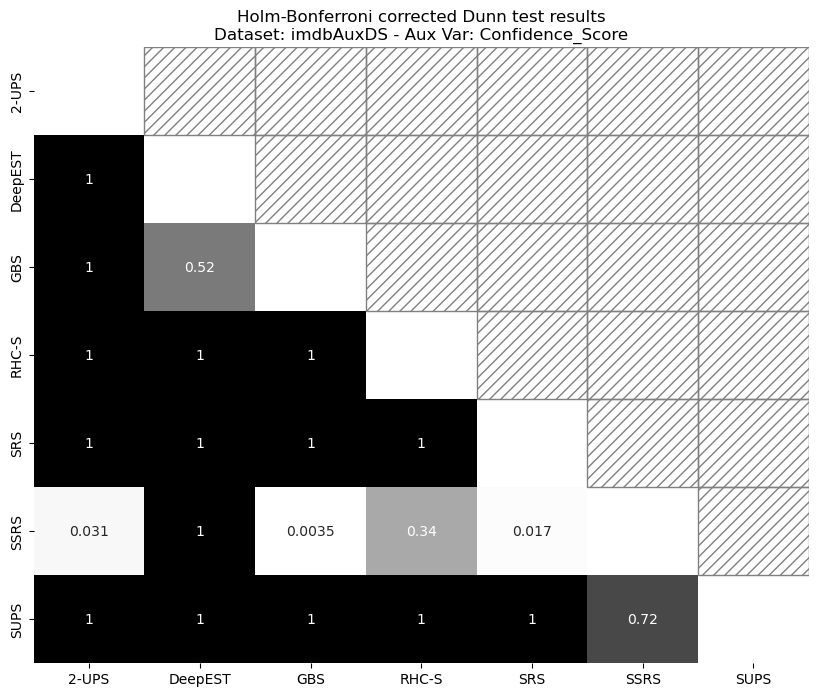

Friedman test statistic for imdbAuxDS - DSA: 28.457142857142856, p-value: 7.704898843558694e-05
Raw Dunn's post hoc test results for imdbAuxDS - DSA:
            2-UPS   DeepEST       GBS     RHC-S       SRS      SSRS      SUPS
2-UPS    1.000000  0.130490  0.115512  0.030754  0.078568  0.164915  0.387534
DeepEST  0.130490  1.000000  0.950785  0.516937  0.804997  0.003721  0.516937
GBS      0.115512  0.950785  1.000000  0.557639  0.853100  0.003050  0.477831
RHC-S    0.030754  0.516937  0.557639  1.000000  0.688281  0.000387  0.194924
SRS      0.078568  0.804997  0.853100  0.688281  1.000000  0.001645  0.370809
SSRS     0.164915  0.003721  0.003050  0.000387  0.001645  1.000000  0.024270
SUPS     0.387534  0.516937  0.477831  0.194924  0.370809  0.024270  1.000000

Holm-Bonferroni corrected Dunn's post hoc test results for imdbAuxDS - DSA:
            2-UPS   DeepEST       GBS     RHC-S       SRS      SSRS      SUPS
2-UPS    0.000000  1.000000  1.000000  0.492057  1.000000  1.000000  1.

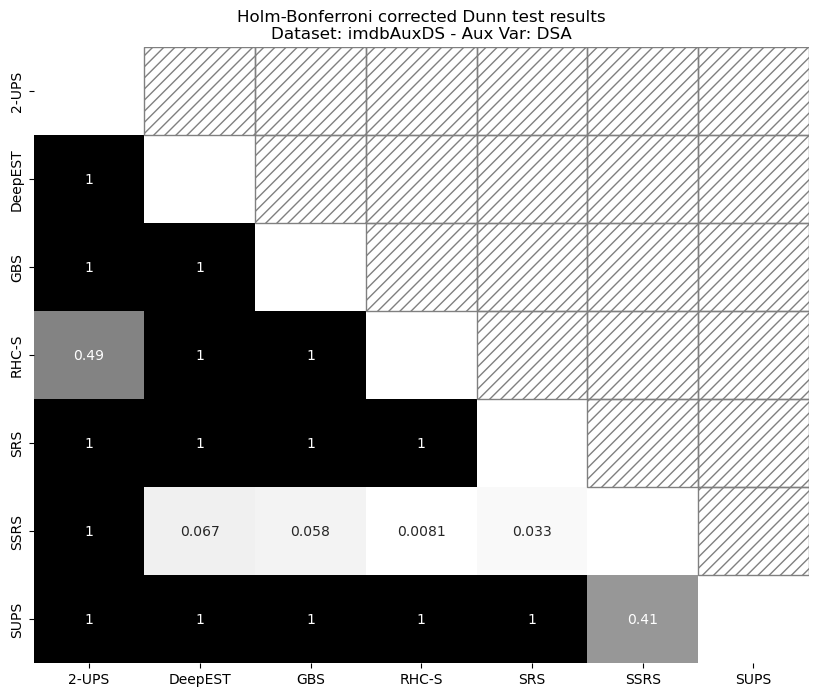

Friedman test statistic for imdbAuxDS - Prediction_Entropy: 25.714285714285722, p-value: 0.00025164426549843067
Raw Dunn's post hoc test results for imdbAuxDS - Prediction_Entropy:
            2-UPS   DeepEST       GBS     RHC-S       SRS      SSRS      SUPS
2-UPS    1.000000  0.323377  0.010424  0.059768  0.019006  0.280087  0.051869
DeepEST  0.323377  1.000000  0.115512  0.370809  0.174505  0.038672  0.338728
GBS      0.010424  0.115512  1.000000  0.497179  0.828969  0.000271  0.537094
RHC-S    0.059768  0.370809  0.497179  1.000000  0.643429  0.003050  0.950785
SRS      0.019006  0.174505  0.828969  0.643429  1.000000  0.000614  0.688281
SSRS     0.280087  0.038672  0.000271  0.003050  0.000614  1.000000  0.002492
SUPS     0.051869  0.338728  0.537094  0.950785  0.688281  0.002492  1.000000

Holm-Bonferroni corrected Dunn's post hoc test results for imdbAuxDS - Prediction_Entropy:
            2-UPS   DeepEST       GBS     RHC-S       SRS      SSRS      SUPS
2-UPS    0.000000  1.0000

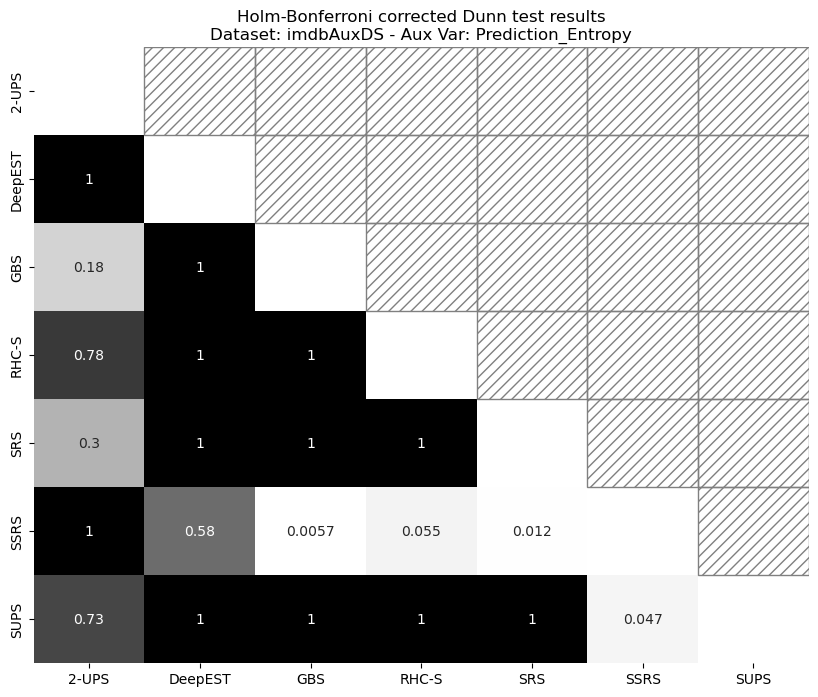

Friedman test statistic for imdbAuxDS - LSA: 29.657142857142873, p-value: 4.5668490543109426e-05
Raw Dunn's post hoc test results for imdbAuxDS - LSA:
            2-UPS   DeepEST       GBS     RHC-S       SRS      SSRS      SUPS
2-UPS    1.000000  0.001309  0.047945  0.439759  0.059411  0.439759  0.000184
DeepEST  0.001309  1.000000  0.216399  0.014630  0.183890  0.000067  0.599328
GBS      0.047945  0.216399  1.000000  0.228105  0.926132  0.005951  0.078149
RHC-S    0.439759  0.014630  0.228105  1.000000  0.265905  0.122298  0.003009
SRS      0.059411  0.183890  0.926132  0.265905  1.000000  0.007867  0.063705
SSRS     0.439759  0.000067  0.005951  0.122298  0.007867  1.000000  0.000006
SUPS     0.000184  0.599328  0.078149  0.003009  0.063705  0.000006  1.000000

Holm-Bonferroni corrected Dunn's post hoc test results for imdbAuxDS - LSA:
            2-UPS   DeepEST       GBS     RHC-S       SRS      SSRS      SUPS
2-UPS    0.000000  0.023561  0.623286  1.000000  0.712926  1.000000  0

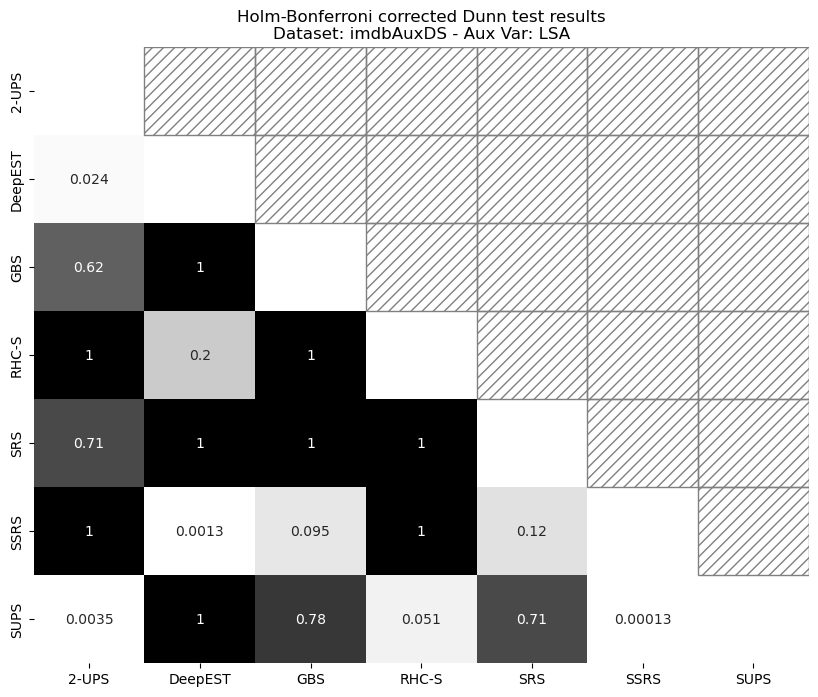

Friedman test statistic for imdbAuxDS - Similarity_Score: 24.414545454545454, p-value: 0.00043805411591648627
Raw Dunn's post hoc test results for imdbAuxDS - Similarity_Score:
            2-UPS   DeepEST       GBS     RHC-S       SRS      SSRS      SUPS
2-UPS    1.000000  0.133944  0.975091  0.003875  0.875940  0.802751  0.003875
DeepEST  0.133944  1.000000  0.126028  0.164697  0.179397  0.211686  0.164697
GBS      0.975091  0.126028  1.000000  0.003507  0.851393  0.778701  0.003507
RHC-S    0.003875  0.164697  0.003507  1.000000  0.006294  0.008330  1.000000
SRS      0.875940  0.179397  0.851393  0.006294  1.000000  0.925371  0.006294
SSRS     0.802751  0.211686  0.778701  0.008330  0.925371  1.000000  0.008330
SUPS     0.003875  0.164697  0.003507  1.000000  0.006294  0.008330  1.000000

Holm-Bonferroni corrected Dunn's post hoc test results for imdbAuxDS - Similarity_Score:
            2-UPS  DeepEST       GBS     RHC-S       SRS      SSRS      SUPS
2-UPS    0.000000      1.0  1.00

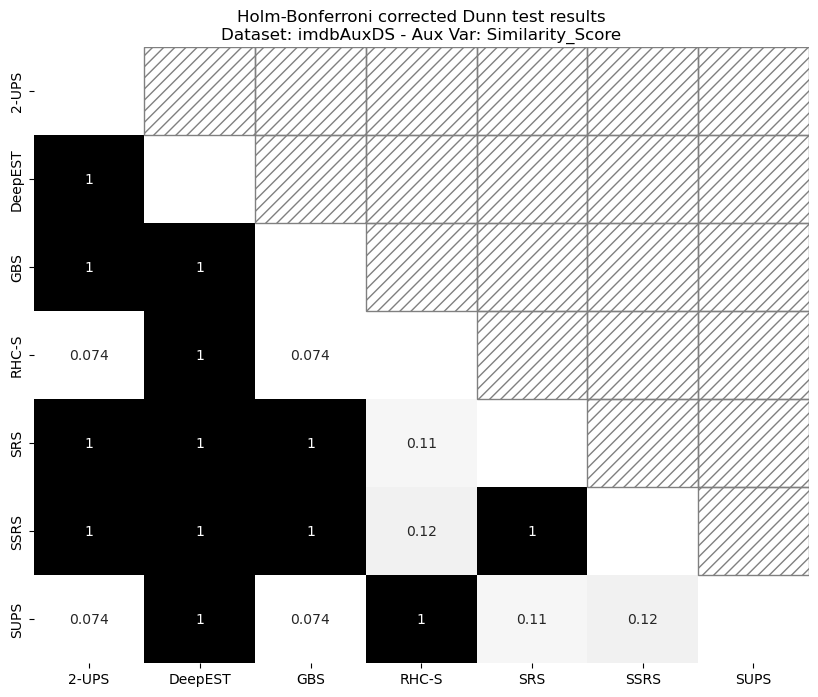

Friedman test statistic for SSTtestAuxDS - Confidence_Score: 18.342857142857156, p-value: 0.005430136180916721
Raw Dunn's post hoc test results for SSTtestAuxDS - Confidence_Score:
            2-UPS   DeepEST       GBS     RHC-S       SRS      SSRS      SUPS
2-UPS    1.000000  0.950785  0.901757  0.853100  0.781207  0.003721  0.083953
DeepEST  0.950785  1.000000  0.853100  0.804997  0.734258  0.004523  0.095619
GBS      0.901757  0.853100  1.000000  0.950785  0.877371  0.002492  0.064078
RHC-S    0.853100  0.804997  0.950785  1.000000  0.926236  0.002028  0.055702
SRS      0.781207  0.734258  0.877371  0.926236  1.000000  0.001480  0.044862
SSRS     0.003721  0.004523  0.002492  0.002028  0.001480  1.000000  0.240914
SUPS     0.083953  0.095619  0.064078  0.055702  0.044862  0.240914  1.000000

Holm-Bonferroni corrected Dunn's post hoc test results for SSTtestAuxDS - Confidence_Score:
            2-UPS  DeepEST       GBS     RHC-S       SRS      SSRS      SUPS
2-UPS    0.000000  1.0000

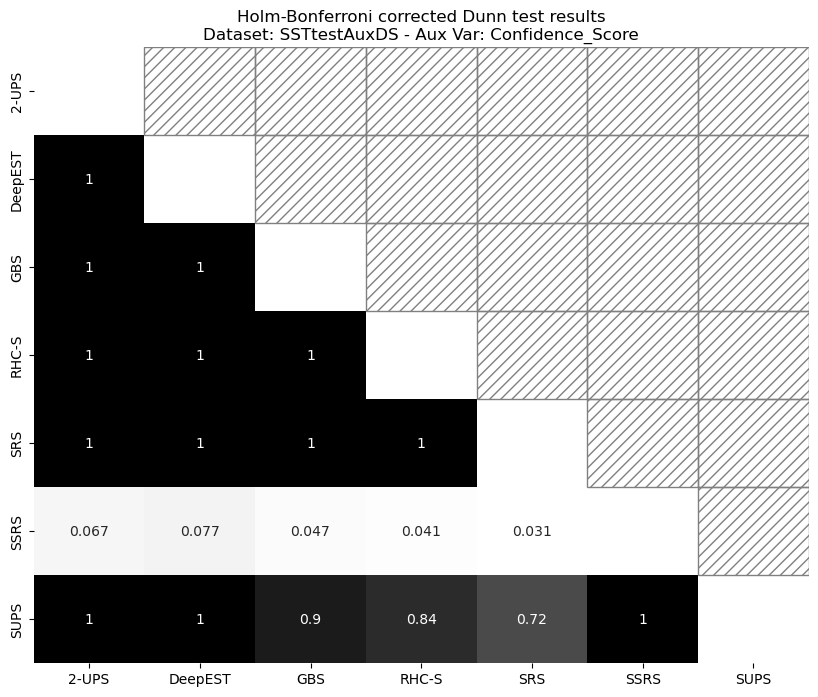

Friedman test statistic for SSTtestAuxDS - DSA: 28.114285714285728, p-value: 8.941840826082169e-05
Raw Dunn's post hoc test results for SSTtestAuxDS - DSA:
            2-UPS   DeepEST       GBS     RHC-S       SRS      SSRS      SUPS
2-UPS    1.000000  0.012429  0.017489  0.004980  0.024270  0.440401  0.440401
DeepEST  0.012429  1.000000  0.901757  0.757621  0.804997  0.001071  0.083953
GBS      0.017489  0.901757  1.000000  0.665706  0.901757  0.001645  0.108548
RHC-S    0.004980  0.757621  0.665706  1.000000  0.578558  0.000344  0.041670
SRS      0.024270  0.804997  0.901757  0.578558  1.000000  0.002492  0.138523
SSRS     0.440401  0.001071  0.001645  0.000344  0.002492  1.000000  0.122823
SUPS     0.440401  0.083953  0.108548  0.041670  0.138523  0.122823  1.000000

Holm-Bonferroni corrected Dunn's post hoc test results for SSTtestAuxDS - DSA:
            2-UPS   DeepEST       GBS     RHC-S       SRS      SSRS      SUPS
2-UPS    0.000000  0.198870  0.262329  0.084661  0.339779  1.0

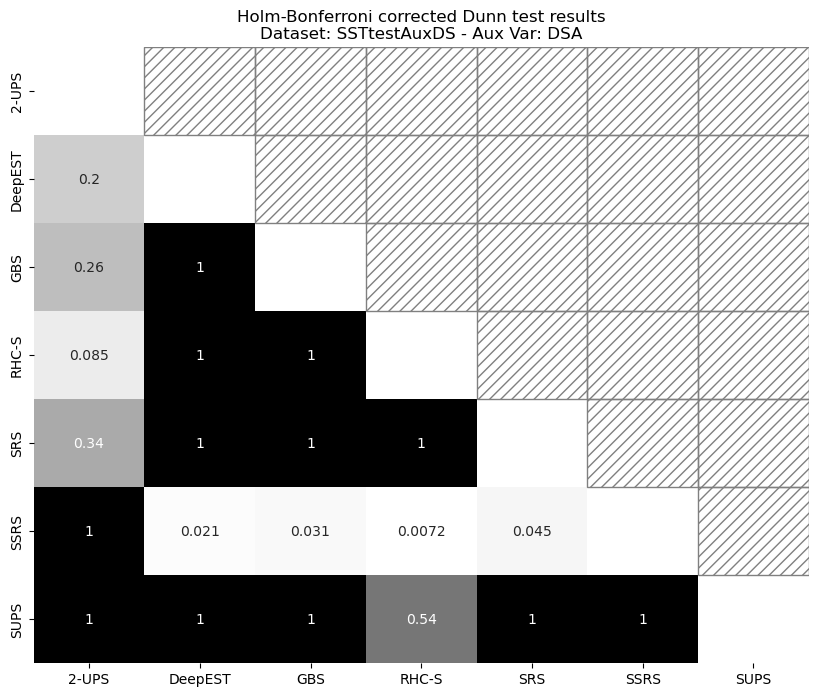

Friedman test statistic for SSTtestAuxDS - Prediction_Entropy: 22.19999999999999, p-value: 0.001113853827142421
Raw Dunn's post hoc test results for SSTtestAuxDS - Prediction_Entropy:
            2-UPS   DeepEST       GBS     RHC-S       SRS      SSRS      SUPS
2-UPS    1.000000  0.101920  0.010424  0.048259  0.016078  0.354539  0.038672
DeepEST  0.101920  1.000000  0.354539  0.734258  0.440401  0.010424  0.665706
GBS      0.010424  0.354539  1.000000  0.557639  0.877371  0.000488  0.621468
RHC-S    0.048259  0.734258  0.557639  1.000000  0.665706  0.003721  0.926236
SRS      0.016078  0.440401  0.877371  0.665706  1.000000  0.000859  0.734258
SSRS     0.354539  0.010424  0.000488  0.003721  0.000859  1.000000  0.002758
SUPS     0.038672  0.665706  0.621468  0.926236  0.734258  0.002758  1.000000

Holm-Bonferroni corrected Dunn's post hoc test results for SSTtestAuxDS - Prediction_Entropy:
            2-UPS   DeepEST       GBS     RHC-S       SRS      SSRS      SUPS
2-UPS    0.000000  

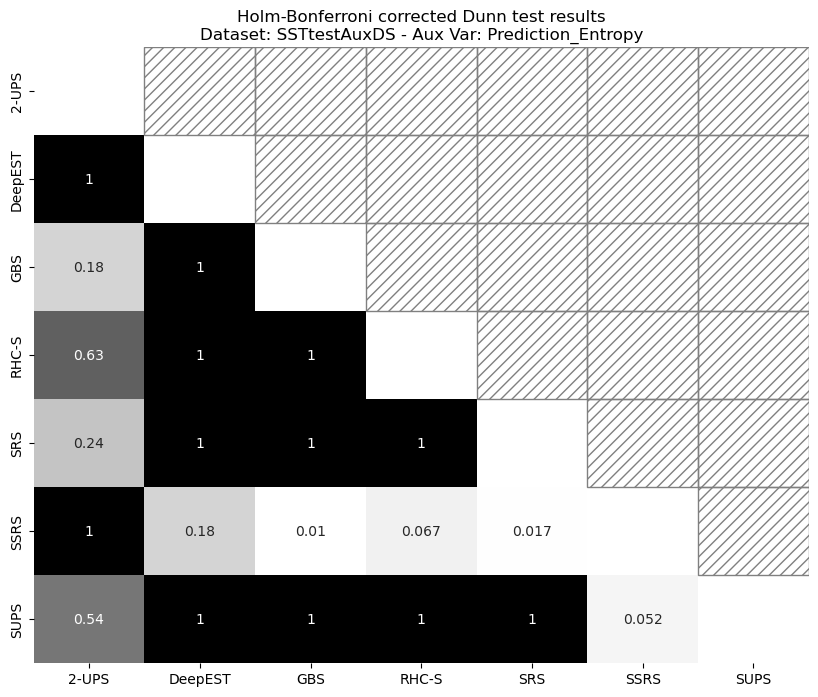

Friedman test statistic for SSTtestAuxDS - LSA: 28.97142857142856, p-value: 6.159904179868664e-05
Raw Dunn's post hoc test results for SSTtestAuxDS - LSA:
            2-UPS   DeepEST       GBS     RHC-S       SRS      SSRS      SUPS
2-UPS    1.000000  0.038672  0.370809  0.253519  0.387534  0.026285  0.048259
DeepEST  0.038672  1.000000  0.003050  0.001330  0.228757  0.000018  0.926236
GBS      0.370809  0.003050  1.000000  0.804997  0.078568  0.184506  0.004104
RHC-S    0.253519  0.001330  0.804997  1.000000  0.044862  0.280087  0.001827
SRS      0.387534  0.228757  0.078568  0.044862  1.000000  0.002028  0.266575
SSRS     0.026285  0.000018  0.184506  0.280087  0.002028  1.000000  0.000027
SUPS     0.048259  0.926236  0.004104  0.001827  0.266575  0.000027  1.000000

Holm-Bonferroni corrected Dunn's post hoc test results for SSTtestAuxDS - LSA:
            2-UPS   DeepEST       GBS     RHC-S       SRS      SSRS      SUPS
2-UPS    0.000000  0.502730  1.000000  1.000000  1.000000  0.36

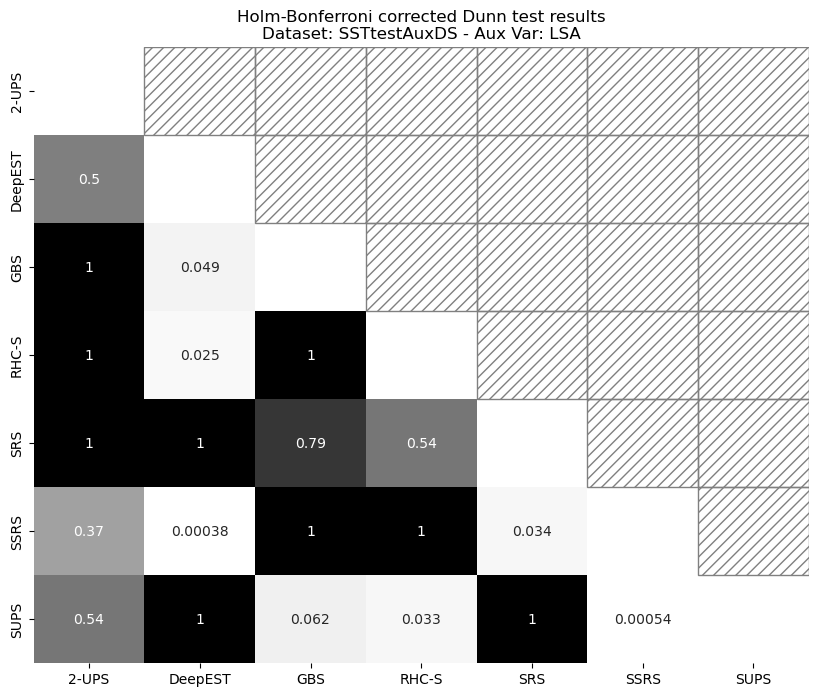

Friedman test statistic for SSTtestAuxDS - Similarity_Score: 27.905454545454564, p-value: 9.789408630050595e-05
Raw Dunn's post hoc test results for SSTtestAuxDS - Similarity_Score:
            2-UPS   DeepEST       GBS     RHC-S       SRS      SSRS      SUPS
2-UPS    1.000000  0.333079  0.000203  0.010937  0.950207  0.925371  0.010937
DeepEST  0.333079  1.000000  0.006002  0.114844  0.302833  0.288417  0.114844
GBS      0.000203  0.006002  1.000000  0.241646  0.000158  0.000139  0.241646
RHC-S    0.010937  0.114844  0.241646  1.000000  0.009129  0.008330  1.000000
SRS      0.950207  0.302833  0.000158  0.009129  1.000000  0.975091  0.009129
SSRS     0.925371  0.288417  0.000139  0.008330  0.975091  1.000000  0.008330
SUPS     0.010937  0.114844  0.241646  1.000000  0.009129  0.008330  1.000000

Holm-Bonferroni corrected Dunn's post hoc test results for SSTtestAuxDS - Similarity_Score:
            2-UPS   DeepEST       GBS     RHC-S       SRS      SSRS      SUPS
2-UPS    0.000000  1.00

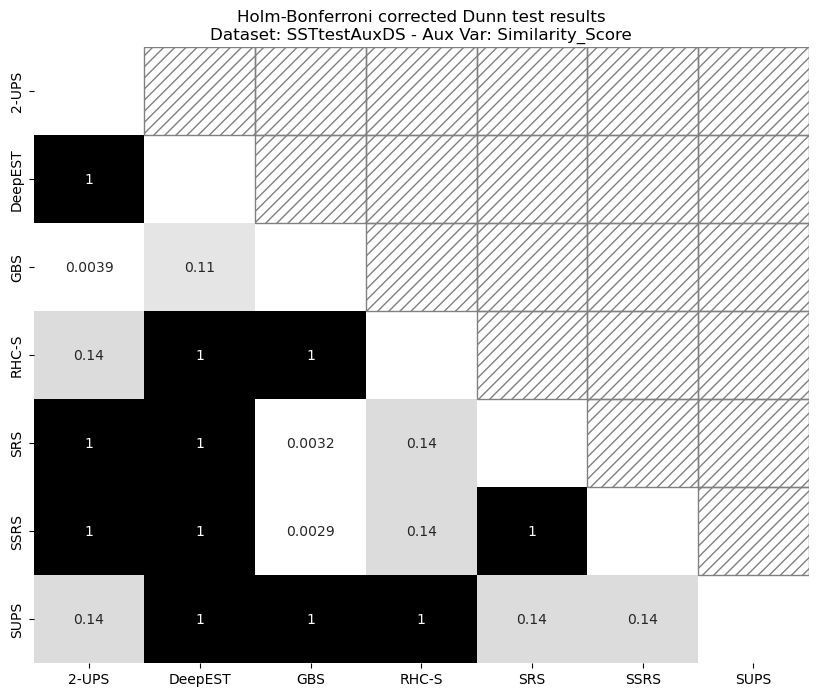

In [38]:
import pandas as pd
import numpy as np
from scipy.stats import friedmanchisquare
import scikit_posthocs as sp
from statsmodels.stats.multitest import multipletests
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("DS4NLP_rsearch_results/combined_datasetsRQ123.csv")

# Auxiliary variables and datasets
aux_vars = data['aux_var'].unique()
datasets = data['dataset'].unique()
methods = data['method'].unique()

# Initialize a dictionary to store results
friedman_results = {}

# Loop through each combination of dataset and auxiliary variable
for dataset in datasets:
    for aux_var in aux_vars:
        # Subset the data for the current dataset and auxiliary variable
        subset_df = data[(data['dataset'] == dataset) & (data['aux_var'] == aux_var)]

        # Ensure there are enough data points to perform the test
        if subset_df.shape[0] < 2:
            print(f"Not enough data for {dataset} - {aux_var}. Skipping.")
            continue

        # Check if there is variation in the RMSE values
        if subset_df['RMSE'].std() == 0:
            print(f"No variation in RMSE for {dataset} - {aux_var}. Skipping.")
            continue

        # Perform the Friedman test
        try:
            stat, p_value = friedmanchisquare(*[subset_df[subset_df['method'] == method]['RMSE'].values for method in methods])
            friedman_results[(dataset, aux_var)] = (stat, p_value)
            print(f"Friedman test statistic for {dataset} - {aux_var}: {stat}, p-value: {p_value}")

            # If significant, perform Dunn's post hoc test
            if p_value < 0.05:
                dunn_results = sp.posthoc_dunn(subset_df, val_col='RMSE', group_col='method', p_adjust=None)
                print(f"Raw Dunn's post hoc test results for {dataset} - {aux_var}:\n{dunn_results}\n")

                # Flatten the Dunn results into a list of p-values
                p_values = dunn_results.values[np.triu_indices_from(dunn_results, k=1)]

                # Apply Holm-Bonferroni correction
                reject, pvals_corrected, _, _ = multipletests(p_values, method='holm')

                # Reconstruct the adjusted p-value matrix
                corrected_matrix = np.zeros_like(dunn_results, dtype=float)
                corrected_matrix[np.triu_indices_from(corrected_matrix, k=1)] = pvals_corrected
                corrected_matrix = corrected_matrix + corrected_matrix.T  # Symmetrize the matrix
                corrected_dunn_results = pd.DataFrame(corrected_matrix, index=dunn_results.index, columns=dunn_results.columns)

                print(f"Holm-Bonferroni corrected Dunn's post hoc test results for {dataset} - {aux_var}:\n{corrected_dunn_results}\n")

                # Step 1: Identify significant pairs
                significant_pairs = np.where((corrected_dunn_results < 0.05) & (corrected_dunn_results != 0))
                
                # Step 2: Compare RMSE values
                for i, j in zip(*significant_pairs):
                    method1 = corrected_dunn_results.index[i]
                    method2 = corrected_dunn_results.columns[j]
                    
                    rmse1 = subset_df[subset_df['method'] == method1]['RMSE'].sum()
                    rmse2 = subset_df[subset_df['method'] == method2]['RMSE'].sum()
                    
                    better_method = method1 if rmse1 < rmse2 else method2
                    
                    print(f"Comparison for {dataset} - {aux_var}:")
                    print(f"  {method1} (RMSE: {rmse1}) vs {method2} (RMSE: {rmse2})")
                    print(f"  Better performing method: {better_method}\n")

                # Step 3: Plot the corrected Dunn test results with lower triangle only
                mask = np.triu(np.ones_like(corrected_dunn_results, dtype=bool))

                plt.figure(figsize=(10, 8))
                sns.heatmap(corrected_dunn_results, mask=mask, annot=True, cmap='gray_r', cbar=False)
                plt.title(f'Holm-Bonferroni corrected Dunn test results\nDataset: {dataset} - Aux Var: {aux_var}')

                # Adding diagonal hatches on the upper triangle
                for i in range(len(corrected_dunn_results)):
                    for j in range(i+1, len(corrected_dunn_results)):
                        plt.gca().add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='grey', hatch='///'))

                plt.show()

        except Exception as e:
            print(f"Error performing tests for {dataset} - {aux_var}: {e}")

/var/folders/5y/h6tflr0135gbw70c3f02x1qm0000gq/T/ipykernel_1936/3912825058.py:35: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.gca().add_patch(plt.Rectangle((i, i), 1, 1, color='black', edgecolor='white', linewidth=1.5))


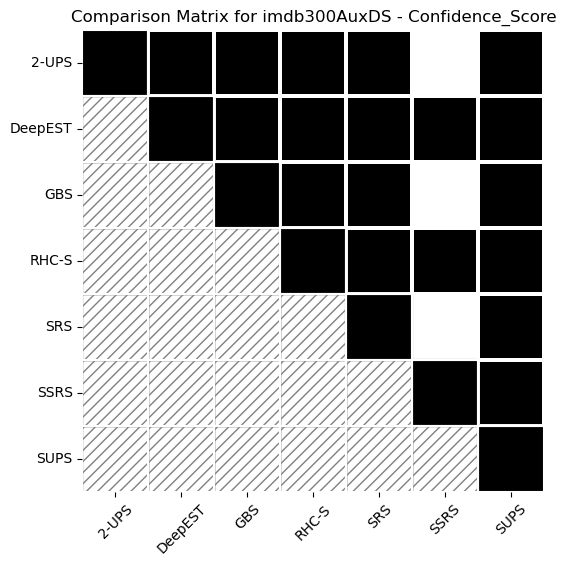

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the comparison matrix for methods
methods = ['2-UPS', 'DeepEST', 'GBS', 'RHC-S', 'SRS', 'SSRS', 'SUPS']

# Initialize the matrix with zeros (for black background)
comparison_matrix = np.zeros((len(methods), len(methods)))

# Manually set the values based on the comparison results provided:
# White (1): Row method is better
# Gray (0.5): Column method is better

comparison_matrix[0, 5] = 1  # 2-UPS (Row) is better than SSRS (Column)
comparison_matrix[2, 5] = 1  # GBS (Row) is better than SSRS (Column)
comparison_matrix[4, 5] = 1  # SRS (Row) is better than SSRS (Column)
comparison_matrix[5, 0] = 0.5  # SSRS (Row) is worse than 2-UPS (Column)
comparison_matrix[5, 2] = 0.5  # SSRS (Row) is worse than GBS (Column)
comparison_matrix[5, 4] = 0.5  # SSRS (Row) is worse than SRS (Column)

# Plot the matrix with the upper triangle
plt.figure(figsize=(8, 6))
mask_upper = np.tril(np.ones_like(comparison_matrix, dtype=bool))
sns.heatmap(comparison_matrix, cmap=sns.color_palette(["black", "gray", "white"]), cbar=False,
            xticklabels=methods, yticklabels=methods, square=True, linewidths=1.5, linecolor='white', mask=mask_upper)

# Add diagonal hatches on the lower triangle
for i in range(len(comparison_matrix)):
    for j in range(0, i):
        plt.gca().add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='grey', hatch='///'))

# Block the diagonal by coloring it black
for i in range(len(comparison_matrix)):
    plt.gca().add_patch(plt.Rectangle((i, i), 1, 1, color='black', edgecolor='white', linewidth=1.5))

# Ensure white borders around all squares
for i in range(len(methods)):
    for j in range(len(methods)):
        plt.gca().add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='white', linewidth=1.5))

plt.title('Comparison Matrix for imdb300AuxDS - Confidence_Score')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [87]:

    # Comparison matrices for each dataset-auxiliary variable combination
    comparison_data = {
        'imdb300AuxDS - Confidence_Score': {
            (0, 5): 1,  # 2-UPS is better than SSRS
            (2, 5): 1,  # GBS is better than SSRS
            (4, 5): 1,  # SRS is better than SSRS
            (5, 0): 0.5,  # SSRS is worse than 2-UPS
            (5, 2): 0.5,  # SSRS is worse than GBS
            (5, 4): 0.5,  # SSRS is worse than SRS
        },
        'imdb300AuxDS - DSA': {
            (1, 5): 1,  # DeepEST is better than SSRS
            (2, 5): 1,  # GBS is better than SSRS
            (3, 5): 1,  # RHC-S is better than SSRS
            (4, 5): 1,  # SRS is better than SSRS
            (5, 1): 0.5,  # SSRS is worse than DeepEST
            (5, 2): 0.5,  # SSRS is worse than GBS
            (5, 3): 0.5,  # SSRS is worse than RHC-S
            (5, 4): 0.5,  # SSRS is worse than SRS
        },
        'imdb300AuxDS - Prediction_Entropy': {
            (2, 5): 1,  # GBS is better than SSRS
            (4, 5): 1,  # SRS is better than SSRS
            (5, 2): 0.5,  # SSRS is worse than GBS
            (5, 4): 0.5,  # SSRS is worse than SRS
        },
        'imdb300AuxDS - LSA': {
            (1, 5): 1,  # DeepEST is better than SSRS
            (4, 5): 1,  # SRS is better than SSRS
            (6, 0): 1,  # SUPS is better than 2-UPS
            (6, 5): 1,  # SUPS is better than SSRS
            (5, 1): 0.5,  # SSRS is worse than DeepEST
            (5, 4): 0.5,  # SSRS is worse than SRS
            (5, 6): 0.5,  # SSRS is worse than SUPS
            (0, 6): 0.5,  # 2-UPS is worse than SUPS
        },
        'imdb300AuxDS - Similarity_Score': {
            (0, 2): 1,  # 2-UPS is better than GBS
            (4, 2): 1,  # SRS is better than GBS
            (5, 2): 1,  # SSRS is better than GBS
            (2, 0): 0.5,  # GBS is worse than 2-UPS
            (2, 4): 0.5,  # GBS is worse than SRS
            (2, 5): 0.5,  # GBS is worse than SSRS
        },

        'imdbAuxDS - Confidence_Score': {
            (0, 5): 1,  # 2-UPS is better than SSRS
            (2, 5): 1,  # GBS is better than SSRS
            (4, 5): 1,  # SRS is better than SSRS
            (5, 0): 0.5,  # SSRS is worse than 2-UPS
            (5, 2): 0.5,  # SSRS is worse than GBS
            (5, 4): 0.5,  # SSRS is worse than SRS
        },
        'imdbAuxDS - DSA': {
            (3, 5): 1,  # RHC-S is better than SSRS
            (4, 5): 1,  # SRS is better than SSRS
            (5, 3): 0.5,  # SSRS is worse than RHC-S
            (5, 4): 0.5,  # SSRS is worse than SRS
        },
        'imdbAuxDS - Prediction_Entropy': {
            (2, 5): 1,  # GBS is better than SSRS
            (4, 5): 1,  # SRS is better than SSRS
            (5, 2): 0.5,  # SSRS is worse than GBS
            (5, 4): 0.5,  # SSRS is worse than SRS
        },
        'imdbAuxDS - LSA': {
            (1, 5): 1,  # DeepEST is better than SSRS
            (4, 5): 1,  # SRS is better than SSRS
            (6, 0): 1,  # SUPS is better than 2-UPS
            (6, 5): 1,  # SUPS is better than SSRS
            (5, 1): 0.5,  # SSRS is worse than DeepEST
            (5, 4): 0.5,  # SSRS is worse than SRS
            (5, 6): 0.5,  # SSRS is worse than SUPS
            (0, 6): 0.5,  # 2-UPS is worse than SUPS
        },
        'imdbAuxDS - Similarity_Score': {
            (0, 2): 1,  # 2-UPS is better than GBS
            (4, 2): 1,  # SRS is better than GBS
            (5, 2): 1,  # SSRS is better than GBS
            (2, 0): 0.5,  # GBS is worse than 2-UPS
            (2, 4): 0.5,  # GBS is worse than SRS
            (2, 5): 0.5,  # GBS is worse than SSRS
        },
        'SSTtestAuxDS - Confidence_Score': {
            (2, 5): 1,  # GBS is better than SSRS
            (3, 5): 1,  # RHC-S is better than SSRS
            (4, 5): 1,  # SRS is better than SSRS
            (5, 2): 0.5,  # SSRS is worse than GBS
            (5, 3): 0.5,  # SSRS is worse than RHC-S
            (5, 4): 0.5,  # SSRS is worse than SRS
        },
        'SSTtestAuxDS - DSA': {
            (1, 5): 1,  # DeepEST is better than SSRS
            (2, 5): 1,  # GBS is better than SSRS
            (3, 5): 1,  # RHC-S is better than SSRS
            (4, 5): 1,  # SRS is better than SSRS
            (5, 1): 0.5,  # SSRS is worse than DeepEST
            (5, 2): 0.5,  # SSRS is worse than GBS
            (5, 3): 0.5,  # SSRS is worse than RHC-S
            (5, 4): 0.5,  # SSRS is worse than SRS
        },
        'SSTtestAuxDS - Prediction_Entropy': {
            (2, 5): 1,  # GBS is better than SSRS
            (4, 5): 1,  # SRS is better than SSRS
            (5, 2): 0.5,  # SSRS is worse than GBS
            (5, 4): 0.5,  # SSRS is worse than SRS
        },
        'SSTtestAuxDS - LSA': {
            (1, 5): 1,  # DeepEST is better than SSRS
            (4, 5): 1,  # SRS is better than SSRS
            (6, 3): 1,  # SUPS is better than RHC-S
            (6, 5): 1,  # SUPS is better than SSRS
            (5, 1): 0.5,  # SSRS is worse than DeepEST
            (5, 4): 0.5,  # SSRS is worse than SRS
            (5, 6): 0.5,  # SSRS is worse than SUPS
            (3, 6): 0.5,  # RHC-S is worse than SUPS
        },
        'SSTtestAuxDS - Similarity_Score': {
            (0, 2): 1,  # 2-UPS is better than GBS
            (4, 2): 1,  # SRS is better than GBS
            (5, 2): 1,  # SSRS is better than GBS
            (2, 0): 0.5,  # GBS is worse than 2-UPS
            (2, 4): 0.5,  # GBS is worse than SRS
            (2, 5): 0.5,  # GBS is worse than SSRS
        }
    }

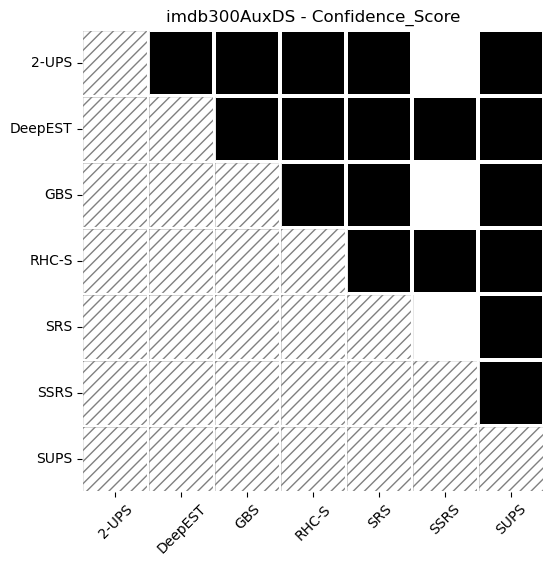

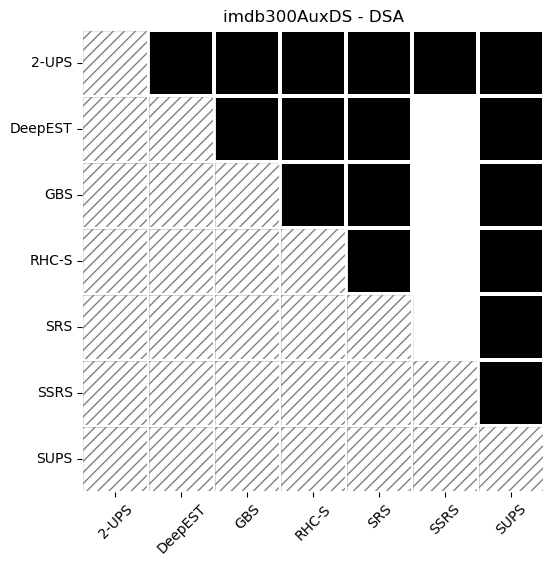

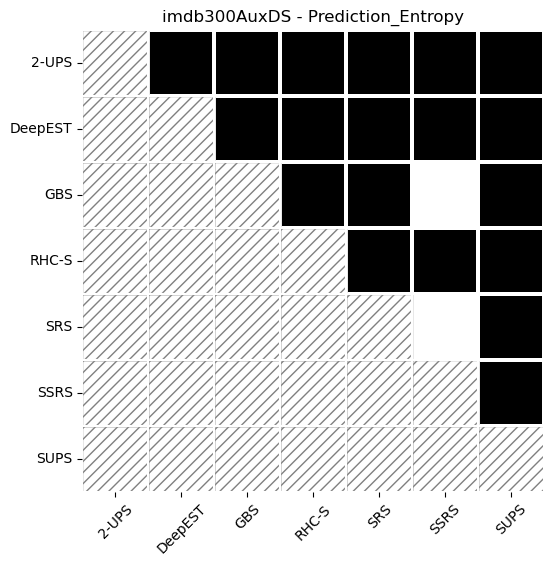

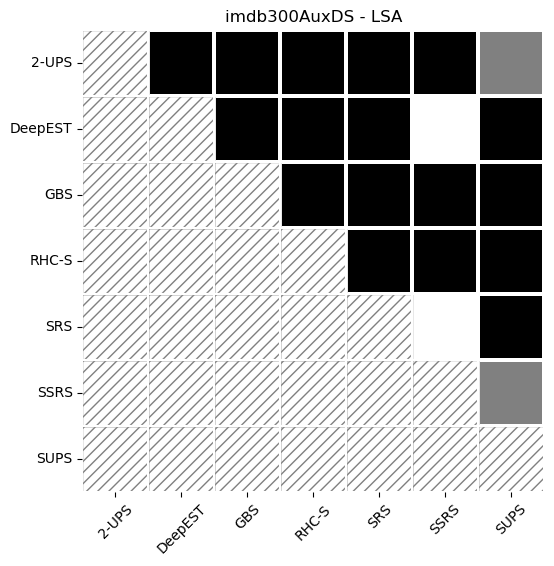

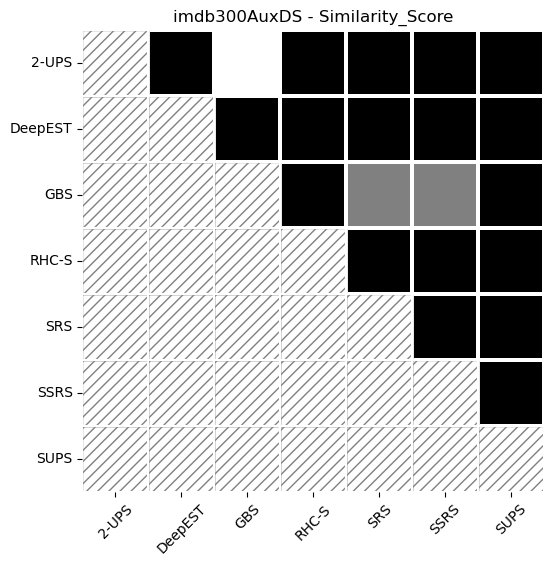

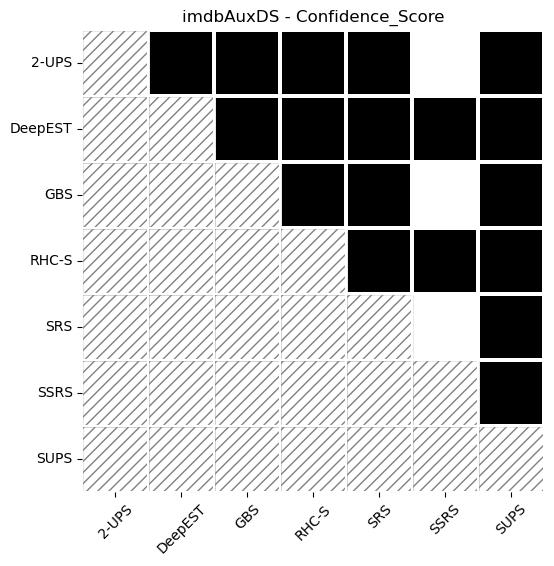

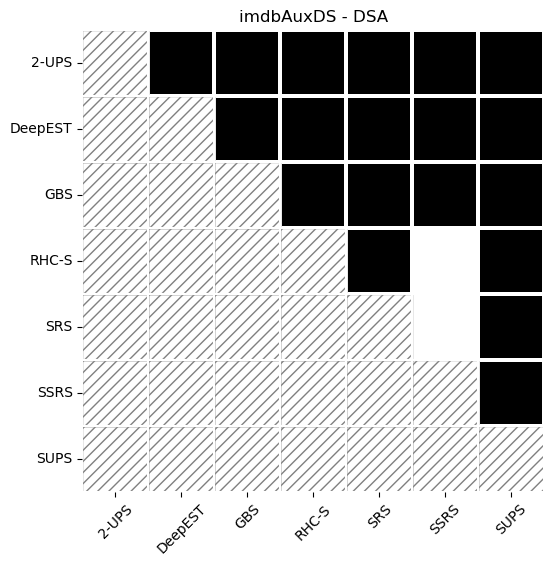

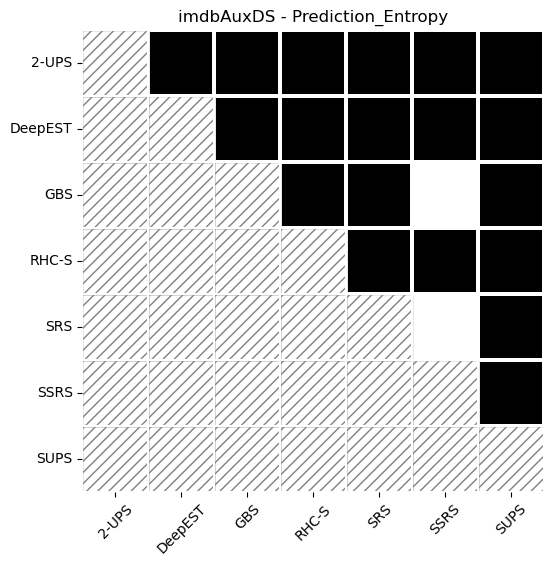

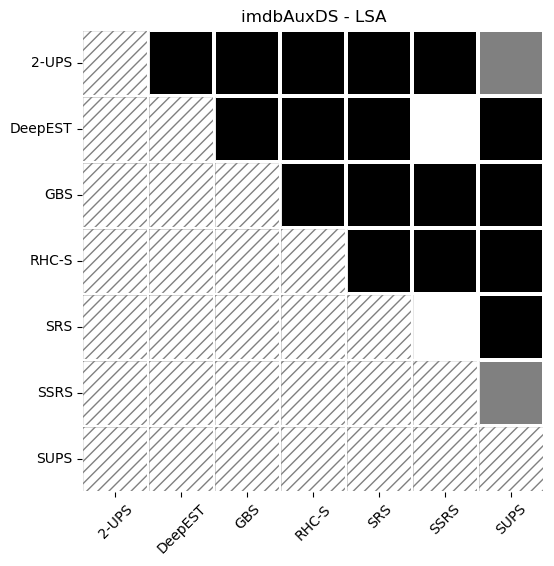

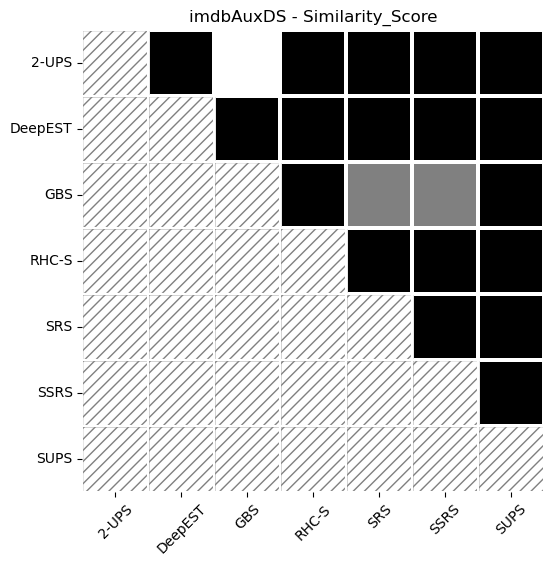

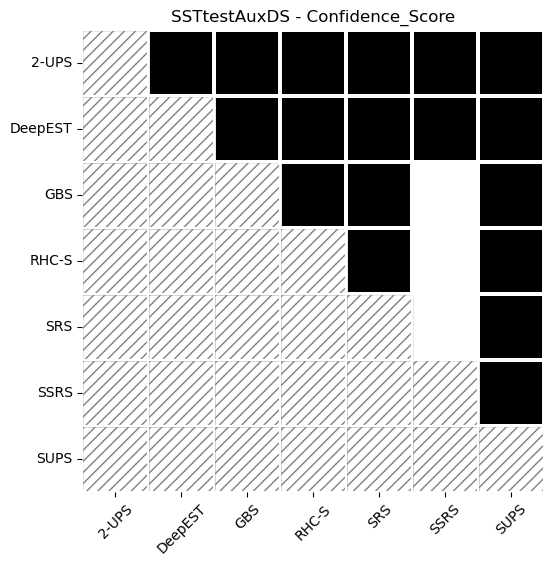

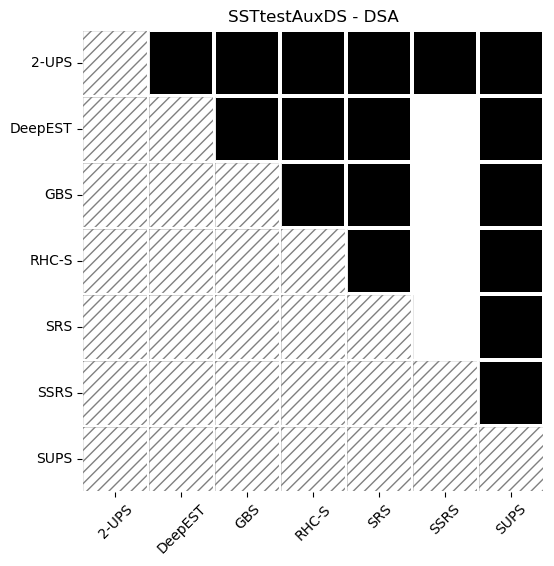

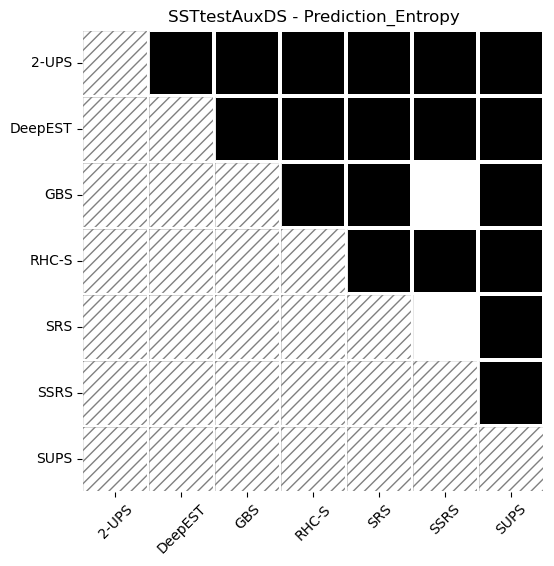

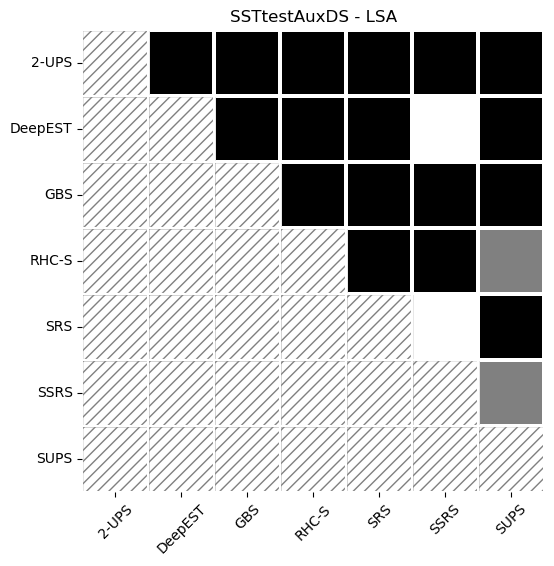

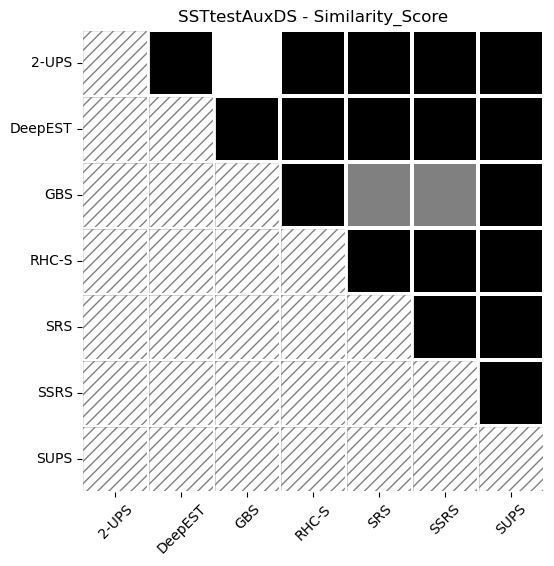

Total number of plots generated: 15


In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the method labels
methods = ['2-UPS', 'DeepEST', 'GBS', 'RHC-S', 'SRS', 'SSRS', 'SUPS']

# Initialize a counter for the number of plots
plot_count = 0

def plot_comparison_matrix(title, comparisons):
    global plot_count  # Use the global plot_count variable
    # Initialize the comparison matrix with zeros (black)
    comparison_matrix = np.zeros((len(methods), len(methods)))

    # Apply the comparisons provided
    for (row, col), value in comparisons.items():
        comparison_matrix[row, col] = value

    # Create a mask for the lower triangle including the diagonal
    mask_upper = np.tril(np.ones_like(comparison_matrix, dtype=bool))

    # Plot the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(comparison_matrix, cmap=sns.color_palette(["black", "gray", "white"]), cbar=False,
                xticklabels=methods, yticklabels=methods, square=True, linewidths=1.5, linecolor='white', mask=mask_upper)

    # Add diagonal hatches on the lower triangle including the diagonal
    for i in range(len(comparison_matrix)):
        for j in range(0, i + 1):
            plt.gca().add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='grey', hatch='///'))

    # Ensure white borders around all squares
    for i in range(len(methods)):
        for j in range(len(methods)):
            plt.gca().add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='white', linewidth=1.5))

    # Title and display settings
    plt.title(title)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()

    # Increment the plot count after each plot is displayed
    plot_count += 1

# Generate all comparison matrices
for title, comparisons in comparison_data.items():
    plot_comparison_matrix(title, comparisons)

# Print the total number of plots generated
print(f"Total number of plots generated: {plot_count}")

In [82]:


import pandas as pd
import numpy as np
from scipy.stats import friedmanchisquare
import scikit_posthocs as sp
from statsmodels.stats.multitest import multipletests

# Load the dataset
data = pd.read_csv("DS4NLP_rsearch_results/combined_datasetsRQ123.csv")

# Specify the dataset and auxiliary variable you want to analyze
dataset_name = "imdbAuxDS"
aux_var_name = "Similarity_Score"

# Subset the data for the specific dataset and auxiliary variable
subset_df = data[(data['dataset'] == dataset_name) & (data['aux_var'] == aux_var_name)]

# Ensure there are enough data points to perform the test
if subset_df.shape[0] < 2:
    print(f"Not enough data for {dataset_name} - {aux_var_name}. Skipping.")
else:
    # Perform the Friedman test
    methods = subset_df['method'].unique()
    stat, p_value = friedmanchisquare(*[subset_df[subset_df['method'] == method]['RMSE'].values for method in methods])
    print(f"Friedman test statistic: {stat}, p-value: {p_value}")

    # If significant, perform Dunn's post hoc test
    if p_value < 0.05:
        dunn_results = sp.posthoc_dunn(subset_df, val_col='RMSE', group_col='method', p_adjust=None)
        print(f"Raw Dunn's post hoc test results:\n{dunn_results}\n")

        # Apply Holm-Bonferroni correction
        p_values = dunn_results.values[np.triu_indices_from(dunn_results, k=1)]
        reject, pvals_corrected, _, _ = multipletests(p_values, method='holm')

        # Reconstruct the adjusted p-value matrix
        corrected_matrix = np.zeros_like(dunn_results, dtype=float)
        corrected_matrix[np.triu_indices_from(corrected_matrix, k=1)] = pvals_corrected
        corrected_matrix = corrected_matrix + corrected_matrix.T  # Symmetrize the matrix
        corrected_dunn_results = pd.DataFrame(corrected_matrix, index=dunn_results.index, columns=dunn_results.columns)
        print(f"Holm-Bonferroni corrected Dunn's post hoc test results:\n{corrected_dunn_results}\n")

        # RMSE Comparisons
# RMSE Comparisons without significance filtering
        print(f"RMSE Comparisons for {dataset_name} - {aux_var_name}:\n")
        for i in range(len(corrected_dunn_results)):
            for j in range(i+1, len(corrected_dunn_results)):
                method1 = corrected_dunn_results.index[i]
                method2 = corrected_dunn_results.columns[j]

                rmse1 = subset_df[subset_df['method'] == method1]['RMSE'].sum()
                rmse2 = subset_df[subset_df['method'] == method2]['RMSE'].sum()

                if rmse1 < rmse2:
                    print(f"{method1} is better than {method2} (RMSE: {rmse1} vs {rmse2})")
                else:
                    print(f"{method2} is better than {method1} (RMSE: {rmse2} vs {rmse1})")
    else:
        print(f"No significant differences were found in the Dunn test for {dataset_name} - {aux_var_name}.")

Friedman test statistic: 24.414545454545454, p-value: 0.00043805411591648627
Raw Dunn's post hoc test results:
            2-UPS   DeepEST       GBS     RHC-S       SRS      SSRS      SUPS
2-UPS    1.000000  0.133944  0.975091  0.003875  0.875940  0.802751  0.003875
DeepEST  0.133944  1.000000  0.126028  0.164697  0.179397  0.211686  0.164697
GBS      0.975091  0.126028  1.000000  0.003507  0.851393  0.778701  0.003507
RHC-S    0.003875  0.164697  0.003507  1.000000  0.006294  0.008330  1.000000
SRS      0.875940  0.179397  0.851393  0.006294  1.000000  0.925371  0.006294
SSRS     0.802751  0.211686  0.778701  0.008330  0.925371  1.000000  0.008330
SUPS     0.003875  0.164697  0.003507  1.000000  0.006294  0.008330  1.000000

Holm-Bonferroni corrected Dunn's post hoc test results:
            2-UPS  DeepEST       GBS     RHC-S       SRS      SSRS      SUPS
2-UPS    0.000000      1.0  1.000000  0.073648  1.000000  1.000000  0.073648
DeepEST  1.000000      0.0  1.000000  1.000000  1.0000

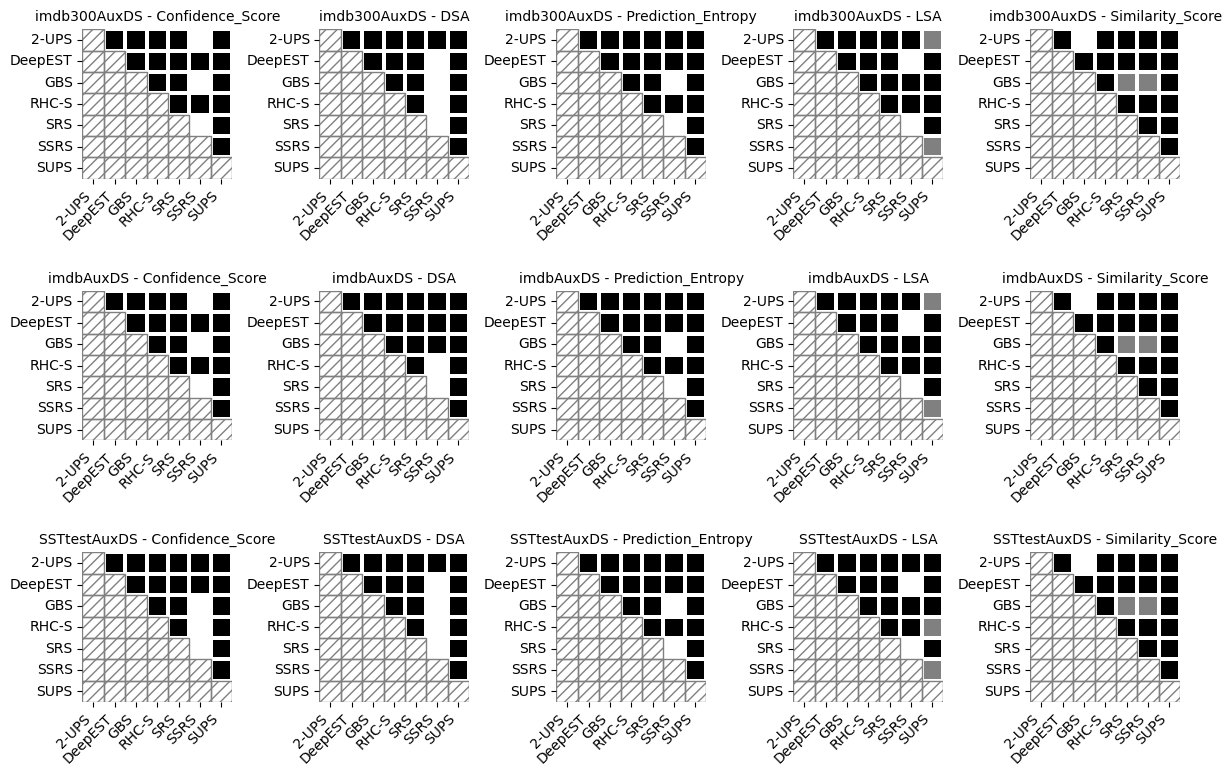

Total number of plots: 15


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the method labels
methods = ['2-UPS', 'DeepEST', 'GBS', 'RHC-S', 'SRS', 'SSRS', 'SUPS']

# Create a function to plot a single matrix
def plot_single_matrix(ax, comparison_matrix, title):
    mask_upper = np.tril(np.ones_like(comparison_matrix, dtype=bool))
    sns.heatmap(comparison_matrix, cmap=sns.color_palette(["black", "gray", "white"]), cbar=False,
                xticklabels=methods, yticklabels=methods, square=True, linewidths=1.5, linecolor='white', mask=mask_upper, ax=ax)
    
    # Add diagonal hatches on the lower triangle and main diagonal
    for i in range(len(comparison_matrix)):
        for j in range(0, i + 1):  # includes the diagonal
            ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='grey', hatch='///'))
    
    ax.set_title(title, fontsize=10)
    ax.set_xticklabels(methods, rotation=45, ha='right')
    ax.set_yticklabels(methods, rotation=0)

# Placeholder for comparison data
# Example comparison data structure:
comparison_data = {
    'imdb300AuxDS - Confidence_Score': {
        (0, 5): 1, (2, 5): 1, (4, 5): 1, (5, 0): 0.5, (5, 2): 0.5, (5, 4): 0.5
    },
    'imdb300AuxDS - DSA': {
        (1, 5): 1, (2, 5): 1, (3, 5): 1, (4, 5): 1, (5, 1): 0.5, (5, 2): 0.5, (5, 3): 0.5, (5, 4): 0.5
    },
    'imdb300AuxDS - Prediction_Entropy': {
        (2, 5): 1, (4, 5): 1, (5, 2): 0.5, (5, 4): 0.5
    },
    'imdb300AuxDS - LSA': {
        (1, 5): 1, (4, 5): 1, (6, 0): 1, (6, 5): 1, (5, 1): 0.5, (5, 4): 0.5, (5, 6): 0.5, (0, 6): 0.5
    },
    'imdb300AuxDS - Similarity_Score': {
        (0, 2): 1, (4, 2): 1, (5, 2): 1, (2, 0): 0.5, (2, 4): 0.5, (2, 5): 0.5
    },
    'imdbAuxDS - Confidence_Score': {
        (0, 5): 1, (2, 5): 1, (4, 5): 1, (5, 0): 0.5, (5, 2): 0.5, (5, 4): 0.5
    },
    'imdbAuxDS - DSA': {
        (3, 5): 1, (4, 5): 1, (5, 3): 0.5, (5, 4): 0.5
    },
    'imdbAuxDS - Prediction_Entropy': {
        (2, 5): 1, (4, 5): 1, (5, 2): 0.5, (5, 4): 0.5
    },
    'imdbAuxDS - LSA': {
        (1, 5): 1, (4, 5): 1, (6, 0): 1, (6, 5): 1, (5, 1): 0.5, (5, 4): 0.5, (5, 6): 0.5, (0, 6): 0.5
    },
    'imdbAuxDS - Similarity_Score': {
        (0, 2): 1, (4, 2): 1, (5, 2): 1, (2, 0): 0.5, (2, 4): 0.5, (2, 5): 0.5
    },
    'SSTtestAuxDS - Confidence_Score': {
        (2, 5): 1, (3, 5): 1, (4, 5): 1, (5, 2): 0.5, (5, 3): 0.5, (5, 4): 0.5
    },
    'SSTtestAuxDS - DSA': {
        (1, 5): 1, (2, 5): 1, (3, 5): 1, (4, 5): 1, (5, 1): 0.5, (5, 2): 0.5, (5, 3): 0.5, (5, 4): 0.5
    },
    'SSTtestAuxDS - Prediction_Entropy': {
        (2, 5): 1, (4, 5): 1, (5, 2): 0.5, (5, 4): 0.5
    },
    'SSTtestAuxDS - LSA': {
        (1, 5): 1, (4, 5): 1, (6, 3): 1, (6, 5): 1, (5, 1): 0.5, (5, 4): 0.5, (5, 6): 0.5, (3, 6): 0.5
    },
    'SSTtestAuxDS - Similarity_Score': {
        (0, 2): 1, (4, 2): 1, (5, 2): 1, (2, 0): 0.5, (2, 4): 0.5, (2, 5): 0.5
    }
}

# Create a grid of subplots (5 rows by 3 columns)
fig, axes = plt.subplots(3, 5, figsize=(12, 8))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each comparison matrix in its respective subplot
for i, (title, comparisons) in enumerate(comparison_data.items()):
    # Initialize the matrix for this plot
    comparison_matrix = np.zeros((len(methods), len(methods)))
    
    # Apply the comparisons provided
    for (row, col), value in comparisons.items():
        comparison_matrix[row, col] = value
    
    # Plot the matrix in the corresponding subplot
    plot_single_matrix(axes[i], comparison_matrix, title)

# Adjust layout for better spacing
plt.tight_layout()

# Display the figure
plt.show()

# Count the number of plots
print(f"Total number of plots: {len(comparison_data)}")

Results for imdb300AuxDS - Confidence_Score:
2-UPS (row) is better than SSRS (column).
GBS (row) is better than SSRS (column).
SRS (row) is better than SSRS (column).

Results for imdb300AuxDS - DSA:
DeepEST (row) is better than SSRS (column).
GBS (row) is better than SSRS (column).
RHC-S (row) is better than SSRS (column).
SRS (row) is better than SSRS (column).

Results for imdb300AuxDS - Prediction_Entropy:
GBS (row) is better than SSRS (column).
SRS (row) is better than SSRS (column).

Results for imdb300AuxDS - LSA:
DeepEST (row) is better than SSRS (column).
SRS (row) is better than SSRS (column).
SUPS (column) is better than SSRS (row).
SUPS (column) is better than 2-UPS (row).

Results for imdb300AuxDS - Similarity_Score:
2-UPS (row) is better than GBS (column).
SRS (column) is better than GBS (row).
SSRS (column) is better than GBS (row).

Results for imdbAuxDS - Confidence_Score:
2-UPS (row) is better than SSRS (column).
GBS (row) is better than SSRS (column).
SRS (row) is be

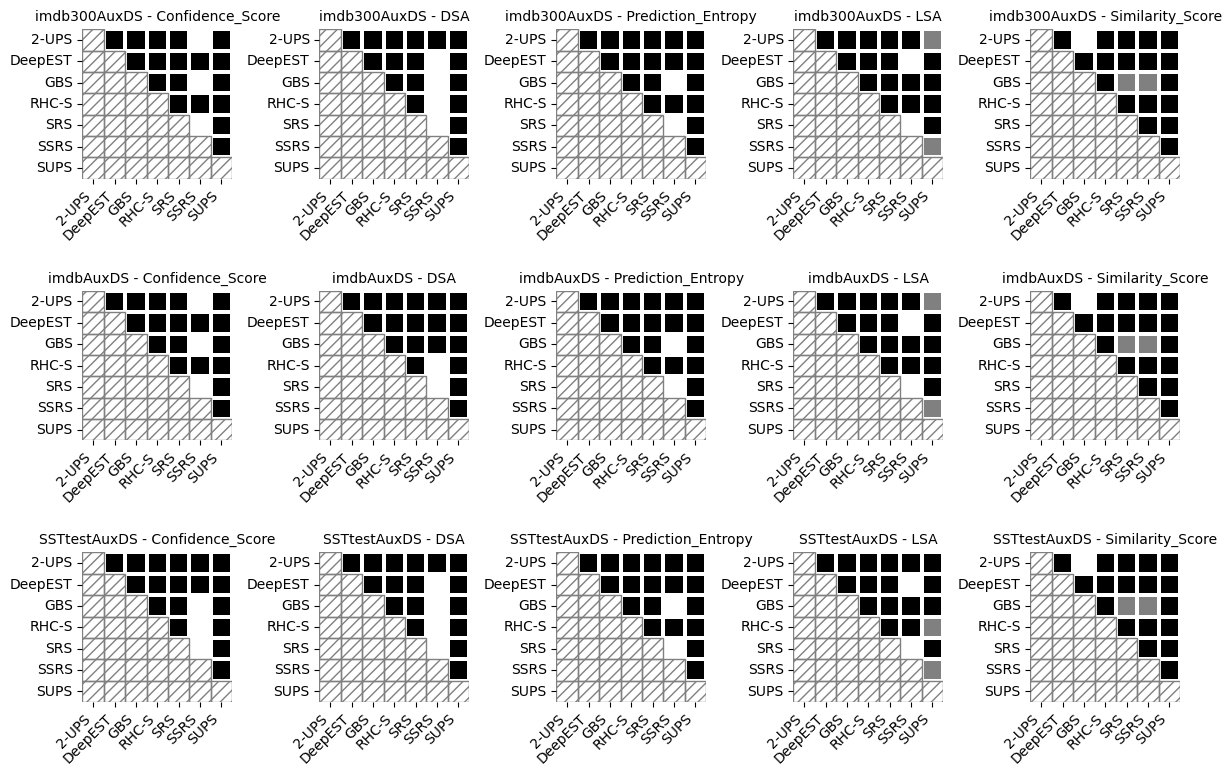

Total number of plots: 15


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the method labels
methods = ['2-UPS', 'DeepEST', 'GBS', 'RHC-S', 'SRS', 'SSRS', 'SUPS']

# Create a function to plot a single matrix
def plot_single_matrix(ax, comparison_matrix, title):
    mask_upper = np.tril(np.ones_like(comparison_matrix, dtype=bool))
    sns.heatmap(comparison_matrix, cmap=sns.color_palette(["black", "gray", "white"]), cbar=False,
                xticklabels=methods, yticklabels=methods, square=True, linewidths=1.5, linecolor='white', mask=mask_upper, ax=ax)
    
    # Add diagonal hatches on the lower triangle and main diagonal
    for i in range(len(comparison_matrix)):
        for j in range(0, i + 1):  # includes the diagonal
            ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='grey', hatch='///'))
    
    ax.set_title(title, fontsize=10)
    ax.set_xticklabels(methods, rotation=45, ha='right')
    ax.set_yticklabels(methods, rotation=0)

# Function to print only the upper half comparisons
def print_upper_half_comparisons(comparisons):
    for (row, col), value in comparisons.items():
        if row < col:  # This condition ensures only upper half comparisons are printed
            if value == 1:
                print(f"{methods[row]} (row) is better than {methods[col]} (column).")
            elif value == 0.5:
                print(f"{methods[col]} (column) is better than {methods[row]} (row).")
    print()  # Add a blank line between different comparisons

# Create a grid of subplots (5 rows by 3 columns)
fig, axes = plt.subplots(3, 5, figsize=(12, 8))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each comparison matrix in its respective subplot
for i, (title, comparisons) in enumerate(comparison_data.items()):
    # Initialize the matrix for this plot
    comparison_matrix = np.zeros((len(methods), len(methods)))
    
    # Apply the comparisons provided
    for (row, col), value in comparisons.items():
        comparison_matrix[row, col] = value
    
    # Plot the matrix in the corresponding subplot
    plot_single_matrix(axes[i], comparison_matrix, title)
    
    # Print out the comparison results for the upper half
    print(f"Results for {title}:")
    print_upper_half_comparisons(comparisons)

# Adjust layout for better spacing
plt.tight_layout()

# Display the figure
plt.show()

# Count the number of plots
print(f"Total number of plots: {len(comparison_data)}")

RQ1.2

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("DS4NLP_rsearch_results/combined_datasetsRQ123.csv")

# Filter the dataframe for the budget of 200
df_budget_200 = df[df['budget'] == 200]

# List of unique datasets and auxiliary variable combinations
datasets = df_budget_200['dataset'].unique()
aux_vars = df_budget_200['aux_var'].unique()

# Create bar plots for each combination of dataset and auxiliary variable
for dataset in datasets:
    for aux_var in aux_vars:
        df_filtered = df_budget_200[(df_budget_200['dataset'] == dataset) & 
                                    (df_budget_200['aux_var'] == aux_var)]
        
        # Ensure there is data for this combination
        if not df_filtered.empty:
            # Create the plot
            plt.figure(figsize=(8, 6))
            df_filtered.plot(kind='bar', x='method', y=['RMSE', 'RMedSE'], 
                             color=['blue', 'orange'], width=0.8)
            
            # Add title and labels
            plt.title(f'{dataset} - {aux_var} (Budget: 200)')
            plt.xlabel('Methods')
            plt.ylabel('Error Metrics')
            plt.xticks(rotation=45)
            plt.legend(['RMSE', 'RMedSE'])
            
            # Save the plot
            plt.savefig(f'{dataset}_{aux_var}_budget_200.png')
            plt.close()

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

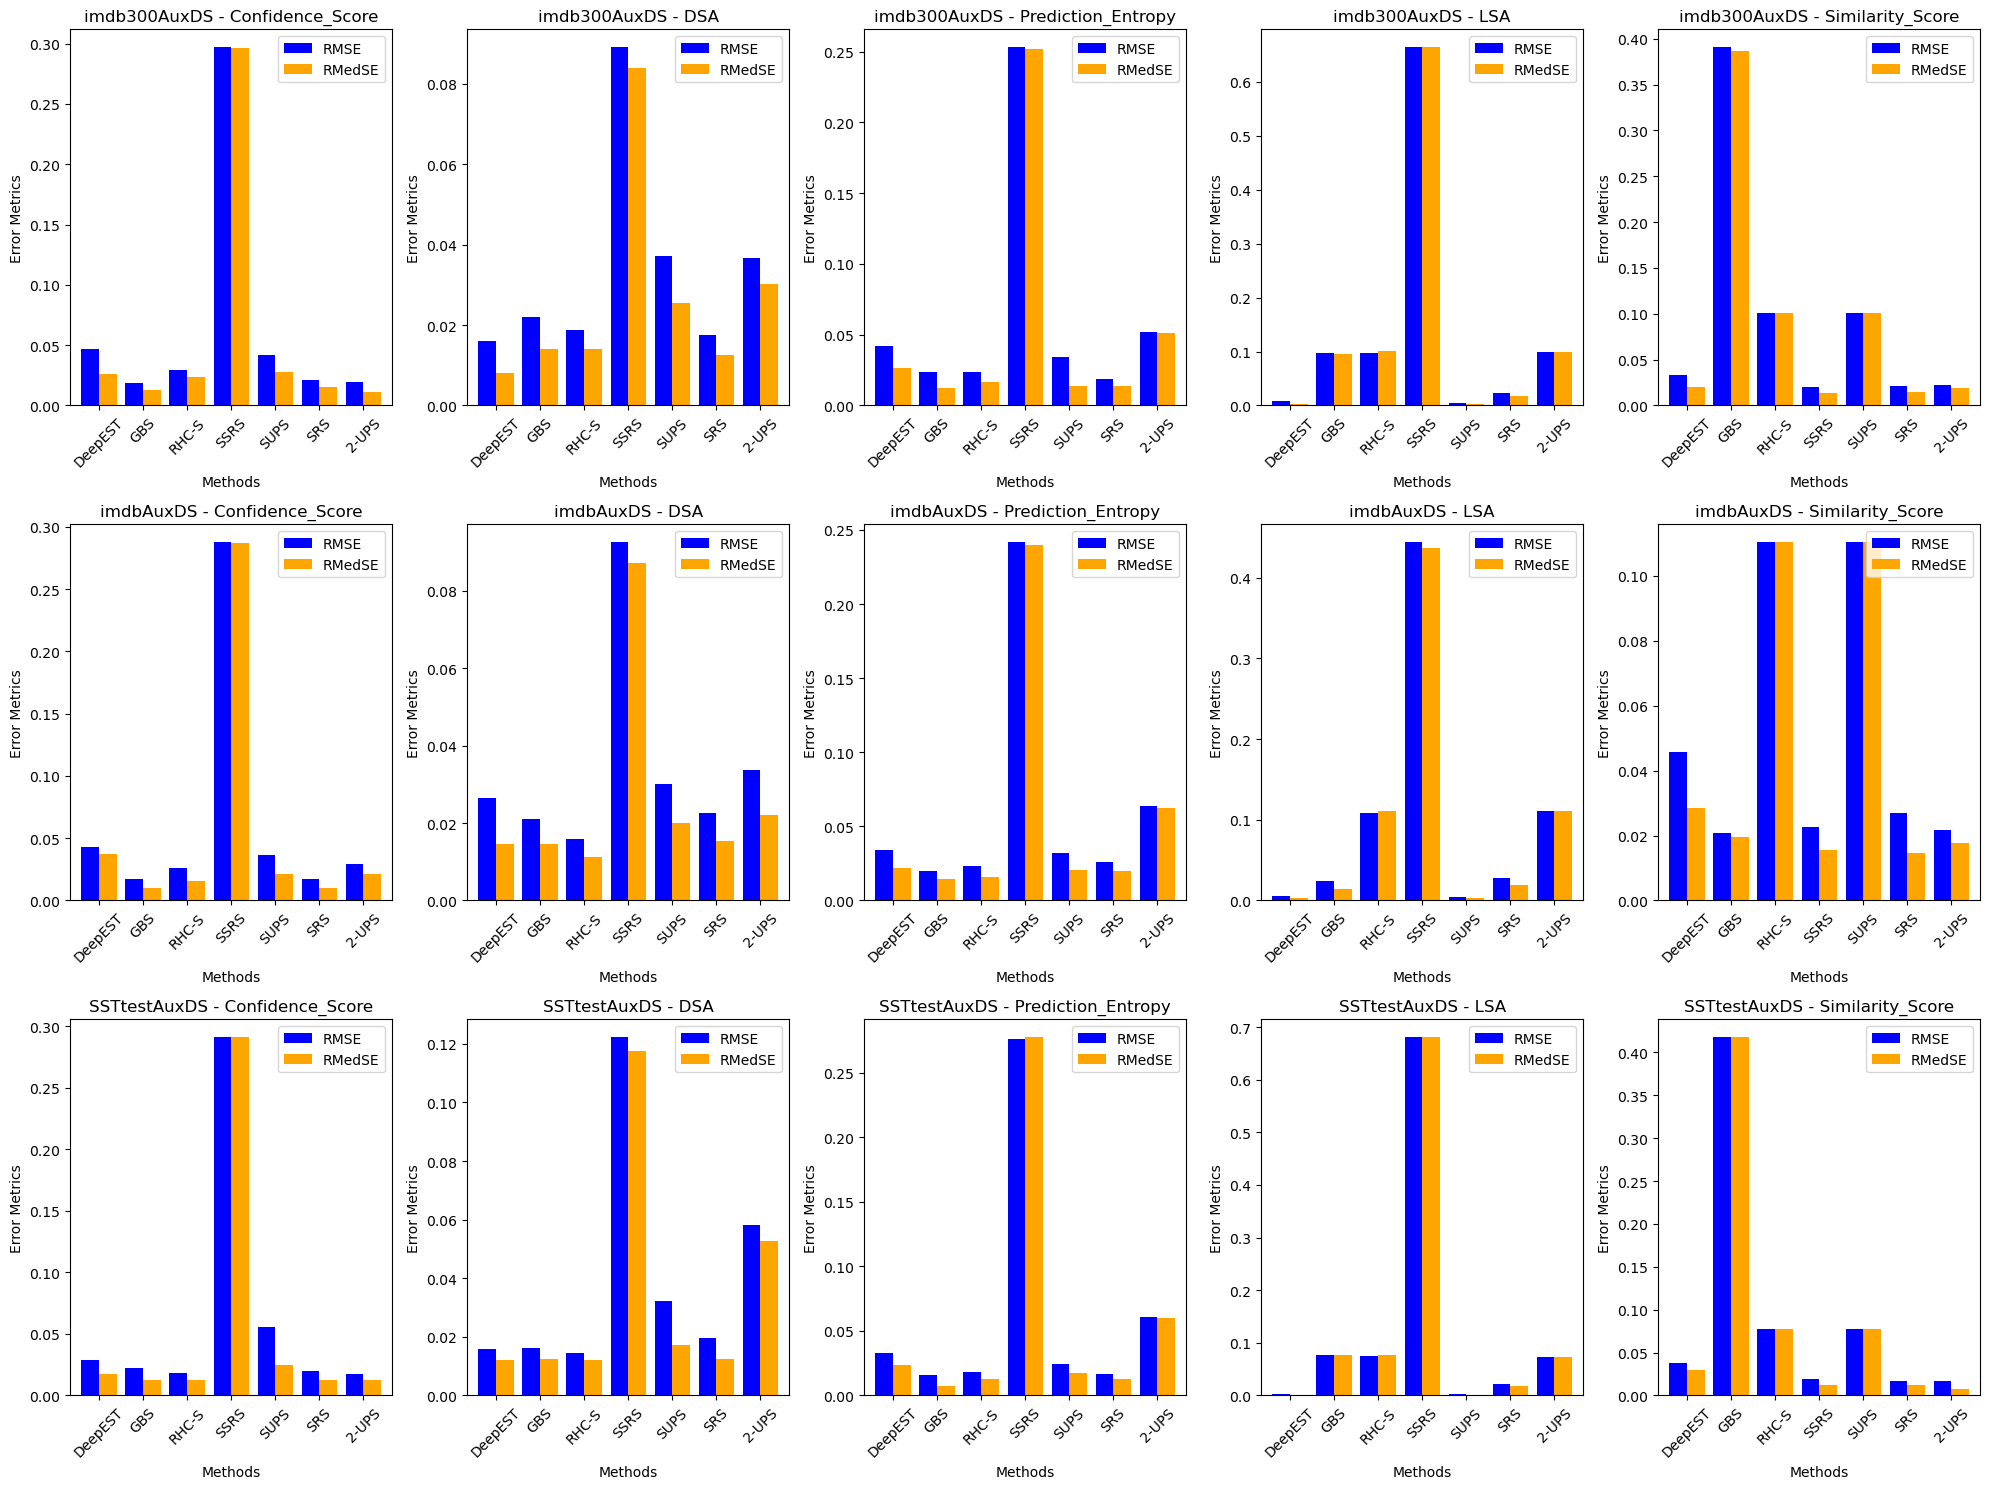

Dataset: imdb300AuxDS - Aux Var: Confidence_Score
Methods: ['DeepEST', 'GBS', 'RHC-S', 'SSRS', 'SUPS', 'SRS', '2-UPS']
RMSE: [0.0465674903761751, 0.0182117178395303, 0.0295950270521307, 0.2969750270084451, 0.0415964599078539, 0.020764553129472, 0.0198441626747505]
RMedSE: [0.0262210634752907, 0.0125896783120141, 0.023838450908687, 0.2965105394416866, 0.0278059261532158, 0.0150332963783729, 0.0108419880673924]

Dataset: imdb300AuxDS - Aux Var: DSA
Methods: ['DeepEST', 'GBS', 'RHC-S', 'SSRS', 'SUPS', 'SRS', '2-UPS']
RMSE: [0.016134613624183, 0.0220227155455452, 0.0188925678587488, 0.0891375341817351, 0.0373090755762381, 0.0174833253892578, 0.0366242631858306]
RMedSE: [0.0080572463685736, 0.014, 0.014094184761, 0.084, 0.0254058212952743, 0.0125896783120141, 0.0302146961350948]

Dataset: imdb300AuxDS - Aux Var: Prediction_Entropy
Methods: ['DeepEST', 'GBS', 'RHC-S', 'SSRS', 'SUPS', 'SRS', '2-UPS']
RMSE: [0.0417137370522091, 0.0237592087410334, 0.0234781809082186, 0.2530645503950853, 0.0341

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("DS4NLP_rsearch_results/combined_datasetsRQ123.csv")

# Filter the dataframe for the budget of 200
df_budget_200 = df[df['budget'] == 200]

# List of unique datasets and auxiliary variable combinations
datasets = df_budget_200['dataset'].unique()
aux_vars = df_budget_200['aux_var'].unique()

# Number of rows and columns for the subplots grid
num_rows = 3  # 3 rows
num_cols = 5  # 5 columns

# Create a figure for all subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))  # Adjust figsize if necessary

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Array to store the results
results_array = []

# Plot index
plot_idx = 0

# Create bar plots for each combination of dataset and auxiliary variable
for dataset in datasets:
    for aux_var in aux_vars:
        df_filtered = df_budget_200[(df_budget_200['dataset'] == dataset) & 
                                    (df_budget_200['aux_var'] == aux_var)]
        
        # Ensure there is data for this combination
        if not df_filtered.empty:
            # Collect data for the current plot
            plot_data = {
                'dataset': dataset,
                'aux_var': aux_var,
                'methods': df_filtered['method'].tolist(),
                'RMSE': df_filtered['RMSE'].tolist(),
                'RMedSE': df_filtered['RMedSE'].tolist()
            }
            results_array.append(plot_data)
            
            # Plotting
            ax = axes[plot_idx]
            df_filtered.plot(kind='bar', x='method', y=['RMSE', 'RMedSE'], 
                             color=['blue', 'orange'], width=0.8, ax=ax)
            
            # Add title and labels
            ax.set_title(f'{dataset} - {aux_var}')
            ax.set_xlabel('Methods')
            ax.set_ylabel('Error Metrics')
            ax.set_xticklabels(df_filtered['method'], rotation=45)
            ax.legend(['RMSE', 'RMedSE'])
            
            plot_idx += 1

# Adjust layout to prevent overlapping
plt.tight_layout()

# Save the full figure
plt.savefig('combined_plots_budget_200.png')
plt.show()

# Print the collected results
for result in results_array:
    print(f"Dataset: {result['dataset']} - Aux Var: {result['aux_var']}")
    print(f"Methods: {result['methods']}")
    print(f"RMSE: {result['RMSE']}")
    print(f"RMedSE: {result['RMedSE']}")
    print()

## RQ2

In [12]:
import pandas as pd

# Assuming you have already loaded your dataset into the dataframe `df`

df = pd.read_csv("DS4NLP_rsearch_results/combined_datasetsRQ123.csv")

# Filter the data for budget 200
df_budget_200 = df[df['budget'] == 200]

# Group by dataset, aux_var, and method to calculate mean and standard deviation
grouped_df = df_budget_200.groupby(['dataset', 'aux_var', 'method']).agg(
    mean_failures=('failures_mean', 'mean'),
    std_failures=('failures_std', 'mean')
).reset_index()

# Pivot the data to match the table format
pivot_df = grouped_df.pivot_table(index=['aux_var', 'method'], columns='dataset', values=['mean_failures', 'std_failures'])

# Flatten the multi-index columns
pivot_df.columns = [f'{col[1]} ({col[0]})' for col in pivot_df.columns]

# Display the final pivot table
pivot_df

SSTtestAuxDS (mean_failures)  \
aux_var            method                                  
Confidence_Score   2-UPS                       16.566667   
                   DeepEST                     35.900000   
                   GBS                         18.166667   
                   RHC-S                       13.333333   
                   SRS                         16.700000   
                   SSRS                        70.033333   
                   SUPS                        85.333333   
DSA                2-UPS                       24.600000   
                   DeepEST                     15.500000   
                   GBS                         14.700000   
                   RHC-S                       30.100000   
                   SRS                         14.533333   
                   SSRS                        39.600000   
                   SUPS                        10.233333   
LSA                2-UPS                        0.933333   
                   DeepEST                    141.000000   
                   GBS                          0.300000   
                   RHC-S                        0.333333   
                   SRS                         15.733333   
                   SSRS                       141.000000   
                   SUPS                       174.366667   
Prediction_Entropy 2-UPS                        3.466667   
                   DeepEST                     37.933333   
                   GBS                         15.433333   
                   RHC-S                       49.800000   
                   SRS                         16.133333   
                   SSRS                        70.700000   
                   SUPS                        70.200000   
Similarity_Score   2-UPS                       15.200000   
                   DeepEST                      3.700000   
                   GBS                         98.733333   
                   RHC-S                        0.000000   
                   SRS                         16.433333   
                   SSRS                        15.900000   
                   SUPS                         0.000000   

                            imdb300AuxDS (mean_failures)  \
aux_var            method                                  
Confidence_Score   2-UPS                       20.366667   
                   DeepEST                     72.233333   
                   GBS                         20.933333   
                   RHC-S                       16.500000   
                   SRS                         20.233333   
                   SSRS                        79.433333   
                   SUPS                        74.466667   
DSA                2-UPS                       23.133333   
                   DeepEST                     20.300000   
                   GBS                         20.266667   
                   RHC-S                       33.866667   
                   SRS                         20.533333   
                   SSRS                        37.633333   
                   SUPS                        12.100000   
LSA                2-UPS                        0.233333   
                   DeepEST                    161.533333   
                   GBS                          0.600000   
                   RHC-S                        0.566667   
                   SRS                         19.300000   
                   SSRS                       153.000000   
                   SUPS                       171.633333   
Prediction_Entropy 2-UPS                        9.866667   
                   DeepEST                     73.300000   
                   GBS                         21.233333   
                   RHC-S                       62.433333   
                   SRS                         20.500000   
                   SSRS                        70.600000   
                   SUPS                        67.933333   
Similar

Combined DataFrame:
     Auxiliary Variable SSTtestAuxDS (mean / std) imdb300AuxDS (mean / std)  \
0     Confidence_Score                16.6 / 3.3                20.4 / 3.9   
1     Confidence_Score                35.9 / 2.9                72.2 / 3.0   
2     Confidence_Score                18.2 / 3.6                20.9 / 3.6   
3     Confidence_Score                13.3 / 2.9                16.5 / 4.5   
4     Confidence_Score                16.7 / 3.9                20.2 / 4.2   
5     Confidence_Score                70.0 / 0.8                79.4 / 4.5   
6     Confidence_Score                85.3 / 8.4                74.5 / 6.6   
7                  DSA                24.6 / 6.7                23.1 / 6.5   
8                  DSA                15.5 / 3.2                20.3 / 3.3   
9                  DSA                14.7 / 3.2                20.3 / 4.5   
10                 DSA                30.1 / 4.7                33.9 / 5.7   
11                 DSA                14.5 

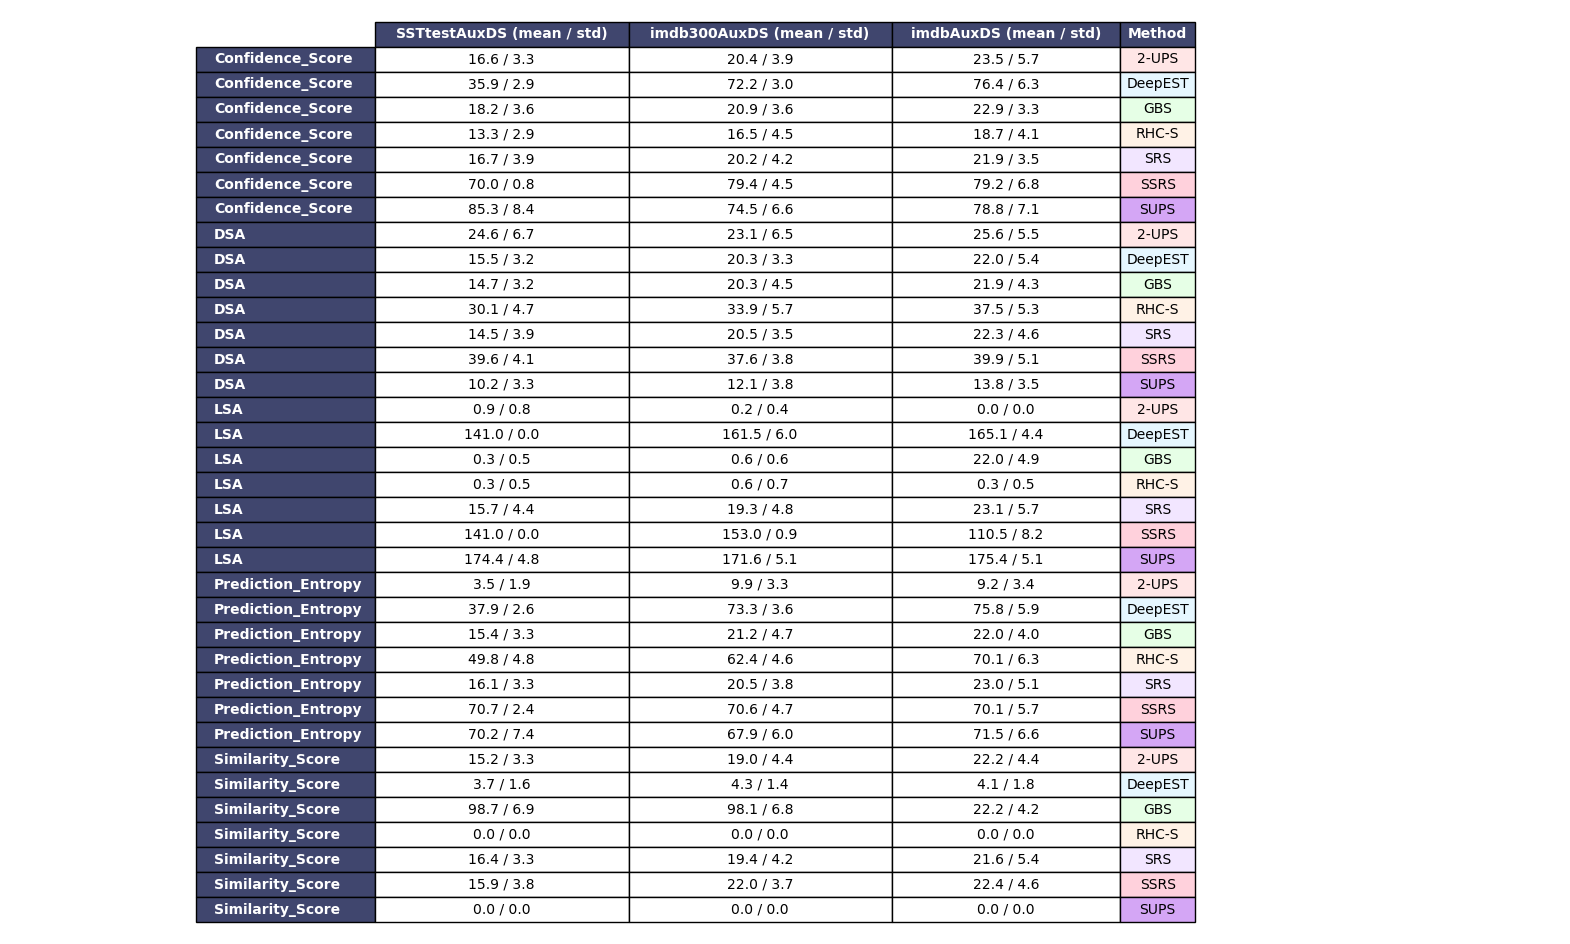

In [56]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have already loaded your dataset into the dataframe `df`
# Filter the data for budget 200
df_budget_200 = df[df['budget'] == 200]

# Group by dataset, aux_var, and method to calculate mean and standard deviation
grouped_df = df_budget_200.groupby(['dataset', 'aux_var', 'method']).agg(
    mean_failures=('failures_mean', 'mean'),
    std_failures=('failures_std', 'mean')
).reset_index()

# Pivot the data to match the table format
pivot_mean = grouped_df.pivot_table(index=['aux_var', 'method'], columns='dataset', values='mean_failures')
pivot_std = grouped_df.pivot_table(index=['aux_var', 'method'], columns='dataset', values='std_failures')

# Format numbers to one decimal place
pivot_mean = pivot_mean.round(1)
pivot_std = pivot_std.round(1)

# Combine mean and std into one cell in the format "mean / std"
combined_df = pivot_mean.astype(str) + " / " + pivot_std.astype(str)

# Modify column labels to indicate the combination of mean and std
combined_df.columns = [f'{col} (mean / std)' for col in combined_df.columns]

# Reset index to flatten the multi-index
combined_df = combined_df.reset_index()

# Ensure the 'Method' column is at the far right by reordering explicitly
cols = ['aux_var'] + [col for col in combined_df.columns if col not in ['aux_var', 'method']] + ['method']
combined_df = combined_df[cols]

# Rename 'aux_var' for clarity
combined_df.rename(columns={'aux_var': 'Auxiliary Variable', 'method': 'Method'}, inplace=True)

# Print the combined dataframe to check the final format
print("Combined DataFrame:\n", combined_df)

# Prepare the row labels
row_labels = combined_df['Auxiliary Variable'].values

# Prepare the table content without the 'Auxiliary Variable' column
table_content = combined_df.drop(['Auxiliary Variable'], axis=1).values

# Plotting the dataframe as an image with enhanced aesthetics
fig, ax = plt.subplots(figsize=(20, 12))  # Increased size for better clarity
ax.axis('tight')
ax.axis('off')

# Create a table plot with enhanced formatting
table = ax.table(cellText=table_content, 
                 colLabels=combined_df.columns[1:],  # Exclude the 'Auxiliary Variable' column
                 rowLabels=row_labels, 
                 cellLoc='center', 
                 loc='center')

# Enhance table appearance
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.5, 1.5)  # Scale up the table

# Adjust the width of the first column for aux_var names
table.auto_set_column_width(col=list(range(len(combined_df.columns) + 1)))  # Adjusts all columns, can be fine-tuned

# Apply different background colors for each aux_var group in the first column
aux_var_colors = ['#e6f2ff', '#e6ffe6', '#fff2e6', '#f9e6ff', '#ffe6e6']  # Define a set of background colors for aux_var
aux_var_color_index = 0

# Loop through each auxiliary variable to assign colors to the first column
for i in range(len(row_labels)):
    if i % 7 == 0:  # Every 7 rows corresponds to a new aux_var group
        aux_var_color_index = (aux_var_color_index + 1) % len(aux_var_colors)  # Cycle through the colors
    try:
        aux_var_cell = table[i + 1, -len(combined_df.columns)]  # Index for the "Auxiliary Variable" column
        aux_var_cell.set_facecolor(aux_var_colors[aux_var_color_index])
    except KeyError:
        # Skip if the cell doesn't exist
        continue

# Create a mapping from method to color
method_color_map = {}
method_colors = ['#ffe6e6', '#e6f7ff', '#e6ffe6', '#fff2e6', '#f2e6ff', '#ffd1dc', '#d4a6f5']  # More distinct colors

# Loop through each method to assign colors
for method in combined_df['Method'].unique():
    method_color_map[method] = method_colors[aux_var_color_index % len(method_colors)]
    aux_var_color_index += 1

# Print the method-color mapping dictionary
print("\nMethod-Color Mapping:\n", method_color_map)

# Apply the specific background color for the "Method" column based on the method value
for i in range(len(row_labels)):
    try:
        method_cell = table[i + 1, len(combined_df.columns) - 2]  # Index for the "Method" column
        method_value = combined_df.iloc[i]['Method']
        method_cell.set_facecolor(method_color_map[method_value])
    except KeyError:
        # Skip if the cell doesn't exist
        continue

# Ensure the aux_var names are visible and aligned without overlap
for (i, j), cell in table.get_celld().items():
    if j == -1:
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('#40466e')  # Dark header background
    elif i == 0:  # Ensure column headers are bold and visible
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('#40466e')

# Save the table as an image file
plt.savefig('pivot_table_with_colored_aux_var_and_method.png', bbox_inches='tight', dpi=300)

# Display the table
plt.show()

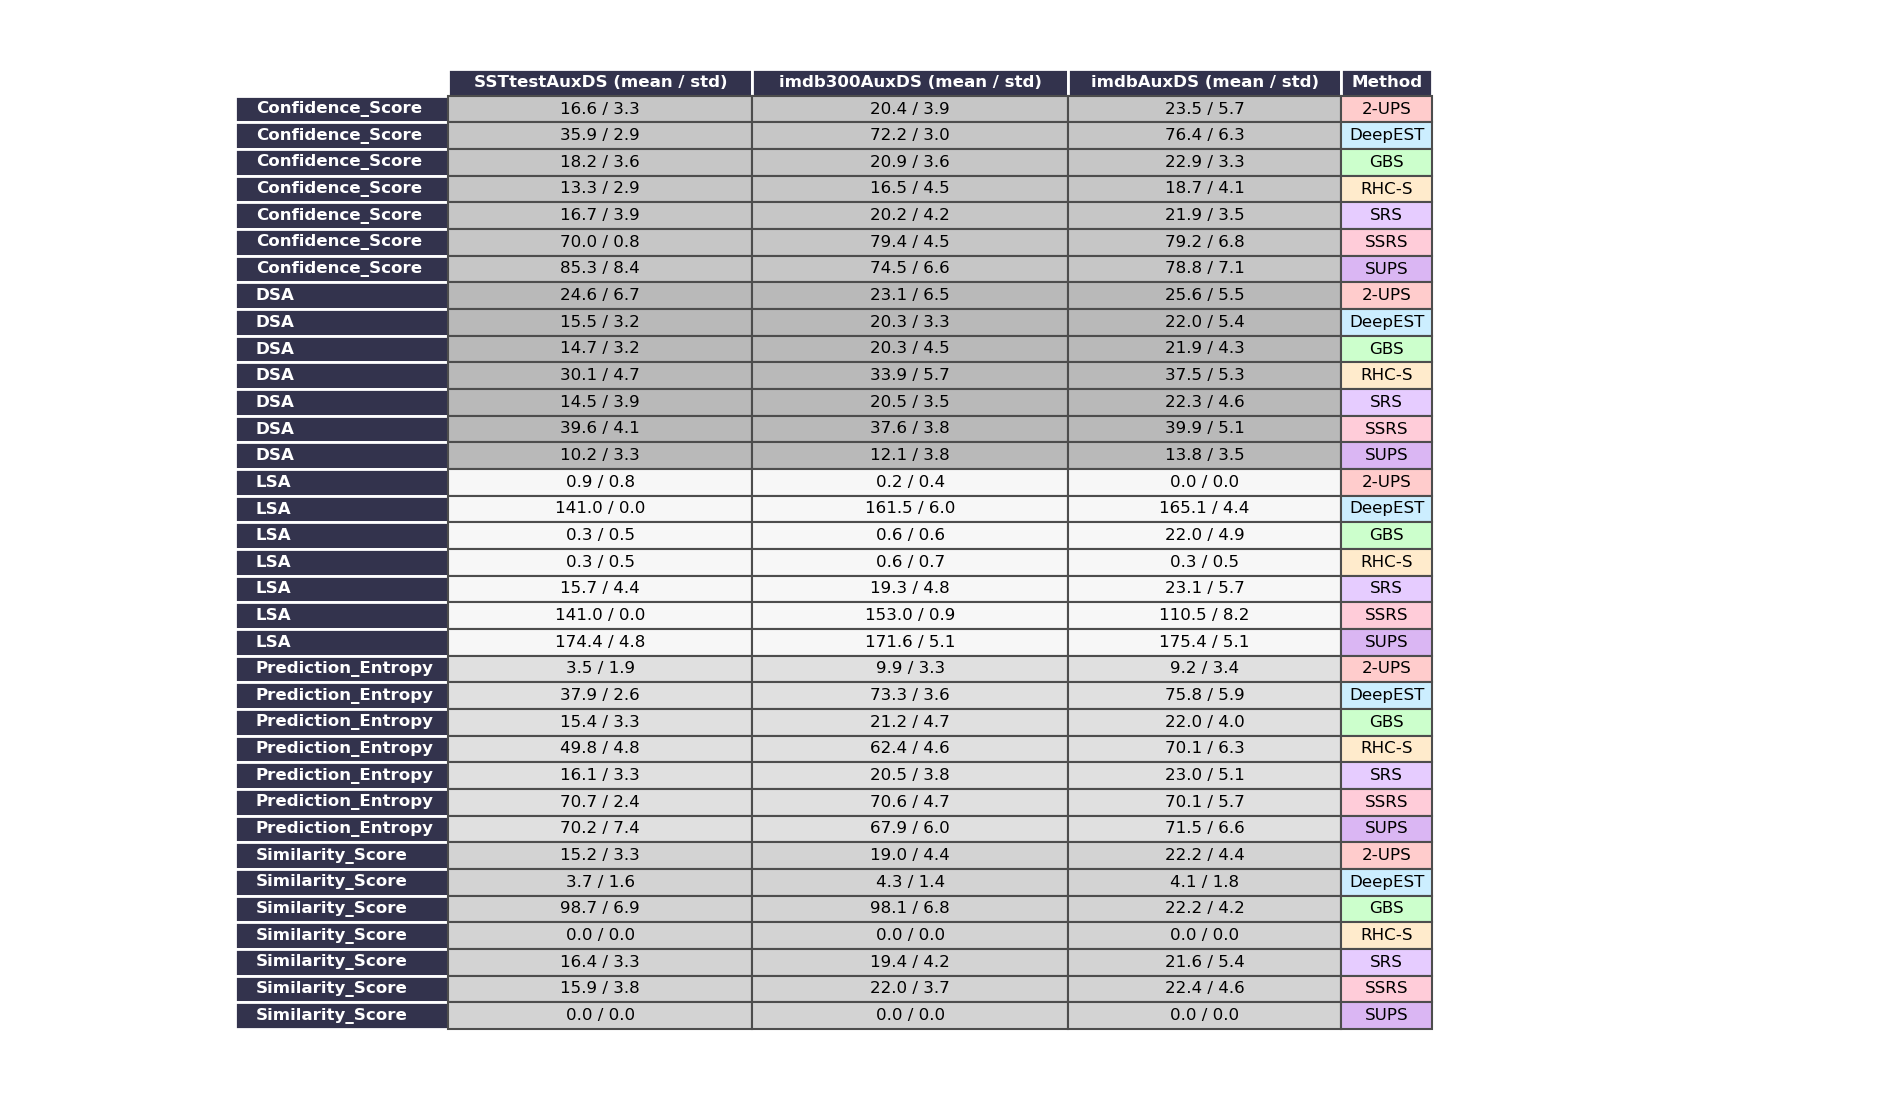

In [58]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have already loaded your dataset into the dataframe `df`
# Filter the data for budget 200
df_budget_200 = df[df['budget'] == 200]

# Group by dataset, aux_var, and method to calculate mean and standard deviation
grouped_df = df_budget_200.groupby(['dataset', 'aux_var', 'method']).agg(
    mean_failures=('failures_mean', 'mean'),
    std_failures=('failures_std', 'mean')
).reset_index()

# Pivot the data to match the table format
pivot_mean = grouped_df.pivot_table(index=['aux_var', 'method'], columns='dataset', values='mean_failures')
pivot_std = grouped_df.pivot_table(index=['aux_var', 'method'], columns='dataset', values='std_failures')

# Format numbers to one decimal place
pivot_mean = pivot_mean.round(1)
pivot_std = pivot_std.round(1)

# Combine mean and std into one cell in the format "mean / std"
combined_df = pivot_mean.astype(str) + " / " + pivot_std.astype(str)

# Modify column labels to indicate the combination of mean and std
combined_df.columns = [f'{col} (mean / std)' for col in combined_df.columns]

# Reset index to flatten the multi-index
combined_df = combined_df.reset_index()

# Ensure the 'Method' column is at the far right by reordering explicitly
cols = ['aux_var'] + [col for col in combined_df.columns if col not in ['aux_var', 'method']] + ['method']
combined_df = combined_df[cols]

# Rename 'aux_var' for clarity
combined_df.rename(columns={'aux_var': 'Auxiliary Variable', 'method': 'Method'}, inplace=True)

# Prepare the row labels
row_labels = combined_df['Auxiliary Variable'].values

# Prepare the table content without the 'Auxiliary Variable' column
table_content = combined_df.drop(['Auxiliary Variable'], axis=1).values

# Plotting the dataframe as an image with enhanced aesthetics
fig, ax = plt.subplots(figsize=(24, 14))  # Increased size for better clarity
ax.axis('tight')
ax.axis('off')

# Create a table plot with enhanced formatting
table = ax.table(cellText=table_content, 
                 colLabels=combined_df.columns[1:],  # Exclude the 'Auxiliary Variable' column
                 rowLabels=row_labels, 
                 cellLoc='center', 
                 loc='center')

# Enhance table appearance
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.6, 1.6)  # Scale up the table for larger figures

# Adjust the width of the first column for aux_var names
table.auto_set_column_width(col=list(range(len(combined_df.columns) + 1)))  # Adjusts all columns, can be fine-tuned

# Apply different background colors for each aux_var group
colors = ['#f7f7f7', '#e0e0e0', '#d3d3d3', '#c6c6c6', '#b9b9b9']  # Subtle grayscale colors
color_index = 0

# Create a mapping from method to color
method_color_map = {}
method_colors = ['#ffcccc', '#cceeff', '#ccffcc', '#ffebcc', '#e6ccff', '#ffccd9', '#dab6f3']  # Softer pastel colors

# Loop through each method to assign colors
for method in combined_df['Method'].unique():
    method_color_map[method] = method_colors[color_index % len(method_colors)]
    color_index += 1

# Loop through each cell in the table
for i in range(len(row_labels)):
    if i % 7 == 0:  # Every 7 rows corresponds to a new aux_var group
        color_index = (color_index + 1) % len(colors)  # Cycle through the colors
    for j in range(len(combined_df.columns) - 2):  # Include all columns except the last one (Method)
        try:
            cell = table[i + 1, j]  # Adjust indexing to start from the first column
            cell.set_facecolor(colors[color_index])
            cell.set_edgecolor('#4d4d4d')  # Set a consistent and darker border color
            cell.set_linewidth(1.5)  # Thicker borders for better separation
        except KeyError:
            # Skip if the cell doesn't exist
            continue

# Apply the specific background color for the "Method" column based on the method value
for i in range(len(row_labels)):
    try:
        method_cell = table[i + 1, len(combined_df.columns) - 2]  # Index for the "Method" column
        method_value = combined_df.iloc[i]['Method']
        method_cell.set_facecolor(method_color_map[method_value])
        method_cell.set_edgecolor('#4d4d4d')  # Consistent border styling
        method_cell.set_linewidth(1.5)  # Thicker borders for better separation
    except KeyError:
        # Skip if the cell doesn't exist
        continue

# Ensure the aux_var names are visible and aligned without overlap
for (i, j), cell in table.get_celld().items():
    if j == -1:
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('#33334d')  # Darker header background for stronger contrast
        cell.set_edgecolor('#ffffff')  # White border to make it stand out
        cell.set_linewidth(2)  # Thicker header borders
    elif i == 0:  # Ensure column headers are bold and visible
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('#33334d')
        cell.set_edgecolor('#ffffff')
        cell.set_linewidth(2)  # Thicker header borders

# Save the table as an image file
plt.savefig('pivot_table_with_academic_styling_and_better_borders.png', bbox_inches='tight', dpi=300)

# Display the table
plt.show()

## RQ3

In [ ]:
import os
import pandas as pd
import numpy as np

# Define the base path, methods, and budget levels
base_path = "DS4NLP_results"
methods = ["DeepEST", "GBS", "RHC-S", "SSRS", "SUPS", 'SRS', '2-UPS']
budgets = [50, 100, 200, 400, 800]

# True accuracies for each dataset
true_accuracies = {
    "imdb300AuxDS": 0.8990,
    "imdbAuxDS": 0.8896,
    "SSTtestAuxDS": 0.9225700164744646
}

# Mapping of aux variable names to standard names
aux_var_mapping = {
    "confidence": "Confidence_Score",
    "Confidence_Score": "Confidence_Score",
    "entropy": "Prediction_Entropy",
    "prediction": "Prediction_Entropy",
    "Prediction_Entropy": "Prediction_Entropy",
    "similarity": "Similarity_Score",
    "Similarity_Score": "Similarity_Score",
    "dsa": "DSA",
    "DSA": "DSA",
    "lsa": "LSA",
    "LSA": "LSA"
}

# Function to calculate RMSE and RMedSE
def calculate_rmse_rmedse(accuracies, true_accuracy):
    squared_errors = (accuracies - true_accuracy) ** 2
    rmse = np.sqrt(np.mean(squared_errors))
    rmedse = np.sqrt(np.median(squared_errors))
    return rmse, rmedse

# Iterate over each budget
for budget in budgets:
    results = []

    # Process each method and dataset
    for method in methods:
        for file_name in datasets[method]:
            dataset = file_name.split('_')[0]

            if dataset not in true_accuracies:
                continue

            file_path = os.path.join(base_path, method, file_name)

            if not os.path.exists(file_path):
                print(f"File not found: {file_path}")
                continue

            try:
                data = pd.read_csv(file_path)
                data = data[data['budget'] == budget]
                if data.empty:
                    print(f"No records with budget {budget} in {file_name}")
                    continue

                accuracies = data['accuracy'].values
                rmse, rmedse = calculate_rmse_rmedse(accuracies, true_accuracies[dataset])
                failures_mean = data['failures'].mean()
                failures_std = data['failures'].std()

                results.append({
                    "method": method,
                    "dataset": dataset,
                    "aux_var": aux_var_mapping.get(file_name.split('_')[1].split('.')[0].lower(), "Unknown Variable"),
                    "RMSE": rmse,
                    "RMedSE": rmedse,
                    "failures_mean": failures_mean,
                    "failures_std": failures_std
                })

            except Exception as e:
                print(f"Error processing {file_path}: {e}")

    # Convert results to DataFrame and display
    results_df = pd.DataFrame(results)
    print(f"Results for budget {budget}:")
    print(results_df)

    # Save the results to a CSV file for each budget
    results_df.to_csv(f"rmse_rmedse_failures{budget}.csv", index=False)

In [14]:
import pandas as pd

# Define the base path and budgets
base_path = "./"  # Update this to the location of your datasets
budgets = [50, 100, 200, 400, 800]
file_names = [f"rmse_rmedse_failures{budget}.csv" for budget in budgets]

all_data = []

# Load each dataset and add the 'budget' column
for file_name, budget in zip(file_names, budgets):
    file_path = f"{base_path}/{file_name}"
    df = pd.read_csv(file_path)
    df['budget'] = budget
    all_data.append(df)

# Concatenate all datasets into a single DataFrame
combined_df = pd.concat(all_data, ignore_index=True)

# Now you can work with the combined DataFrame
print(combined_df.head())  # To check the top rows of the combined DataFrame
# Optionally save the combined DataFrame to a CSV file
combined_df.to_csv(f"{base_path}/combined_datasetsRQ123.csv", index=False)

    method       dataset             aux_var      RMSE    RMedSE  \
0  DeepEST  imdb300AuxDS    Confidence_Score  0.082051  0.077985   
1  DeepEST  imdb300AuxDS                 DSA  0.048502  0.039416   
2  DeepEST  imdb300AuxDS  Prediction_Entropy  0.089145  0.068531   
3  DeepEST  imdb300AuxDS                 LSA  0.010321  0.004452   
4  DeepEST  imdb300AuxDS    Similarity_Score  0.103185  0.098213   

   failures_mean  failures_std  budget  
0      17.166667      2.742807      50  
1       5.300000      2.451600      50  
2      18.433333      2.955805      50  
3      41.066667      2.851900      50  
4       1.266667      1.014833      50  


In [66]:
import pandas as pd

# Assuming you have a DataFrame `df` with columns: ['dataset', 'method', 'aux_var', 'budget', 'RMSE']

# Calculate mean(min), mean(max), and F800/50
summary_df = df.groupby(['dataset', 'method', 'aux_var']).agg(
    mean_min_rmse=('RMSE', lambda x: x.min()),
    mean_max_rmse=('RMSE', lambda x: x.max())
).reset_index()

# Calculate the F800/50 ratio
f800 = df[df['budget'] == 800].set_index(['dataset', 'method', 'aux_var'])['RMSE']
f50 = df[df['budget'] == 50].set_index(['dataset', 'method', 'aux_var'])['RMSE']
f800_50_ratio = (f800 / f50).reset_index()
f800_50_ratio.columns = ['dataset', 'method', 'aux_var', 'F800_50']

# Merge the data into a final table
final_table = summary_df.merge(f800_50_ratio, on=['dataset', 'method', 'aux_var'])

# Rename columns for clarity
final_table.rename(columns={
    'mean_min_rmse': 'Mean(min)',
    'mean_max_rmse': 'Mean(max)',
    'F800_50': 'F800/50'
}, inplace=True)

# Reorder columns for better readability
final_table = final_table[['dataset', 'method', 'aux_var', 'Mean(min)', 'F800/50', 'Mean(max)']]

# Now you can display or save the final table
print("Final Table:")
print(final_table)

# Save the table to a CSV file if needed
final_table.to_csv('rmse_sensitivity_analysis.csv', index=False)

Final Table:
          dataset method             aux_var  Mean(min)   F800/50  Mean(max)
0    SSTtestAuxDS  2-UPS    Confidence_Score   0.013013  0.305867   0.042546
1    SSTtestAuxDS  2-UPS                 DSA   0.047328  0.532161   0.088936
2    SSTtestAuxDS  2-UPS                 LSA   0.071564  0.958661   0.074649
3    SSTtestAuxDS  2-UPS  Prediction_Entropy   0.057237  0.925499   0.062857
4    SSTtestAuxDS  2-UPS    Similarity_Score   0.010627  0.244838   0.043404
..            ...    ...                 ...        ...       ...        ...
100     imdbAuxDS   SUPS    Confidence_Score   0.024272  0.402657   0.091489
101     imdbAuxDS   SUPS                 DSA   0.018237  0.296218   0.061567
102     imdbAuxDS   SUPS                 LSA   0.001732  0.232658   0.007444
103     imdbAuxDS   SUPS  Prediction_Entropy   0.013197  0.296674   0.044483
104     imdbAuxDS   SUPS    Similarity_Score   0.110400  1.000000   0.110400

[105 rows x 6 columns]


In [83]:
# RMSE

import pandas as pd

# Assuming you have the metrics calculated in a DataFrame `metrics_df` 
# with columns ['dataset', 'method', 'aux_var', 'min_rmse', 'F800/50', 'max_rmse']

# Step 1: Pivot the data to get the metrics for each auxiliary variable
pivot_min = metrics_df.pivot_table(index=['dataset', 'method'], 
                                   columns='aux_var', 
                                   values='min_rmse').reset_index()

pivot_ratio = metrics_df.pivot_table(index=['dataset', 'method'], 
                                     columns='aux_var', 
                                     values='F800/50').reset_index()

pivot_max = metrics_df.pivot_table(index=['dataset', 'method'], 
                                   columns='aux_var', 
                                   values='max_rmse').reset_index()

# Flatten the multi-level column index and prepare combined columns
pivot_min.columns = [f'{col}_min' if col not in ['dataset', 'method'] else col for col in pivot_min.columns]
pivot_ratio.columns = [f'{col}_F800/50' if col not in ['dataset', 'method'] else col for col in pivot_ratio.columns]
pivot_max.columns = [f'{col}_max' if col not in ['dataset', 'method'] else col for col in pivot_max.columns]

# Step 2: Combine the auxiliary variables into a single string per column
for aux_var in ['Confidence_Score', 'DSA', 'LSA', 'Prediction_Entropy', 'Similarity_Score']:
    pivot_min[aux_var] = pivot_min.apply(lambda x: 
                                         f"{round(x[f'{aux_var}_min'], 3)}",
                                         axis=1)
    pivot_ratio[aux_var] = pivot_ratio.apply(lambda x: 
                                             f"{round(x[f'{aux_var}_F800/50'], 3)}",
                                             axis=1)
    pivot_max[aux_var] = pivot_max.apply(lambda x: 
                                         f"{round(x[f'{aux_var}_max'], 3)}",
                                         axis=1)

# Step 3: Combine all auxiliary variables into a single string per row per metric
pivot_min['Combined_min'] = pivot_min.apply(lambda x: 
                                            f"{x['Confidence_Score']} / {x['DSA']} / {x['LSA']} / {x['Prediction_Entropy']} / {x['Similarity_Score']}",
                                            axis=1)

pivot_ratio['Combined_F800/50'] = pivot_ratio.apply(lambda x: 
                                                    f"{x['Confidence_Score']} / {x['DSA']} / {x['LSA']} / {x['Prediction_Entropy']} / {x['Similarity_Score']}",
                                                    axis=1)

pivot_max['Combined_max'] = pivot_max.apply(lambda x: 
                                            f"{x['Confidence_Score']} / {x['DSA']} / {x['LSA']} / {x['Prediction_Entropy']} / {x['Similarity_Score']}",
                                            axis=1)

# Step 4: Merge the combined columns into a final DataFrame
final_df = pivot_min[['dataset', 'method', 'Combined_min']]
final_df = final_df.merge(pivot_ratio[['dataset', 'method', 'Combined_F800/50']], on=['dataset', 'method'])
final_df = final_df.merge(pivot_max[['dataset', 'method', 'Combined_max']], on=['dataset', 'method'])

# Rename the columns for clarity
final_df.columns = ['Dataset', 'Method', 'Mean(min)', 'F800/50', 'Mean(max)']

# Print the final table
print("Final Combined Table:")


# Optional: Save the table to a CSV file
final_df.to_csv('rmse_sensitivity_analysis_combined.csv', index=False)

Final Combined Table:


In [84]:
final_df

Dataset   Method                              Mean(min)  \
0   SSTtestAuxDS    2-UPS  0.013 / 0.047 / 0.072 / 0.057 / 0.011   
1   SSTtestAuxDS  DeepEST   0.008 / 0.006 / 0.001 / 0.007 / 0.02   
2   SSTtestAuxDS      GBS  0.008 / 0.006 / 0.075 / 0.007 / 0.099   
3   SSTtestAuxDS    RHC-S  0.011 / 0.005 / 0.072 / 0.008 / 0.077   
4   SSTtestAuxDS      SRS   0.009 / 0.009 / 0.009 / 0.01 / 0.009   
5   SSTtestAuxDS     SSRS  0.263 / 0.081 / 0.607 / 0.217 / 0.007   
6   SSTtestAuxDS     SUPS  0.032 / 0.017 / 0.001 / 0.015 / 0.077   
7   imdb300AuxDS    2-UPS  0.013 / 0.028 / 0.098 / 0.051 / 0.007   
8   imdb300AuxDS  DeepEST   0.012 / 0.009 / 0.003 / 0.014 / 0.02   
9   imdb300AuxDS      GBS   0.011 / 0.011 / 0.096 / 0.01 / 0.278   
10  imdb300AuxDS    RHC-S  0.014 / 0.006 / 0.097 / 0.008 / 0.101   
11  imdb300AuxDS      SRS    0.01 / 0.01 / 0.012 / 0.008 / 0.011   
12  imdb300AuxDS     SSRS  0.265 / 0.086 / 0.495 / 0.215 / 0.009   
13  imdb300AuxDS     SUPS  0.032 / 0.022 / 0.002 / 0.014 / 0.101   
14     imdbAuxDS    2-UPS    0.011 / 0.032 / 0.11 / 0.059 / 0.01   
15     imdbAuxDS  DeepEST   0.018 / 0.01 / 0.005 / 0.024 / 0.015   
16     imdbAuxDS      GBS    0.01 / 0.012 / 0.011 / 0.01 / 0.011   
17     imdbAuxDS    RHC-S   0.022 / 0.007 / 0.108 / 0.019 / 0.11   
18     imdbAuxDS      SRS   0.013 / 0.009 / 0.01 / 0.011 / 0.011   
19     imdbAuxDS     SSRS   0.28 / 0.093 / 0.437 / 0.242 / 0.011   
20     imdbAuxDS     SUPS   0.024 / 0.018 / 0.002 / 0.013 / 0.11   

                                  F800/50  \
0   0.306 / 0.532 / 0.959 / 0.925 / 0.245   
1   0.104 / 0.183 / 0.079 / 0.094 / 0.284   
2    0.178 / 0.159 / 1.01 / 0.181 / 0.231   
3      0.284 / 0.18 / 0.949 / 0.209 / 1.0   
4   0.217 / 0.238 / 0.242 / 0.272 / 0.201   
5    0.954 / 0.556 / 0.874 / 0.75 / 0.173   
6     0.721 / 0.121 / 0.318 / 0.411 / 1.0   
7    0.292 / 0.48 / 0.989 / 0.886 / 0.151   
8    0.15 / 0.184 / 0.273 / 0.161 / 0.194   
9   0.312 / 0.281 / 0.969 / 0.225 / 0.689   
10    0.292 / 0.201 / 0.995 / 0.173 / 1.0   
11  0.239 / 0.232 / 0.279 / 0.188 / 0.238   
12    0.889 / 0.65 / 0.71 / 0.853 / 0.219   
13     0.445 / 0.373 / 0.259 / 0.27 / 1.0   
14     0.234 / 0.49 / 1.0 / 0.857 / 0.254   
15   0.199 / 0.21 / 0.673 / 0.261 / 0.139   
16  0.323 / 0.224 / 0.212 / 0.206 / 0.249   
17    0.569 / 0.156 / 0.992 / 0.359 / 1.0   
18  0.318 / 0.193 / 0.182 / 0.271 / 0.234   
19    0.9 / 0.734 / 0.961 / 0.966 / 0.201   
20    0.403 / 0.296 / 0.233 / 0.297 / 1.0   

                                Mean(max)  
0   0.043 / 0.089 / 0.075 / 0.063 / 0.043  
1   0.079 / 0.034 / 0.007 / 0.079 / 0.071  
2   0.046 / 0.039 / 0.076 / 0.038 / 0.433  
3      0.04 / 0.03 / 0.076 / 0.04 / 0.077  
4   0.039 / 0.038 / 0.037 / 0.038 / 0.044  
5    0.304 / 0.146 / 0.695 / 0.289 / 0.04  
6   0.059 / 0.141 / 0.004 / 0.036 / 0.077  
7     0.045 / 0.059 / 0.1 / 0.062 / 0.044  
8    0.082 / 0.049 / 0.01 / 0.089 / 0.103  
9     0.042 / 0.038 / 0.1 / 0.043 / 0.413  
10    0.048 / 0.031 / 0.1 / 0.058 / 0.101  
11  0.042 / 0.041 / 0.044 / 0.042 / 0.047  
12  0.297 / 0.132 / 0.698 / 0.256 / 0.043  
13   0.071 / 0.059 / 0.008 / 0.05 / 0.101  
14    0.046 / 0.07 / 0.11 / 0.072 / 0.039  
15  0.091 / 0.048 / 0.009 / 0.091 / 0.111  
16    0.03 / 0.052 / 0.05 / 0.051 / 0.045  
17   0.055 / 0.047 / 0.109 / 0.052 / 0.11  
18  0.041 / 0.049 / 0.055 / 0.042 / 0.048  
19  0.311 / 0.129 / 0.455 / 0.263 / 0.054  
20   0.091 / 0.062 / 0.007 / 0.044 / 0.11

In [87]:
# faillure

import pandas as pd

# Assuming `df` is your original DataFrame with columns: ['dataset', 'method', 'aux_var', 'budget', 'failures_mean']

# Step 1: Calculate min_failures, max_failures, and F800/50
metrics_df = df.groupby(['dataset', 'method', 'aux_var']).agg(
    min_failures=('failures_mean', 'min'),
    max_failures=('failures_mean', 'max'),
    failures_50=('failures_mean', lambda x: x[df['budget'] == 50].mean()),
    failures_800=('failures_mean', lambda x: x[df['budget'] == 800].mean())
).reset_index()

# Step 2: Calculate the F800/50 ratio
metrics_df['F800/50'] = metrics_df['failures_800'] / metrics_df['failures_50']

In [130]:
import pandas as pd
import numpy as np

# Assuming `df` is your original DataFrame with columns: ['dataset', 'method', 'aux_var', 'budget', 'failures_mean']

# Step 1: Clean the DataFrame and handle missing/infinite values
df['failures_mean'] = pd.to_numeric(df['failures_mean'], errors='coerce')
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(0, inplace=True)  # You can choose to fill NaN with 0 or another value

# Step 2: Calculate min_failures, max_failures, and F800/50
metrics_df = df.groupby(['dataset', 'method', 'aux_var']).agg(
    min_failures=('failures_mean', 'min'),
    max_failures=('failures_mean', 'max'),
    failures_50=('failures_mean', lambda x: x[df['budget'] == 50].mean()),
    failures_800=('failures_mean', lambda x: x[df['budget'] == 800].mean())
).reset_index()

metrics_df['F800/50'] = metrics_df['failures_800'] / metrics_df['failures_50']
metrics_df['F800/50'].replace([np.inf, -np.inf], np.nan, inplace=True)  # Handle division by zero
metrics_df.fillna(0, inplace=True)  # Replace NaNs with 0 or another appropriate value

# Step 3: Pivot the data to get the metrics for each auxiliary variable
pivot_min = metrics_df.pivot_table(index=['dataset', 'method'], 
                                   columns='aux_var', 
                                   values='min_failures').reset_index()

pivot_ratio = metrics_df.pivot_table(index=['dataset', 'method'], 
                                     columns='aux_var', 
                                     values='F800/50').reset_index()

pivot_max = metrics_df.pivot_table(index=['dataset', 'method'], 
                                   columns='aux_var', 
                                   values='max_failures').reset_index()

# Step 4: Flatten the multi-level column index and prepare combined columns
pivot_min.columns = [f'{col}_min' if col not in ['dataset', 'method'] else col for col in pivot_min.columns]
pivot_ratio.columns = [f'{col}_F800/50' if col not in ['dataset', 'method'] else col for col in pivot_ratio.columns]
pivot_max.columns = [f'{col}_max' if col not in ['dataset', 'method'] else col for col in pivot_max.columns]

# Combine the auxiliary variables into a single string per column
for aux_var in ['Confidence_Score', 'DSA', 'LSA', 'Prediction_Entropy', 'Similarity_Score']:
    pivot_min[aux_var] = pivot_min.apply(lambda x: 
                                         f"{x[f'{aux_var}_min']:.2f}",
                                         axis=1)
    pivot_ratio[aux_var] = pivot_ratio.apply(lambda x: 
                                             f"{x[f'{aux_var}_F800/50']:.2f}",
                                             axis=1)
    pivot_max[aux_var] = pivot_max.apply(lambda x: 
                                         f"{x[f'{aux_var}_max']:.2f}",
                                         axis=1)

# Step 5: Combine all auxiliary variables into a single string per row per metric
pivot_min['Combined_min'] = pivot_min.apply(lambda x: 
                                            f"{x['Confidence_Score']} / {x['DSA']} / {x['LSA']} / {x['Prediction_Entropy']} / {x['Similarity_Score']}",
                                            axis=1)

pivot_ratio['Combined_F800/50'] = pivot_ratio.apply(lambda x: 
                                                    f"{x['Confidence_Score']} / {x['DSA']} / {x['LSA']} / {x['Prediction_Entropy']} / {x['Similarity_Score']}",
                                                    axis=1)

pivot_max['Combined_max'] = pivot_max.apply(lambda x: 
                                            f"{x['Confidence_Score']} / {x['DSA']} / {x['LSA']} / {x['Prediction_Entropy']} / {x['Similarity_Score']}",
                                            axis=1)

# Step 6: Merge the combined columns into a final DataFrame
final_df = pivot_min[['dataset', 'method', 'Combined_min']]
final_df = final_df.merge(pivot_ratio[['dataset', 'method', 'Combined_F800/50']], on=['dataset', 'method'])
final_df = final_df.merge(pivot_max[['dataset', 'method', 'Combined_max']], on=['dataset', 'method'])

# Step 7: Rename the columns for clarity
final_df.columns = ['Dataset', 'Method', 'Mean(min)', 'F800/50', 'Mean(max)']

# Step 8: Print the final table
print("Final Combined Table:")

# Optional: Save the table to a CSV file
final_df.to_csv('failure_sensitivity_analysis_combined.csv', index=False)

Final Combined Table:


In [131]:
final_df

Dataset   Method                             Mean(min)  \
0   SSTtestAuxDS    2-UPS      3.90 / 6.37 / 0.17 / 0.93 / 4.23   
1   SSTtestAuxDS  DeepEST   22.50 / 3.53 / 39.60 / 20.93 / 0.57   
2   SSTtestAuxDS      GBS     4.63 / 3.77 / 0.13 / 3.50 / 24.73   
3   SSTtestAuxDS    RHC-S     2.63 / 8.10 / 0.07 / 16.47 / 0.00   
4   SSTtestAuxDS      SRS      3.87 / 3.90 / 3.60 / 4.40 / 4.10   
5   SSTtestAuxDS     SSRS  17.37 / 10.77 / 38.50 / 18.10 / 4.30   
6   SSTtestAuxDS     SUPS   21.87 / 2.33 / 43.73 / 17.27 / 0.00   
7   imdb300AuxDS    2-UPS      4.57 / 5.10 / 0.00 / 1.93 / 5.00   
8   imdb300AuxDS  DeepEST   17.17 / 5.30 / 41.07 / 18.43 / 1.27   
9   imdb300AuxDS      GBS     5.00 / 5.10 / 0.07 / 5.30 / 24.97   
10  imdb300AuxDS    RHC-S     4.33 / 8.67 / 0.07 / 15.57 / 0.00   
11  imdb300AuxDS      SRS      4.93 / 5.13 / 5.50 / 5.10 / 5.10   
12  imdb300AuxDS     SSRS  19.63 / 11.03 / 39.93 / 17.27 / 5.67   
13  imdb300AuxDS     SUPS   18.70 / 3.27 / 43.83 / 16.00 / 0.00   
14     imdbAuxDS    2-UPS      5.60 / 6.53 / 0.00 / 2.57 / 6.00   
15     imdbAuxDS  DeepEST   17.80 / 5.87 / 41.10 / 17.80 / 1.27   
16     imdbAuxDS      GBS      5.47 / 5.03 / 5.40 / 5.93 / 5.23   
17     imdbAuxDS    RHC-S     4.43 / 9.90 / 0.07 / 17.70 / 0.00   
18     imdbAuxDS      SRS      5.60 / 5.30 / 5.77 / 5.43 / 5.20   
19     imdbAuxDS     SSRS  20.83 / 11.43 / 28.10 / 18.23 / 5.40   
20     imdbAuxDS     SUPS   20.50 / 3.23 / 43.90 / 17.60 / 0.00   

                                  F800/50  \
0   17.52 / 15.24 / 28.40 / 17.54 / 14.66   
1      3.32 / 17.72 / 3.56 / 3.67 / 27.12   
2     14.16 / 16.27 / 9.75 / 17.55 / 5.70   
3     20.84 / 11.51 / 66.00 / 6.39 / 0.00   
4   15.41 / 15.37 / 17.39 / 14.50 / 14.74   
5       4.29 / 9.74 / 3.66 / 4.66 / 14.29   
6    16.03 / 14.86 / 15.99 / 16.54 / 0.00   
7    18.52 / 19.59 / 0.00 / 18.97 / 16.15   
8      7.18 / 15.35 / 7.24 / 7.32 / 14.71   
9   16.73 / 15.64 / 51.50 / 14.82 / 12.14   
10   16.56 / 14.12 / 30.00 / 10.70 / 0.00   
11  16.58 / 15.77 / 14.60 / 15.88 / 15.73   
12     7.09 / 13.50 / 7.54 / 9.48 / 14.32   
13   15.89 / 15.38 / 15.64 / 16.49 / 0.00   
14   16.25 / 16.85 / 0.00 / 15.31 / 14.66   
15  17.15 / 15.19 / 15.99 / 17.02 / 14.16   
16  15.84 / 17.95 / 15.87 / 14.84 / 16.27   
17   16.67 / 15.30 / 24.50 / 15.79 / 0.00   
18  15.29 / 16.65 / 15.63 / 15.82 / 17.23   
19  14.96 / 14.26 / 15.58 / 15.88 / 17.15   
20   15.60 / 17.57 / 15.84 / 16.13 / 0.00   

                                    Mean(max)  
0        68.33 / 97.03 / 4.73 / 16.37 / 62.07  
1      74.67 / 62.60 / 141.00 / 76.83 / 15.37  
2       65.60 / 61.30 / 1.30 / 61.43 / 141.00  
3        54.87 / 93.20 / 4.40 / 105.30 / 0.00  
4       59.60 / 59.93 / 62.60 / 63.80 / 60.43  
5     74.57 / 104.90 / 141.00 / 84.43 / 61.43  
6     350.50 / 34.67 / 699.27 / 285.53 / 0.00  
7        84.57 / 99.90 / 1.00 / 36.67 / 80.77  
8    123.27 / 81.37 / 297.43 / 135.00 / 18.63  
9       83.63 / 79.77 / 3.43 / 78.53 / 303.00  
10      71.77 / 122.37 / 2.00 / 166.60 / 0.00  
11      81.80 / 80.93 / 80.30 / 80.97 / 80.23  
12  139.20 / 149.00 / 301.13 / 163.73 / 81.13  
13    297.10 / 50.23 / 685.67 / 263.83 / 0.00  
14      91.00 / 110.10 / 0.00 / 39.30 / 87.93  
15   305.20 / 89.10 / 657.00 / 302.97 / 17.93  
16      86.60 / 90.33 / 85.70 / 88.07 / 85.17  
17      73.90 / 151.50 / 1.63 / 279.57 / 0.00  
18      85.63 / 88.27 / 90.13 / 85.97 / 89.60  
19  311.77 / 163.07 / 437.83 / 289.63 / 92.60  
20    319.80 / 56.80 / 695.53 / 283.83 / 0.00

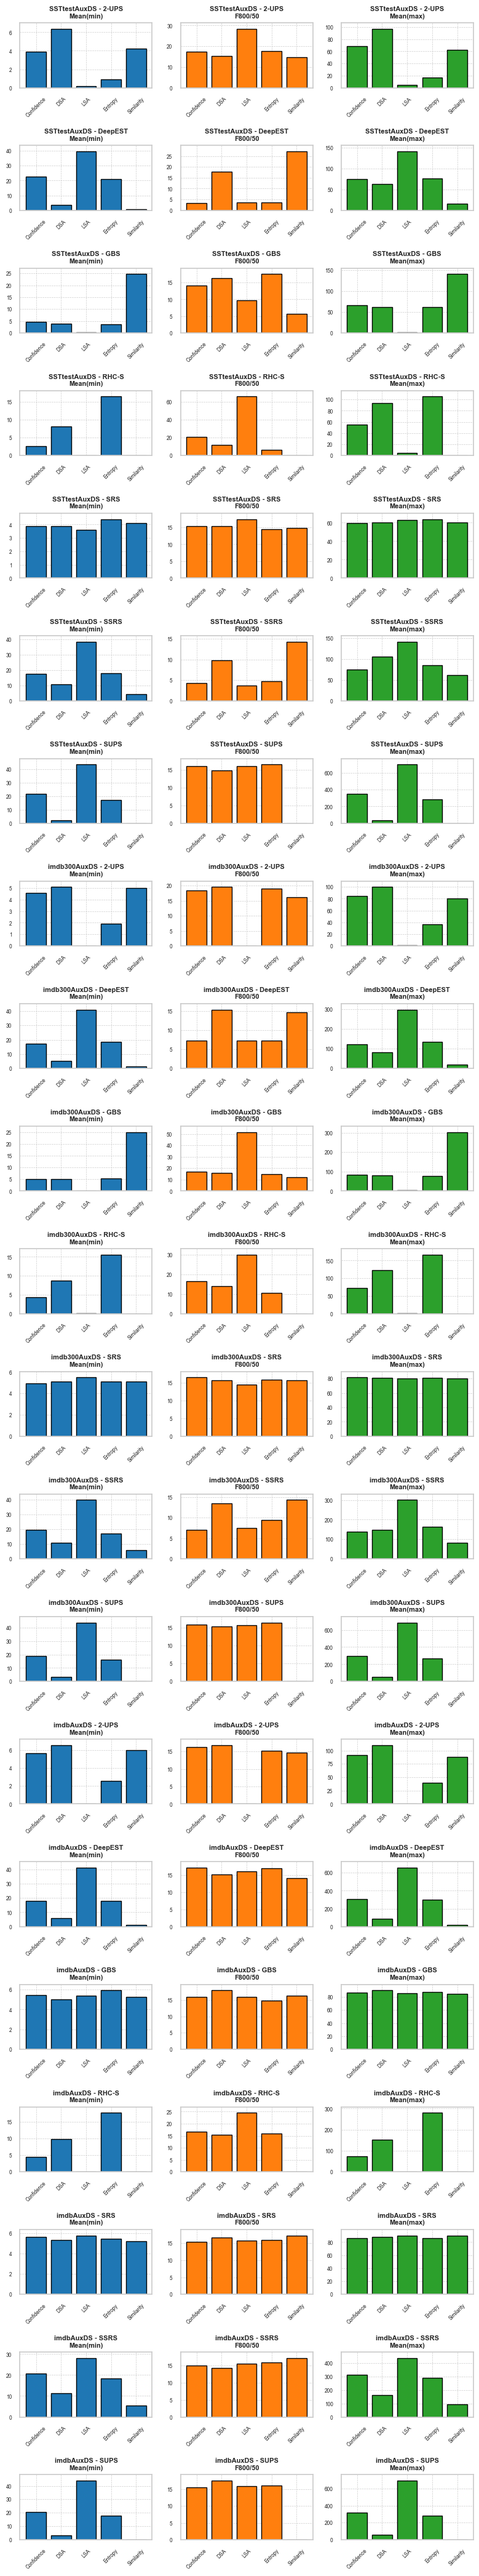

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `final_df` is your final DataFrame with columns ['Dataset', 'Method', 'Mean(min)', 'F800/50', 'Mean(max)']

# Auxiliary variables for plotting with simplified names
aux_vars = ['Confidence', 'DSA', 'LSA', 'Entropy', 'Similarity']

# Number of subplots needed
num_plots = len(final_df) * 3  # 3 metrics per row

# Set figure size (smaller)
fig, axes = plt.subplots(nrows=len(final_df), ncols=3, figsize=(8, 2 * len(final_df)))  # Smaller figure size

for idx, row in final_df.iterrows():
    dataset = row['Dataset']
    method = row['Method']

    # Plot Mean(min)
    axes[idx, 0].bar(aux_vars, row['Mean(min)'], color='#1f77b4', edgecolor='black')
    axes[idx, 0].set_title(f'{dataset} - {method}\nMean(min)', fontsize=8, weight='bold')
    axes[idx, 0].set_ylim([0, max(row['Mean(min)']) * 1.1])
    axes[idx, 0].tick_params(axis='x', labelsize=6, rotation=45)
    axes[idx, 0].tick_params(axis='y', labelsize=6)
    axes[idx, 0].grid(True, linestyle='--', linewidth=0.5)

    # Plot F800/50
    axes[idx, 1].bar(aux_vars, row['F800/50'], color='#ff7f0e', edgecolor='black')
    axes[idx, 1].set_title(f'{dataset} - {method}\nF800/50', fontsize=8, weight='bold')
    axes[idx, 1].set_ylim([0, max(row['F800/50']) * 1.1])
    axes[idx, 1].tick_params(axis='x', labelsize=6, rotation=45)
    axes[idx, 1].tick_params(axis='y', labelsize=6)
    axes[idx, 1].grid(True, linestyle='--', linewidth=0.5)

    # Plot Mean(max)
    axes[idx, 2].bar(aux_vars, row['Mean(max)'], color='#2ca02c', edgecolor='black')
    axes[idx, 2].set_title(f'{dataset} - {method}\nMean(max)', fontsize=8, weight='bold')
    axes[idx, 2].set_ylim([0, max(row['Mean(max)']) * 1.1])
    axes[idx, 2].tick_params(axis='x', labelsize=6, rotation=45)
    axes[idx, 2].tick_params(axis='y', labelsize=6)
    axes[idx, 2].grid(True, linestyle='--', linewidth=0.5)

# Adjust layout
plt.tight_layout(pad=1.0)

# Save the plot as an image file
plt.savefig('compact_failure_sensitivity_analysis_plot.png', bbox_inches='tight', dpi=300)

# Display the plot
plt.show()

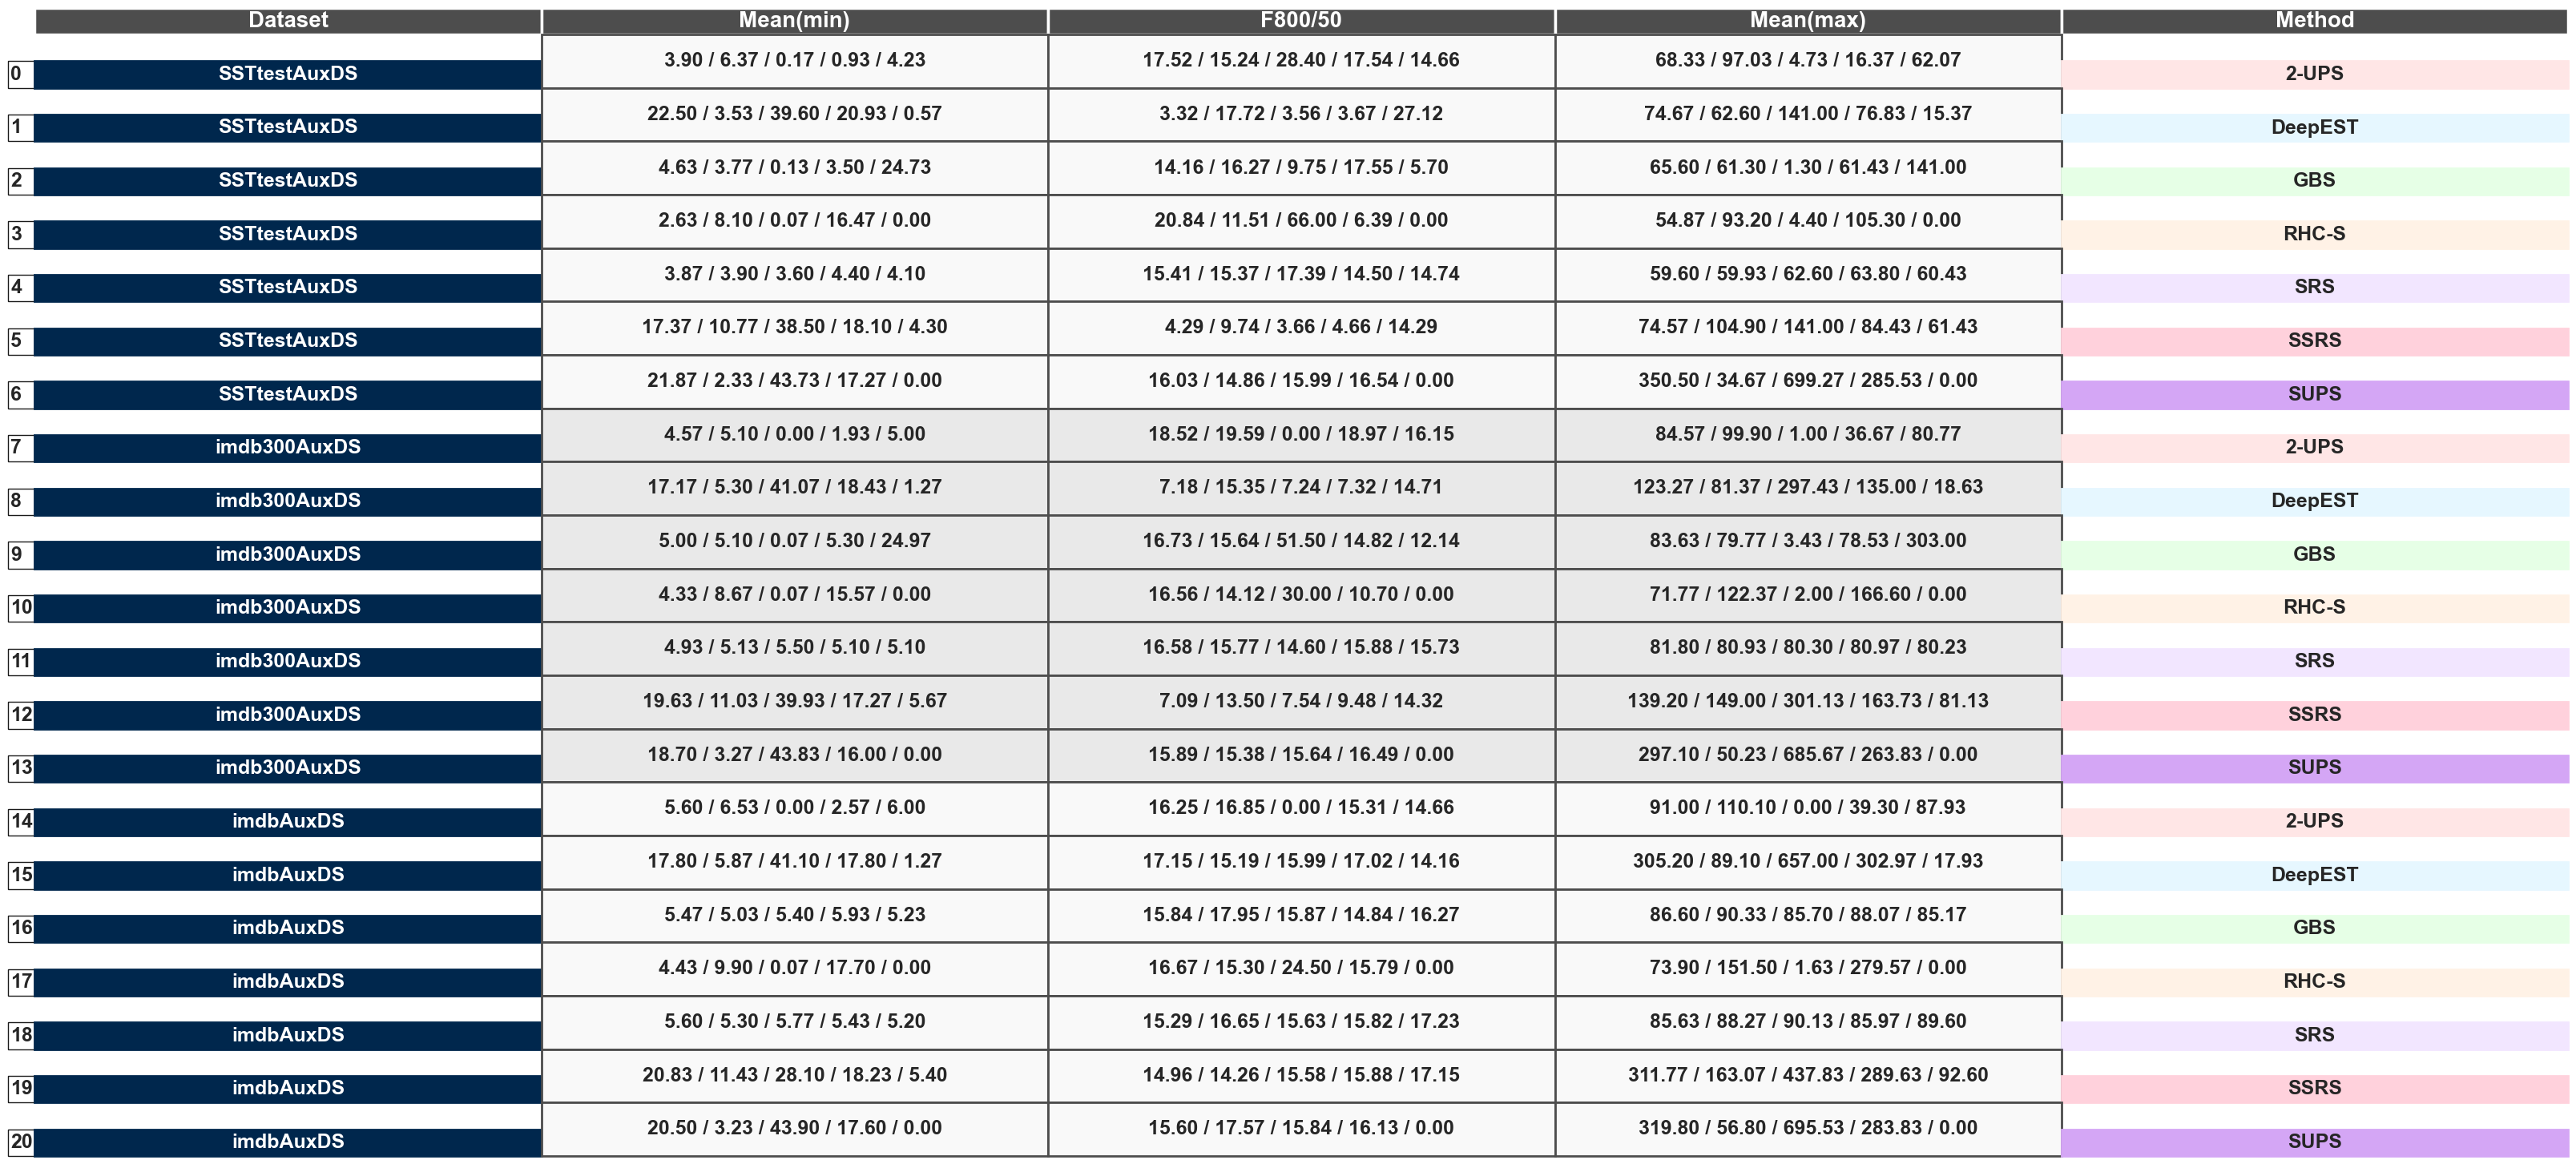

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table

# Assuming `final_df` is your final DataFrame

# Move the 'Method' column to the right
final_df = final_df[['Dataset', 'Mean(min)', 'F800/50', 'Mean(max)', 'Method']]

# Ensure the values in 'Mean(min)', 'F800/50', 'Mean(max)' are lists and then join them with '/'
final_df['Mean(min)'] = final_df['Mean(min)'].apply(lambda x: ' / '.join(map(str, x)) if isinstance(x, list) else x)
final_df['F800/50'] = final_df['F800/50'].apply(lambda x: ' / '.join(map(str, x)) if isinstance(x, list) else x)
final_df['Mean(max)'] = final_df['Mean(max)'].apply(lambda x: ' / '.join(map(str, x)) if isinstance(x, list) else x)

# Increase figure size to allow more space and height
fig, ax = plt.subplots(figsize=(24, 18))  # Increased height for better visibility

# Hide axes
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Method color map for distinct colors per method
method_colors = ['#ffe6e6', '#e6f7ff', '#e6ffe6', '#fff2e6', '#f2e6ff', '#ffd1dc', '#d4a6f5']  # Softer pastel colors

method_color_map = {}
for i, method in enumerate(final_df['Method'].unique()):
    method_color_map[method] = method_colors[i % len(method_colors)]

# Background colors for alternating row groups
row_colors = ['#f9f9f9', '#e9e9e9']  # Subtle grayscale alternating colors

# Create a table plot with enhanced formatting
tbl = table(ax, final_df, loc='center', cellLoc='center', colWidths=[0.2] * len(final_df.columns))

# Enhance table appearance
tbl.auto_set_font_size(False)
tbl.set_fontsize(18)  # Increase the font size for better readability
tbl.scale(1.7, 2)  # Adjust the scale of the table to fit content and increase height

# Apply different background colors to columns and remove white spaces
for (i, j), cell in tbl.get_celld().items():
    cell.set_fontsize(18)
    cell.set_text_props(weight='bold')  # Make all text bold for clarity and emphasis
    if j == 0:  # If the column is 'Dataset'
        cell.set_facecolor('#00274d')  # Dark navy blue background for dataset
        cell.set_text_props(weight='bold', color='white')
        cell.set_edgecolor('#00274d')  # Remove white spaces by matching edge color with background
        cell.set_linewidth(2)  # Thicker borders for better separation
    elif j == 4:  # If the column is 'Method'
        method = cell.get_text().get_text()
        cell.set_facecolor(method_color_map.get(method, '#FFFFFF'))  # Apply color based on method
        cell.set_edgecolor(method_color_map.get(method, '#FFFFFF'))  # Remove white spaces by matching edge color with background
        cell.set_linewidth(2)  # Thicker borders for better separation
    elif j >= 1 and j <= 3:  # If the column is 'Mean(min)', 'F800/50', or 'Mean(max)'
        # Alternate background colors every 7 rows
        if i > 0:  # Skip the header row
            color_index = (i - 1) // 7 % 2
            cell.set_facecolor(row_colors[color_index])
            cell.set_text_props(fontsize=18)  # Larger font for better readability
            cell.set_height(cell.get_height() * 2)  # Further increase row height for better spacing
            cell.set_edgecolor('#4d4d4d')  # Set a consistent and darker border color
            cell.set_linewidth(2)  # Thicker borders for better separation

# Adjust the header row for better visibility and aesthetics
for (i, j), cell in tbl.get_celld().items():
    if i == 0:
        cell.set_text_props(weight='bold', color='white', fontsize=20)
        cell.set_facecolor('#4d4d4d')  # Darker header background for strong contrast
        cell.set_edgecolor('#ffffff')  # White border to make it stand out
        cell.set_linewidth(2.5)  # Thicker header borders

# Remove the row labels (row numbers)
for key in tbl.get_celld().keys():
    if key[1] == -1:
        tbl._cells[key].visible = False

# Save the table as an image
plt.savefig('final_df_table_with_improved_formatting_for_paper.png', bbox_inches='tight', dpi=300)

# Display the table
plt.show()

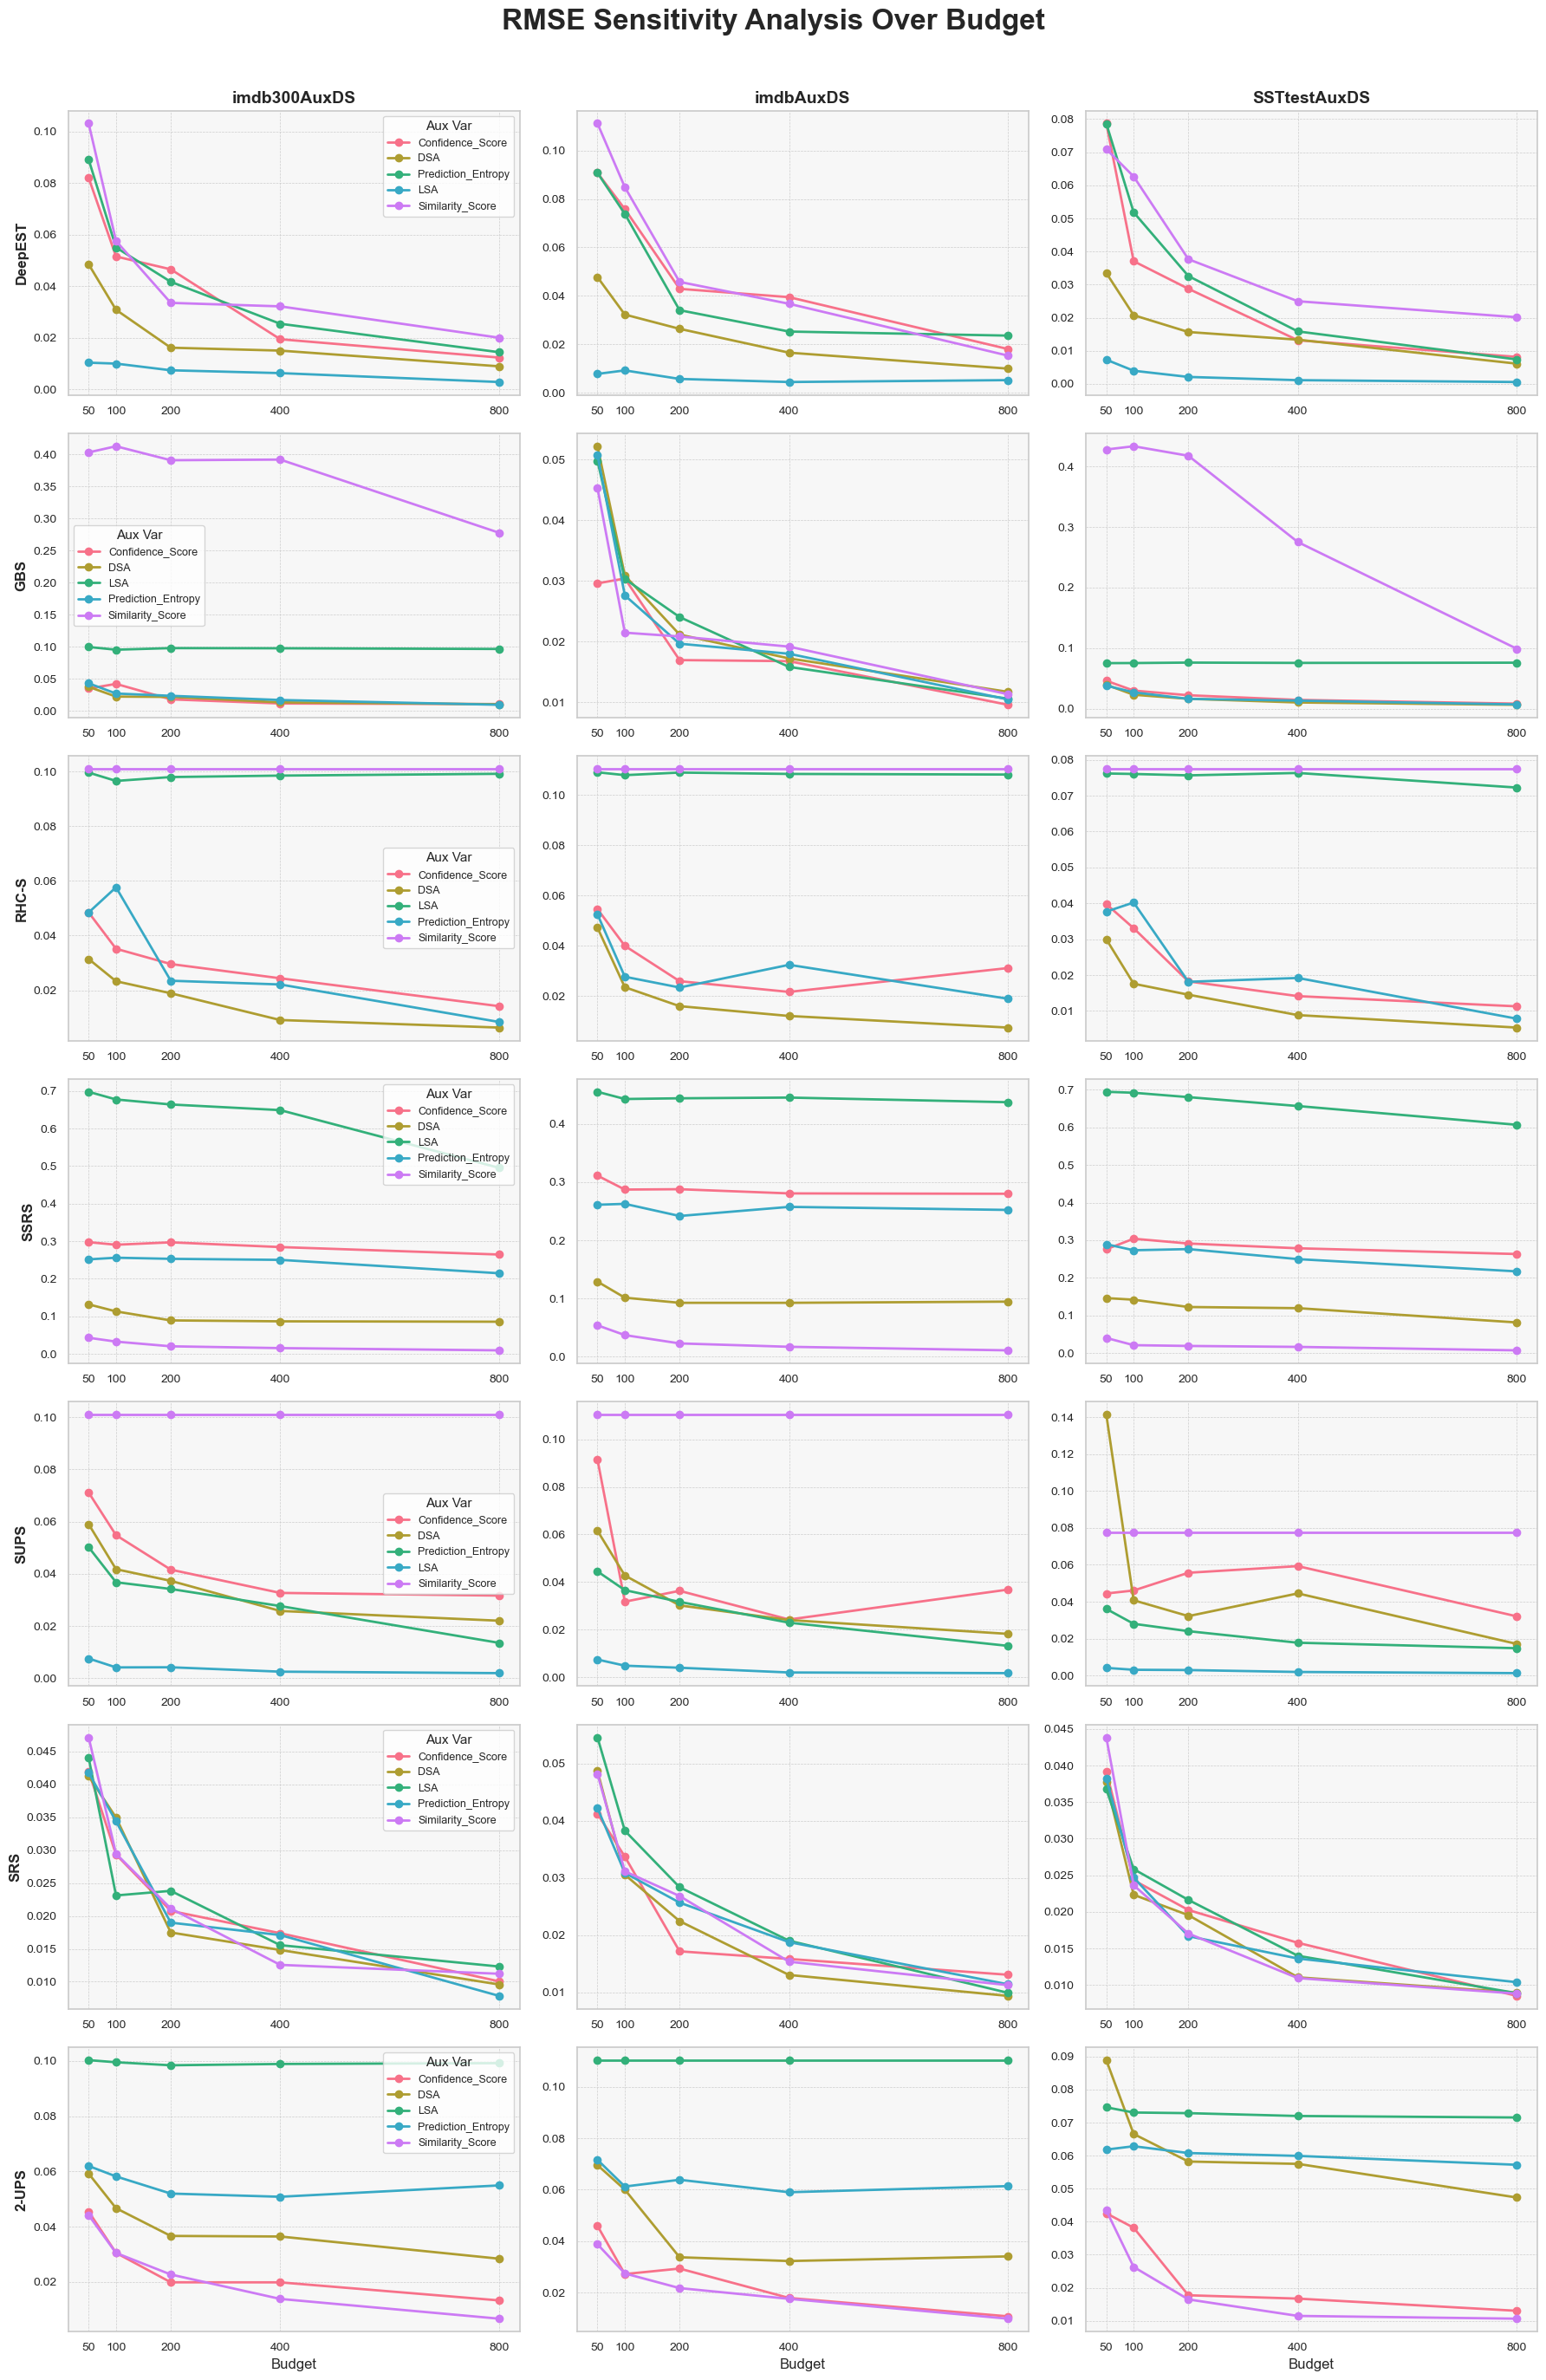

('imdb300AuxDS', 'DeepEST'):
{50: [['LSA', 0.0103209625960394], ['DSA', 0.0485018718180078], ['Confidence_Score', 0.0820507839704391], ['Prediction_Entropy', 0.0891446080495152], ['Similarity_Score', 0.1031846760727688]]}
{100: [['LSA', 0.0099669330970344], ['DSA', 0.0308575212979314], ['Confidence_Score', 0.0515462775086568], ['Prediction_Entropy', 0.0550336011368748], ['Similarity_Score', 0.0575748099096826]]}
{200: [['LSA', 0.007368705084031], ['DSA', 0.016134613624183], ['Similarity_Score', 0.0335365083376281], ['Prediction_Entropy', 0.0417137370522091], ['Confidence_Score', 0.0465674903761751]]}
{400: [['LSA', 0.0062718439735809], ['DSA', 0.0150084738106664], ['Confidence_Score', 0.0194216304437551], ['Prediction_Entropy', 0.025431073197671], ['Similarity_Score', 0.0321877780628679]]}
{800: [['LSA', 0.0028144664604492], ['DSA', 0.0089150454150532], ['Confidence_Score', 0.0123045127474783], ['Prediction_Entropy', 0.0143886011027656], ['Similarity_Score', 0.0200075166012377]]}
('imd

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure Seaborn style for better aesthetics
sns.set(style="whitegrid")

# Load your dataset (assuming the data is already loaded into a DataFrame `df`)
# Filter the necessary data for plotting
df_filtered = df[df['budget'].isin([50, 100, 200, 400, 800])]

# Get the unique methods and datasets
methods = df_filtered['method'].unique()
datasets = df_filtered['dataset'].unique()

# Initialize a dictionary to store the rankings and RMSE values
ranking_dict = {}

# Set up the plotting grid with methods as rows and datasets as columns
nrows = len(methods)
ncols = len(datasets)
fig, axes = plt.subplots(nrows, ncols, figsize=(18, 28))  # Adjusted height for better visibility
fig.suptitle('RMSE Sensitivity Analysis Over Budget', fontsize=24, weight='bold')

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Color palette for better distinction
palette = sns.color_palette("husl", len(df_filtered['aux_var'].unique()))

# Plotting each dataset-method pair
for i, method in enumerate(methods):
    for j, dataset in enumerate(datasets):
        ax = axes[i * ncols + j]
        data_subset = df_filtered[(df_filtered['dataset'] == dataset) & (df_filtered['method'] == method)]
        
        # Initialize a list to store rankings for the current dataset-method pair
        ranking_list = []

        # Plot RMSE over budget for each aux_var
        for k, aux_var in enumerate(data_subset['aux_var'].unique()):
            subset = data_subset[data_subset['aux_var'] == aux_var]
            ax.plot(subset['budget'], subset['RMSE'], marker='o', label=aux_var, color=palette[k], linewidth=2)
        
        # Generate rankings for each budget point
        for budget in [50, 100, 200, 400, 800]:
            budget_subset = data_subset[data_subset['budget'] == budget]
            budget_ranking = budget_subset.sort_values(by='RMSE', ascending=True)[['aux_var', 'RMSE']]
            ranking_list.append({budget: budget_ranking.values.tolist()})
        
        # Store the rankings in the dictionary
        ranking_dict[(dataset, method)] = ranking_list
        
        # Title and labels
        ax.set_title(f'{dataset}', fontsize=14, weight='bold') if i == 0 else None  # Title only for the top row
        ax.set_ylabel(f'{method}', fontsize=12, weight='bold') if j == 0 else None  # Label only for the first column
        ax.set_xlabel('Budget', fontsize=12) if i == nrows - 1 else None  # X-label only for the bottom row
        ax.set_xticks([50, 100, 200, 400, 800])
        ax.tick_params(axis='both', which='major', labelsize=10)
        ax.grid(True, linestyle='--', linewidth=0.5)
        ax.set_facecolor('#f7f7f7')  # Subtle background shading

        # Add legend only in the first plot of each row
        if j == 0:
            ax.legend(title='Aux Var', fontsize=9, title_fontsize='11', loc='best')
        else:
            ax.legend().set_visible(False)

# Adjust layout to avoid overlapping and improve spacing
plt.tight_layout(rect=[0, 0, 1, 0.97])

# Save the figure as an image
plt.savefig('rmse_sensitivity_analysis_by_method_and_dataset.png', dpi=300)

# Display the plot
plt.show()

# Output the ranking dictionary for inspection
for key, value in ranking_dict.items():
    print(f'{key}:')
    for rank in value:
        print(rank)

	1.	First in the list: The auxiliary variable with the lowest RMSE at that budget point (best performance).
	2.	Last in the list: The auxiliary variable with the highest RMSE at that budget point (worst performance).

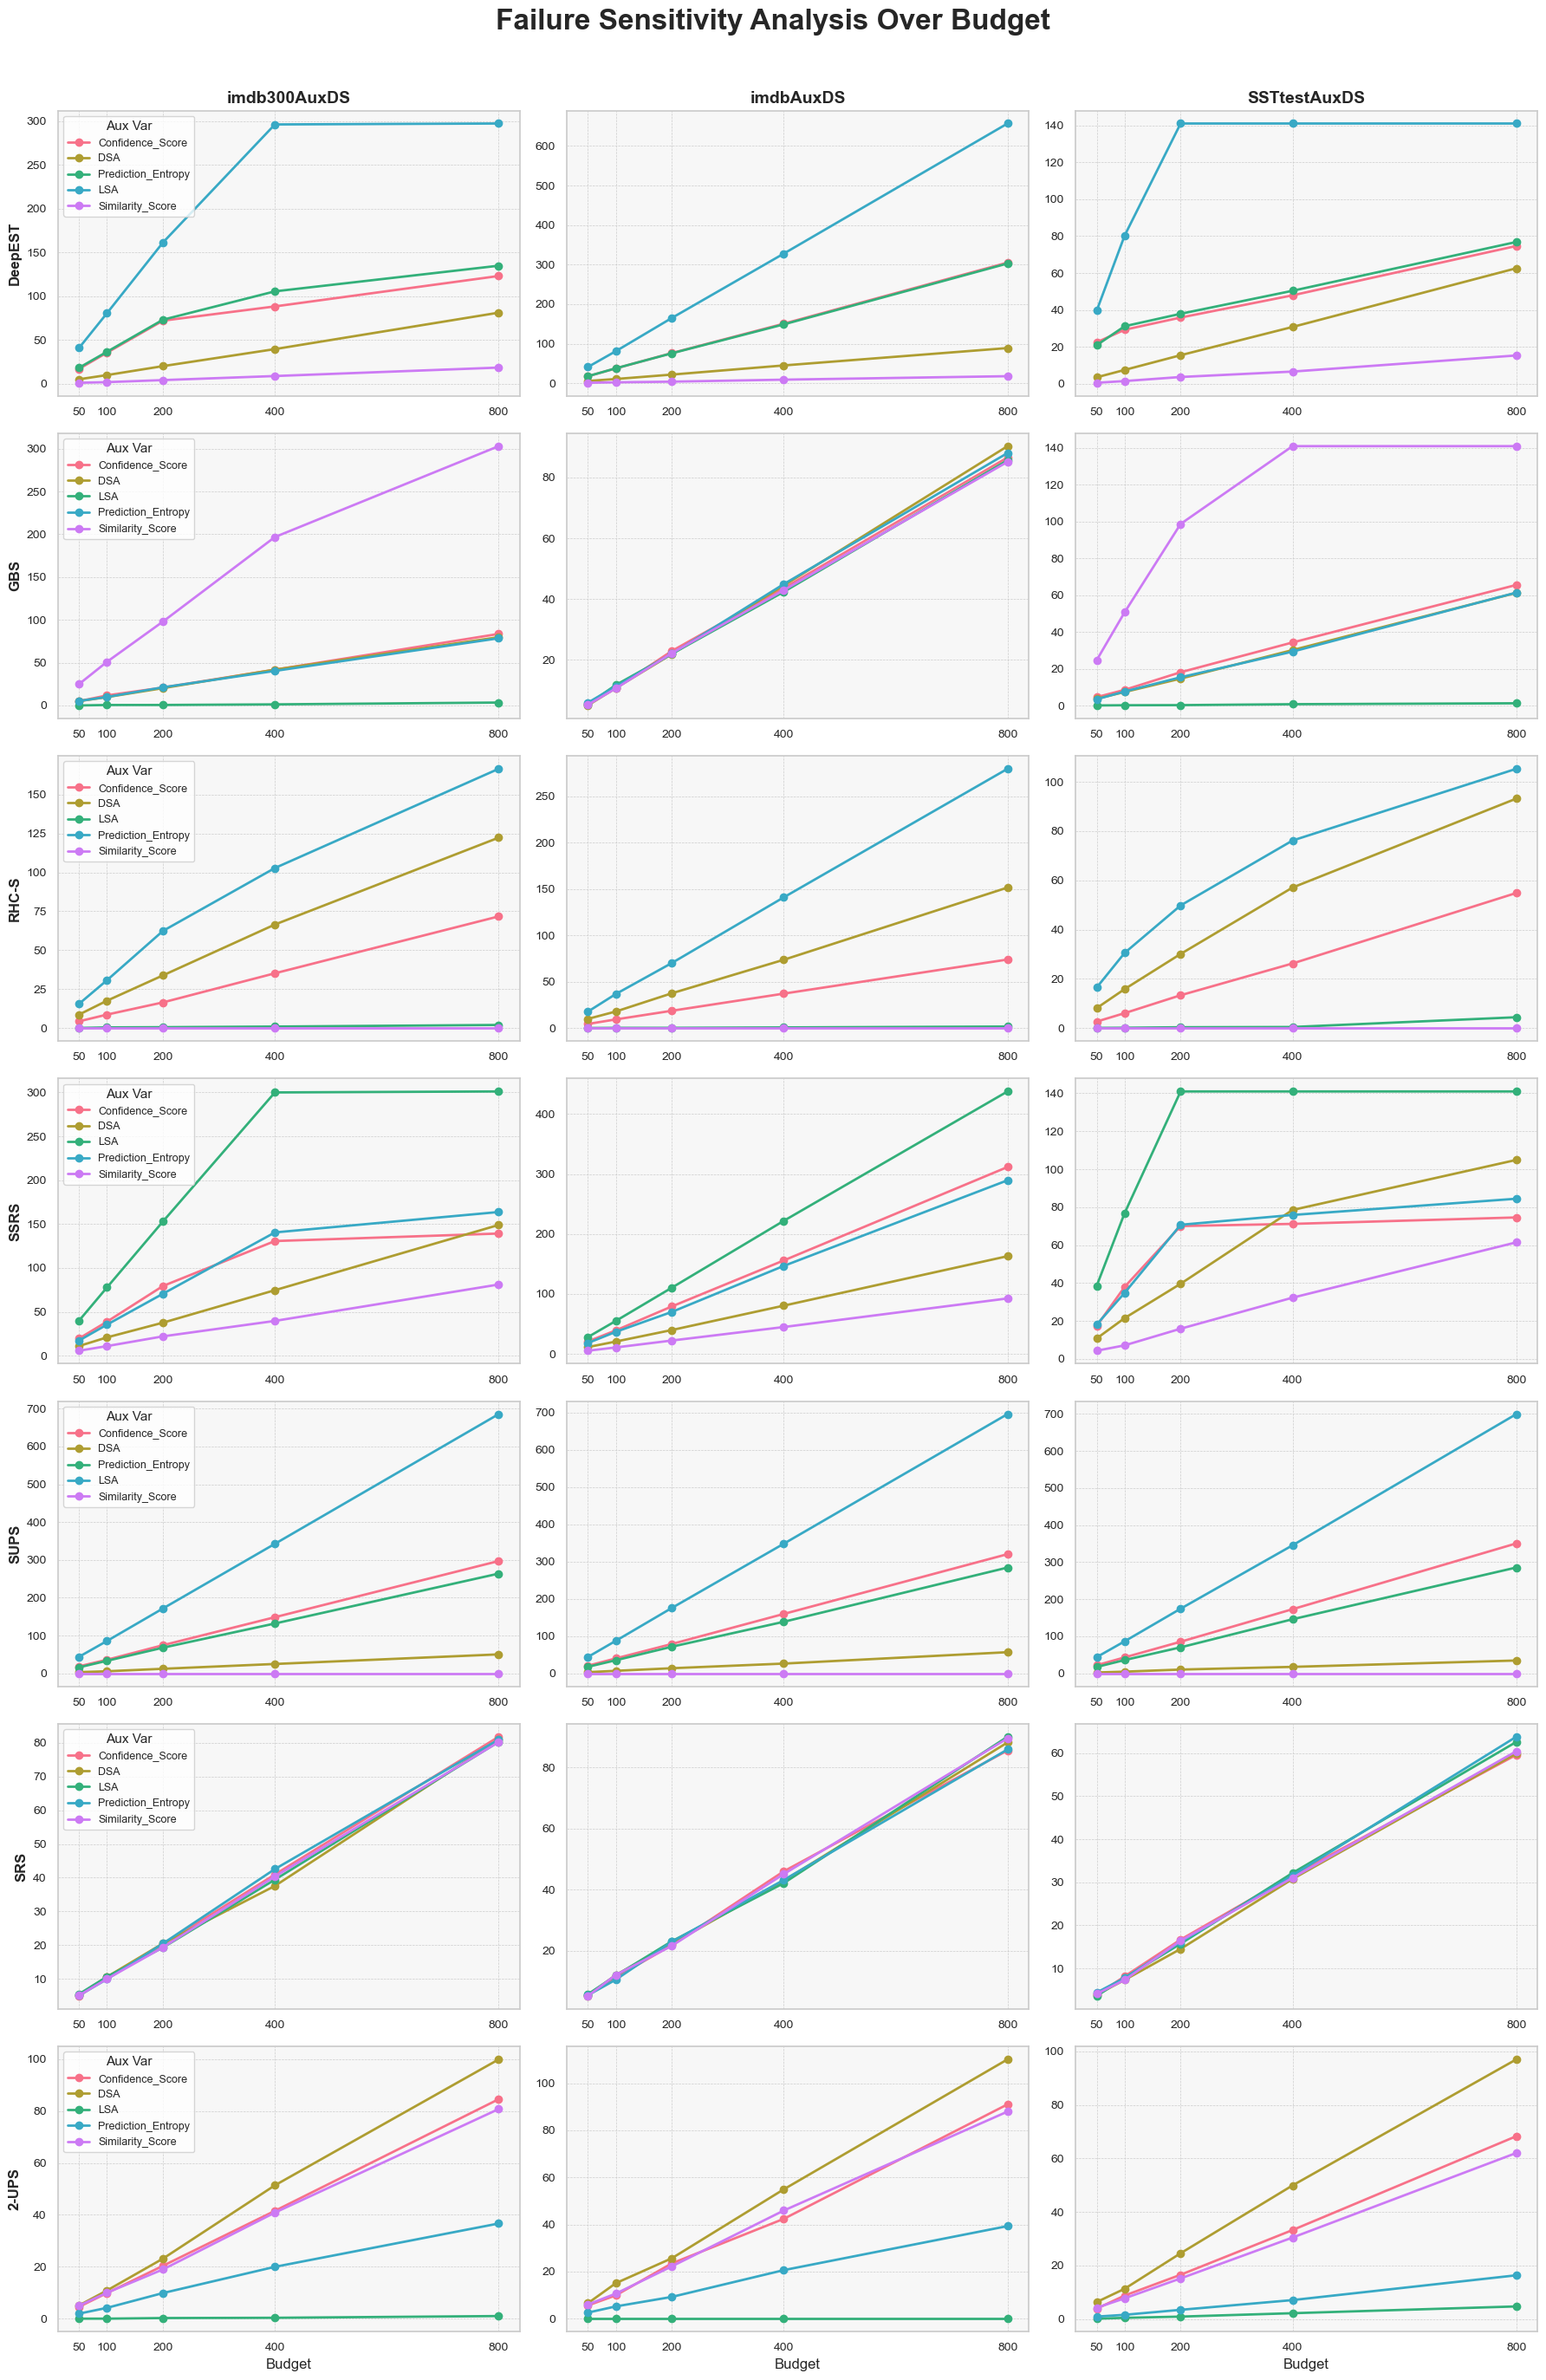

('imdb300AuxDS', 'DeepEST'):
{50: [['Similarity_Score', 1.2666666666666666], ['DSA', 5.3], ['Confidence_Score', 17.166666666666668], ['Prediction_Entropy', 18.433333333333337], ['LSA', 41.06666666666667]]}
{100: [['Similarity_Score', 2.0], ['DSA', 10.066666666666666], ['Confidence_Score', 35.666666666666664], ['Prediction_Entropy', 36.7], ['LSA', 80.83333333333333]]}
{200: [['Similarity_Score', 4.333333333333333], ['DSA', 20.3], ['Confidence_Score', 72.23333333333333], ['Prediction_Entropy', 73.3], ['LSA', 161.53333333333333]]}
{400: [['Similarity_Score', 8.966666666666667], ['DSA', 39.733333333333334], ['Confidence_Score', 88.5], ['Prediction_Entropy', 105.7], ['LSA', 296.3666666666667]]}
{800: [['Similarity_Score', 18.633333333333333], ['DSA', 81.36666666666666], ['Confidence_Score', 123.26666666666668], ['Prediction_Entropy', 135.0], ['LSA', 297.43333333333334]]}
('imdbAuxDS', 'DeepEST'):
{50: [['Similarity_Score', 1.2666666666666666], ['DSA', 5.866666666666666], ['Confidence_Score'

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure Seaborn style for better aesthetics
sns.set(style="whitegrid")

# Load your dataset (assuming the data is already loaded into a DataFrame `df`)
# Filter the necessary data for plotting
df_filtered = df[df['budget'].isin([50, 100, 200, 400, 800])]

# Get the unique methods and datasets
methods = df_filtered['method'].unique()
datasets = df_filtered['dataset'].unique()

# Initialize a dictionary to store the rankings and failures_mean values
ranking_dict_failures = {}

# Set up the plotting grid with methods as rows and datasets as columns
nrows = len(methods)
ncols = len(datasets)
fig, axes = plt.subplots(nrows, ncols, figsize=(18, 28))  # Adjusted height for better visibility
fig.suptitle('Failure Sensitivity Analysis Over Budget', fontsize=24, weight='bold')

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Color palette for better distinction
palette = sns.color_palette("husl", len(df_filtered['aux_var'].unique()))

# Plotting each dataset-method pair
for i, method in enumerate(methods):
    for j, dataset in enumerate(datasets):
        ax = axes[i * ncols + j]
        data_subset = df_filtered[(df_filtered['dataset'] == dataset) & (df_filtered['method'] == method)]
        
        # Initialize a list to store rankings for the current dataset-method pair
        ranking_list = []

        # Plot failures_mean over budget for each aux_var
        for k, aux_var in enumerate(data_subset['aux_var'].unique()):
            subset = data_subset[data_subset['aux_var'] == aux_var]
            ax.plot(subset['budget'], subset['failures_mean'], marker='o', label=aux_var, color=palette[k], linewidth=2)
        
        # Generate rankings for each budget point
        for budget in [50, 100, 200, 400, 800]:
            budget_subset = data_subset[data_subset['budget'] == budget]
            budget_ranking = budget_subset.sort_values(by='failures_mean', ascending=True)[['aux_var', 'failures_mean']]
            ranking_list.append({budget: budget_ranking.values.tolist()})
        
        # Store the rankings in the dictionary
        ranking_dict_failures[(dataset, method)] = ranking_list
        
        # Title and labels
        ax.set_title(f'{dataset}', fontsize=14, weight='bold') if i == 0 else None  # Title only for the top row
        ax.set_ylabel(f'{method}', fontsize=12, weight='bold') if j == 0 else None  # Label only for the first column
        ax.set_xlabel('Budget', fontsize=12) if i == nrows - 1 else None  # X-label only for the bottom row
        ax.set_xticks([50, 100, 200, 400, 800])
        ax.tick_params(axis='both', which='major', labelsize=10)
        ax.grid(True, linestyle='--', linewidth=0.5)
        ax.set_facecolor('#f7f7f7')  # Subtle background shading

        # Add legend only in the first plot of each row
        if j == 0:
            ax.legend(title='Aux Var', fontsize=9, title_fontsize='11', loc='best')
        else:
            ax.legend().set_visible(False)

# Adjust layout to avoid overlapping and improve spacing
plt.tight_layout(rect=[0, 0, 1, 0.97])

# Save the figure as an image
plt.savefig('failure_sensitivity_analysis_by_method_and_dataset.png', dpi=300)

# Display the plot
plt.show()

# Output the ranking dictionary for inspection
for key, value in ranking_dict_failures.items():
    print(f'{key}:')
    for rank in value:
        print(rank)

## Discussion

In [138]:
import pandas as pd

# Assuming df is your DataFrame and includes all necessary columns

# Normalize the RMSE, RMedSE, and failures_mean columns
df['Normalized_RMSE'] = (df['RMSE'] - df['RMSE'].min()) / (df['RMSE'].max() - df['RMSE'].min())
df['Normalized_RMedSE'] = (df['RMedSE'] - df['RMedSE'].min()) / (df['RMedSE'].max() - df['RMedSE'].min())
df['Normalized_failures'] = (df['failures_mean'] - df['failures_mean'].min()) / (df['failures_mean'].max() - df['failures_mean'].min())

# Calculate the trade-off metrics using normalized values
df['TRMSE-nf'] = df['Normalized_RMSE'] * df['Normalized_failures']
df['TRMedSE-nf'] = df['Normalized_RMedSE'] * df['Normalized_failures']

# List of metrics to analyze
metrics = ['RMSE', 'RMedSE', 'failures_mean', 'TRMSE-nf', 'TRMedSE-nf']

# Create a dictionary to store the top-3 counts for each technique per metric and dataset
top3_counts = {dataset: {metric: {} for metric in metrics} for dataset in df['dataset'].unique()}

# Function to update the counts for top 3 methods
def update_top3_counts(group, dataset, metric):
    top3_methods = group.sort_values(by=metric, ascending=True).head(3)['method'].tolist()
    for method in top3_methods:
        if method not in top3_counts[dataset][metric]:
            top3_counts[dataset][metric][method] = 0
        top3_counts[dataset][metric][method] += 1

# Iterate through each combination of factors
for dataset in df['dataset'].unique():
    for aux_var in df['aux_var'].unique():
        for sample_size in df['budget'].unique():
            filtered_df = df[(df['dataset'] == dataset) & ((df['budget'] == budget)|(df['aux_var'] == aux_var))]

            if not filtered_df.empty:
                for metric in metrics:
                    update_top3_counts(filtered_df, dataset, metric)

# Calculate the top 3 methods based on the counts for each dataset
top3_overall = {}
for dataset in top3_counts:
    top3_overall[dataset] = {}
    for metric in top3_counts[dataset]:
        top3_overall[dataset][metric] = sorted(top3_counts[dataset][metric].items(), key=lambda item: item[1], reverse=True)[:3]

# Display the results
for dataset, metrics_top3 in top3_overall.items():
    print(f"Top 3 methods for each metric in dataset: {dataset}")
    for metric, top3 in metrics_top3.items():
        print(f"  Metric: {metric}")
        for method, count in top3:
            print(f"    {method}: {count} times")
    print("\n")

Top 3 methods for each metric in dataset: imdb300AuxDS
  Metric: RMSE
    SUPS: 30 times
    DeepEST: 25 times
    RHC-S: 20 times
  Metric: RMedSE
    SUPS: 30 times
    DeepEST: 25 times
    2-UPS: 20 times
  Metric: failures_mean
    RHC-S: 25 times
    SUPS: 25 times
    2-UPS: 25 times
  Metric: TRMSE-nf
    RHC-S: 35 times
    2-UPS: 25 times
    SUPS: 15 times
  Metric: TRMedSE-nf
    RHC-S: 30 times
    2-UPS: 25 times
    SUPS: 20 times


Top 3 methods for each metric in dataset: imdbAuxDS
  Metric: RMSE
    SUPS: 35 times
    DeepEST: 20 times
    RHC-S: 20 times
  Metric: RMedSE
    SUPS: 30 times
    DeepEST: 25 times
    RHC-S: 20 times
  Metric: failures_mean
    RHC-S: 25 times
    SUPS: 25 times
    2-UPS: 25 times
  Metric: TRMSE-nf
    2-UPS: 30 times
    SUPS: 25 times
    RHC-S: 20 times
  Metric: TRMedSE-nf
    RHC-S: 30 times
    2-UPS: 25 times
    SUPS: 20 times


Top 3 methods for each metric in dataset: SSTtestAuxDS
  Metric: RMSE
    DeepEST: 30 times
    SUP

In [134]:
import pandas as pd

# Assuming df is your DataFrame and includes all necessary columns

# Normalize the RMSE, RMedSE, and failures_mean columns
df['Normalized_RMSE'] = (df['RMSE'] - df['RMSE'].min()) / (df['RMSE'].max() - df['RMSE'].min())
df['Normalized_RMedSE'] = (df['RMedSE'] - df['RMedSE'].min()) / (df['RMedSE'].max() - df['RMedSE'].min())
df['Normalized_failures'] = (df['failures_mean'] - df['failures_mean'].min()) / (df['failures_mean'].max() - df['failures_mean'].min())

# Calculate the trade-off metrics using normalized values
df['TRMSE-nf'] = df['Normalized_RMSE'] * df['Normalized_failures']
df['TRMedSE-nf'] = df['Normalized_RMedSE'] * df['Normalized_failures']

# List of metrics to analyze
metrics = ['RMSE', 'RMedSE', 'failures_mean', 'TRMSE-nf', 'TRMedSE-nf']

# Create a dictionary to store the top-3 counts for each technique per metric and budget
top3_counts = {budget: {metric: {} for metric in metrics} for budget in df['budget'].unique()}

# Function to update the counts for top 3 methods
def update_top3_counts(group, budget, metric):
    top3_methods = group.sort_values(by=metric, ascending=True).head(3)['method'].tolist()
    for method in top3_methods:
        if method not in top3_counts[budget][metric]:
            top3_counts[budget][metric][method] = 0
        top3_counts[budget][metric][method] += 1

# Iterate through each combination of factors
for budget in df['budget'].unique():
    for aux_var in df['aux_var'].unique():
        for dataset in df['dataset'].unique():
            filtered_df = df[(df['budget'] == budget) & ((df['dataset'] == dataset) | (df['aux_var'] == aux_var))]
        
            if not filtered_df.empty:
                for metric in metrics:
                    update_top3_counts(filtered_df, budget, metric)

# Calculate the top 3 methods based on the counts for each budget
top3_overall = {}
for budget in top3_counts:
    top3_overall[budget] = {}
    for metric in top3_counts[budget]:
        top3_overall[budget][metric] = sorted(top3_counts[budget][metric].items(), key=lambda item: item[1], reverse=True)[:3]

# Display the results
for budget, metrics_top3 in top3_overall.items():
    print(f"Top 3 methods for each metric in budget: {budget}")
    for metric, top3 in metrics_top3.items():
        print(f"  Metric: {metric}")
        for method, count in top3:
            print(f"    {method}: {count} times")
    print("\n")

Top 3 methods for each metric in budget: 50
  Metric: RMSE
    SUPS: 18 times
    DeepEST: 15 times
    GBS: 6 times
  Metric: RMedSE
    SUPS: 18 times
    DeepEST: 15 times
    GBS: 6 times
  Metric: failures_mean
    RHC-S: 18 times
    SUPS: 16 times
    2-UPS: 11 times
  Metric: TRMSE-nf
    SUPS: 17 times
    RHC-S: 16 times
    2-UPS: 12 times
  Metric: TRMedSE-nf
    SUPS: 17 times
    RHC-S: 15 times
    2-UPS: 13 times


Top 3 methods for each metric in budget: 100
  Metric: RMSE
    SUPS: 18 times
    DeepEST: 15 times
    RHC-S: 6 times
  Metric: RMedSE
    DeepEST: 21 times
    SUPS: 18 times
    SRS: 3 times
  Metric: failures_mean
    RHC-S: 19 times
    SUPS: 15 times
    2-UPS: 11 times
  Metric: TRMSE-nf
    SUPS: 17 times
    RHC-S: 15 times
    2-UPS: 13 times
  Metric: TRMedSE-nf
    SUPS: 17 times
    RHC-S: 15 times
    2-UPS: 13 times


Top 3 methods for each metric in budget: 200
  Metric: RMSE
    SUPS: 18 times
    DeepEST: 17 times
    RHC-S: 9 times
  Metri

In [151]:
import pandas as pd

# Assuming df is your DataFrame and includes all necessary columns

# Normalize the RMSE, RMedSE, and failures_mean columns
df['Normalized_RMSE'] = (df['RMSE'] - df['RMSE'].min()) / (df['RMSE'].max() - df['RMSE'].min())
df['Normalized_RMedSE'] = (df['RMedSE'] - df['RMedSE'].min()) / (df['RMedSE'].max() - df['RMedSE'].min())
df['Normalized_failures'] = (df['failures_mean'] - df['failures_mean'].min()) / (df['failures_mean'].max() - df['failures_mean'].min())

# Calculate the trade-off metrics using normalized values
df['TRMSE-nf'] = df['Normalized_RMSE'] * df['Normalized_failures']
df['TRMedSE-nf'] = df['Normalized_RMedSE'] * df['Normalized_failures']

# List of metrics to analyze
metrics = ['RMSE', 'RMedSE', 'failures_mean', 'TRMSE-nf', 'TRMedSE-nf']

# Create a dictionary to store the top-3 counts for each technique per metric and aux_var
top3_counts = {aux_var: {metric: {} for metric in metrics} for aux_var in df['aux_var'].unique()}

# Function to update the counts for top 3 methods
def update_top3_counts(group, aux_var, metric):
    top3_methods = group.sort_values(by=metric, ascending=True).head(3)['method'].tolist()
    for method in top3_methods:
        if method not in top3_counts[aux_var][metric]:
            top3_counts[aux_var][metric][method] = 0
        top3_counts[aux_var][metric][method] += 1

# Iterate through each aux_var and filter by it primarily, then by budget and dataset
for aux_var in df['aux_var'].unique():
    for budget in df['budget'].unique():
        for dataset in df['dataset'].unique():
            filtered_df = df[(df['aux_var'] == aux_var) & (df['dataset'] == dataset) & (df['budget'] == budget)]
        
            if not filtered_df.empty:
                for metric in metrics:
                    update_top3_counts(filtered_df, aux_var, metric)

# Calculate the top 3 methods based on the counts for each aux_var
top3_overall = {}
for aux_var in top3_counts:
    top3_overall[aux_var] = {}
    for metric in top3_counts[aux_var]:
        top3_overall[aux_var][metric] = sorted(top3_counts[aux_var][metric].items(), key=lambda item: item[1], reverse=True)[:3]

# Display the results
for aux_var, metrics_top3 in top3_overall.items():
    print(f"Top 3 methods for each metric with auxiliary variable: {aux_var}")
    for metric, top3 in metrics_top3.items():
        print(f"  Metric: {metric}")
        for method, count in top3:
            print(f"    {method}: {count} times")
    print("\n")

Top 3 methods for each metric with auxiliary variable: Confidence_Score
  Metric: RMSE
    SRS: 13 times
    GBS: 12 times
    2-UPS: 9 times
  Metric: RMedSE
    GBS: 13 times
    SRS: 12 times
    RHC-S: 10 times
  Metric: failures_mean
    RHC-S: 15 times
    SRS: 13 times
    2-UPS: 9 times
  Metric: TRMSE-nf
    SRS: 14 times
    GBS: 12 times
    2-UPS: 9 times
  Metric: TRMedSE-nf
    RHC-S: 14 times
    SRS: 13 times
    GBS: 10 times


Top 3 methods for each metric with auxiliary variable: DSA
  Metric: RMSE
    RHC-S: 15 times
    SRS: 12 times
    DeepEST: 10 times
  Metric: RMedSE
    RHC-S: 14 times
    GBS: 12 times
    DeepEST: 10 times
  Metric: failures_mean
    SUPS: 15 times
    GBS: 13 times
    SRS: 9 times
  Metric: TRMSE-nf
    GBS: 12 times
    SRS: 12 times
    DeepEST: 11 times
  Metric: TRMedSE-nf
    GBS: 13 times
    DeepEST: 10 times
    SUPS: 9 times


Top 3 methods for each metric with auxiliary variable: Prediction_Entropy
  Metric: RMSE
    GBS: 15 tim

In [156]:
import pandas as pd
from itertools import product

# Assuming df is your DataFrame and includes all necessary columns

# Normalize the RMSE, RMedSE, and failures_mean columns
df['Normalized_RMSE'] = (df['RMSE'] - df['RMSE'].min()) / (df['RMSE'].max() - df['RMSE'].min())
df['Normalized_RMedSE'] = (df['RMedSE'] - df['RMedSE'].min()) / (df['RMedSE'].max() - df['RMedSE'].min())
df['Normalized_failures'] = (df['failures_mean'] - df['failures_mean'].min()) / (df['failures_mean'].max() - df['failures_mean'].min())

# Calculate the trade-off metrics using normalized values
df['TRMSE-nf'] = df['Normalized_RMSE'] * df['Normalized_failures']
df['TRMedSE-nf'] = df['Normalized_RMedSE'] * df['Normalized_failures']

# List of metrics to analyze
metrics = ['RMSE', 'RMedSE', 'failures_mean', 'TRMSE-nf', 'TRMedSE-nf']

# Generate all possible combinations of dataset, aux_var, and budget (without method)
combinations = list(product(df['dataset'].unique(), df['aux_var'].unique(), df['budget'].unique()))

# Create an empty DataFrame to store the results
results = pd.DataFrame(columns=['dataset', 'aux_var', 'budget',
                                'RMSE_top1', 'RMSE_top2', 'RMSE_top3',
                                'RMedSE_top1', 'RMedSE_top2', 'RMedSE_top3',
                                'failures_top1', 'failures_top2', 'failures_top3',
                                'TRMSE-nf_top1', 'TRMSE-nf_top2', 'TRMSE-nf_top3',
                                'TRMedSE-nf_top1', 'TRMedSE-nf_top2', 'TRMedSE-nf_top3'])

# Function to get top 3 methods for a given metric
def get_top3_methods(filtered_df, metric):
    top3_methods = filtered_df.sort_values(by=metric, ascending=True).head(3)['method'].tolist()
    return top3_methods + [None]*(3-len(top3_methods))  # Ensures that we always return 3 items

# Iterate through each combination
for dataset, aux_var, budget in combinations:
    filtered_df = df[(df['dataset'] == dataset) & 
                     (df['aux_var'] == aux_var) & 
                     (df['budget'] == budget)]
    
    if not filtered_df.empty:
        # Get top 3 methods for each metric
        RMSE_top3 = get_top3_methods(filtered_df, 'RMSE')
        RMedSE_top3 = get_top3_methods(filtered_df, 'RMedSE')
        failures_top3 = get_top3_methods(filtered_df, 'failures_mean')
        TRMSE_nf_top3 = get_top3_methods(filtered_df, 'TRMSE-nf')
        TRMedSE_nf_top3 = get_top3_methods(filtered_df, 'TRMedSE-nf')
        
        # Create a new DataFrame row with the results
        new_row = pd.DataFrame({
            'dataset': [dataset],
            'aux_var': [aux_var],
            'budget': [budget],
            'RMSE_top1': [RMSE_top3[0]], 'RMSE_top2': [RMSE_top3[1]], 'RMSE_top3': [RMSE_top3[2]],
            'RMedSE_top1': [RMedSE_top3[0]], 'RMedSE_top2': [RMedSE_top3[1]], 'RMedSE_top3': [RMedSE_top3[2]],
            'failures_top1': [failures_top3[0]], 'failures_top2': [failures_top3[1]], 'failures_top3': [failures_top3[2]],
            'TRMSE-nf_top1': [TRMSE_nf_top3[0]], 'TRMSE-nf_top2': [TRMSE_nf_top3[1]], 'TRMSE-nf_top3': [TRMSE_nf_top3[2]],
            'TRMedSE-nf_top1': [TRMedSE_nf_top3[0]], 'TRMedSE-nf_top2': [TRMedSE_nf_top3[1]], 'TRMedSE-nf_top3': [TRMedSE_nf_top3[2]]
        })
        
        # Concatenate the new row to the results DataFrame
        results = pd.concat([results, new_row], ignore_index=True)

# Display or save the results
print(results)
# Optionally, you can save the results to a CSV file
results.to_csv('top3_methods_Discussion.csv', index=False)

         dataset           aux_var budget RMSE_top1 RMSE_top2 RMSE_top3  \
0   imdb300AuxDS  Confidence_Score     50       GBS       SRS     2-UPS   
1   imdb300AuxDS  Confidence_Score    100       SRS     2-UPS     RHC-S   
2   imdb300AuxDS  Confidence_Score    200       GBS     2-UPS       SRS   
3   imdb300AuxDS  Confidence_Score    400       GBS       SRS   DeepEST   
4   imdb300AuxDS  Confidence_Score    800       SRS       GBS   DeepEST   
..           ...               ...    ...       ...       ...       ...   
70  SSTtestAuxDS  Similarity_Score     50      SSRS     2-UPS       SRS   
71  SSTtestAuxDS  Similarity_Score    100      SSRS       SRS     2-UPS   
72  SSTtestAuxDS  Similarity_Score    200     2-UPS       SRS      SSRS   
73  SSTtestAuxDS  Similarity_Score    400       SRS     2-UPS      SSRS   
74  SSTtestAuxDS  Similarity_Score    800      SSRS       SRS     2-UPS   

   RMedSE_top1 RMedSE_top2 RMedSE_top3 failures_top1 failures_top2  \
0        RHC-S       2-UPS   

In [159]:
import pandas as pd

# Load the saved dataset
results = pd.read_csv('top3_methods_Discussion.csv')  # Adjust the file name if different

# Define the metrics and their respective columns in the dataset
metrics = {
    'RMSE': ['RMSE_top1', 'RMSE_top2', 'RMSE_top3'],
    'RMedSE': ['RMedSE_top1', 'RMedSE_top2', 'RMedSE_top3'],
    'failures_mean': ['failures_top1', 'failures_top2', 'failures_top3'],
    'TRMSE-nf': ['TRMSE-nf_top1', 'TRMSE-nf_top2', 'TRMSE-nf_top3'],
    'TRMedSE-nf': ['TRMedSE-nf_top1', 'TRMedSE-nf_top2', 'TRMedSE-nf_top3'],
}

# Initialize a dictionary to store the ranking results for each metric
ranking_results = {}

# Function to count the top-3 appearances for each metric
def count_top3_appearances(columns):
    count_dict = {}
    for col in columns:
        for technique in results[col]:
            if pd.notna(technique):  # Ensure the value is not NaN
                if technique not in count_dict:
                    count_dict[technique] = 0
                count_dict[technique] += 1
    return count_dict

# Calculate and rank the techniques for each metric
for metric, cols in metrics.items():
    # Count the appearances
    counts = count_top3_appearances(cols)
    
    # Sort the techniques based on the count in descending order
    sorted_techniques = sorted(counts.items(), key=lambda item: item[1], reverse=True)
    
    # Get the top 3 techniques based on the counts
    ranking_results[metric] = sorted_techniques[:3]

# Display the results
for metric, top3 in ranking_results.items():
    print(f"Top 3 techniques for {metric}:")
    for technique, count in top3:
        print(f"  {technique}: {count} times")
    print("\n")

# Optionally, save the ranking results to a CSV file
# ranking_df = pd.DataFrame([(metric, technique, count) for metric, top3 in ranking_results.items() for technique, count in top3],
#                           columns=['Metric', 'Technique', 'Count'])
# ranking_df.to_csv('top_3_techniques_per_metric.csv', index=False)

Top 3 techniques for RMSE:
  SRS: 63 times
  GBS: 42 times
  DeepEST: 31 times


Top 3 techniques for RMedSE:
  SRS: 58 times
  GBS: 43 times
  RHC-S: 36 times


Top 3 techniques for failures_mean:
  GBS: 50 times
  RHC-S: 45 times
  2-UPS: 40 times


Top 3 techniques for TRMSE-nf:
  GBS: 52 times
  RHC-S: 43 times
  SRS: 41 times


Top 3 techniques for TRMedSE-nf:
  RHC-S: 50 times
  GBS: 50 times
  SRS: 38 times




In [160]:
import pandas as pd

# Load the saved dataset

# Define the metrics and their respective columns in the dataset
metrics = {
    'RMSE': ['RMSE_top1', 'RMSE_top2', 'RMSE_top3'],
    'RMedSE': ['RMedSE_top1', 'RMedSE_top2', 'RMedSE_top3'],
    'failures_mean': ['failures_top1', 'failures_top2', 'failures_top3'],
    'TRMSE-nf': ['TRMSE-nf_top1', 'TRMSE-nf_top2', 'TRMSE-nf_top3'],
    'TRMedSE-nf': ['TRMedSE-nf_top1', 'TRMedSE-nf_top2', 'TRMedSE-nf_top3'],
}

# Initialize a dictionary to store the ranking results for each dataset and metric
ranking_results = {}

# Function to count the top-3 appearances for each metric within a dataset
def count_top3_appearances(group, columns):
    count_dict = {}
    for col in columns:
        for technique in group[col]:
            if pd.notna(technique):  # Ensure the value is not NaN
                if technique not in count_dict:
                    count_dict[technique] = 0
                count_dict[technique] += 1
    return count_dict

# Group the data by dataset
grouped = results.groupby('dataset')

# Iterate over each dataset group
for dataset_name, group in grouped:
    ranking_results[dataset_name] = {}
    
    # Calculate and rank the techniques for each metric within this dataset
    for metric, cols in metrics.items():
        # Count the appearances
        counts = count_top3_appearances(group, cols)
        
        # Sort the techniques based on the count in descending order
        sorted_techniques = sorted(counts.items(), key=lambda item: item[1], reverse=True)
        
        # Get the top 3 techniques based on the counts
        ranking_results[dataset_name][metric] = sorted_techniques[:3]

# Display the results
for dataset_name, metrics_ranking in ranking_results.items():
    print(f"Dataset: {dataset_name}")
    for metric, top3 in metrics_ranking.items():
        print(f"  Top 3 techniques for {metric}:")
        for technique, count in top3:
            print(f"    {technique}: {count} times")
    print("\n")

# Optionally, save the ranking results to a CSV file
# ranking_df = pd.DataFrame([(dataset_name, metric, technique, count) 
#                            for dataset_name, metrics_ranking in ranking_results.items() 
#                            for metric, top3 in metrics_ranking.items() 
#                            for technique, count in top3],
#                           columns=['Dataset', 'Metric', 'Technique', 'Count'])
# ranking_df.to_csv('top_3_techniques_per_dataset_metric.csv', index=False)

Dataset: SSTtestAuxDS
  Top 3 techniques for RMSE:
    SRS: 20 times
    DeepEST: 13 times
    RHC-S: 12 times
  Top 3 techniques for RMedSE:
    SRS: 18 times
    RHC-S: 14 times
    DeepEST: 12 times
  Top 3 techniques for failures_mean:
    GBS: 17 times
    RHC-S: 15 times
    SRS: 14 times
  Top 3 techniques for TRMSE-nf:
    GBS: 18 times
    RHC-S: 15 times
    SRS: 14 times
  Top 3 techniques for TRMedSE-nf:
    GBS: 17 times
    RHC-S: 16 times
    SRS: 12 times


Dataset: imdb300AuxDS
  Top 3 techniques for RMSE:
    SRS: 24 times
    GBS: 12 times
    RHC-S: 10 times
  Top 3 techniques for RMedSE:
    SRS: 24 times
    GBS: 12 times
    RHC-S: 11 times
  Top 3 techniques for failures_mean:
    RHC-S: 15 times
    2-UPS: 15 times
    GBS: 15 times
  Top 3 techniques for TRMSE-nf:
    GBS: 18 times
    RHC-S: 15 times
    SRS: 14 times
  Top 3 techniques for TRMedSE-nf:
    GBS: 17 times
    RHC-S: 16 times
    SRS: 14 times


Dataset: imdbAuxDS
  Top 3 techniques for RMSE:
  

In [161]:
import pandas as pd

# Load the saved dataset

# Define the metrics and their respective columns in the dataset
metrics = {
    'RMSE': ['RMSE_top1', 'RMSE_top2', 'RMSE_top3'],
    'RMedSE': ['RMedSE_top1', 'RMedSE_top2', 'RMedSE_top3'],
    'failures_mean': ['failures_top1', 'failures_top2', 'failures_top3'],
    'TRMSE-nf': ['TRMSE-nf_top1', 'TRMSE-nf_top2', 'TRMSE-nf_top3'],
    'TRMedSE-nf': ['TRMedSE-nf_top1', 'TRMedSE-nf_top2', 'TRMedSE-nf_top3'],
}

# Initialize a dictionary to store the ranking results for each budget and metric
ranking_results_by_budget = {}

# Function to count the top-3 appearances for each metric
def count_top3_appearances(filtered_df, columns):
    count_dict = {}
    for col in columns:
        for technique in filtered_df[col]:
            if pd.notna(technique):  # Ensure the value is not NaN
                if technique not in count_dict:
                    count_dict[technique] = 0
                count_dict[technique] += 1
    return count_dict

# Group the data by budget and calculate rankings for each budget
for budget in results['budget'].unique():
    filtered_results = results[results['budget'] == budget]
    ranking_results_by_budget[budget] = {}
    
    # Calculate and rank the techniques for each metric within the current budget
    for metric, cols in metrics.items():
        # Count the appearances
        counts = count_top3_appearances(filtered_results, cols)
        
        # Sort the techniques based on the count in descending order
        sorted_techniques = sorted(counts.items(), key=lambda item: item[1], reverse=True)
        
        # Get the top 3 techniques based on the counts
        ranking_results_by_budget[budget][metric] = sorted_techniques[:3]

# Display the results
for budget, metric_ranking in ranking_results_by_budget.items():
    print(f"Top 3 techniques for each metric within budget: {budget}")
    for metric, top3 in metric_ranking.items():
        print(f"  Metric: {metric}")
        for technique, count in top3:
            print(f"    {technique}: {count} times")
    print("\n")

# Optionally, save the ranking results to a CSV file
# ranking_df_list = []
# for budget, metric_ranking in ranking_results_by_budget.items():
#     for metric, top3 in metric_ranking.items():
#         for technique, count in top3:
#             ranking_df_list.append([budget, metric, technique, count])
# ranking_df = pd.DataFrame(ranking_df_list, columns=['Budget', 'Metric', 'Technique', 'Count'])
# ranking_df.to_csv('top_3_techniques_per_budget_and_metric.csv', index=False)

Top 3 techniques for each metric within budget: 50
  Metric: RMSE
    SRS: 13 times
    GBS: 8 times
    RHC-S: 6 times
  Metric: RMedSE
    SRS: 9 times
    RHC-S: 8 times
    GBS: 7 times
  Metric: failures_mean
    GBS: 10 times
    RHC-S: 9 times
    2-UPS: 9 times
  Metric: TRMSE-nf
    GBS: 11 times
    SRS: 9 times
    2-UPS: 8 times
  Metric: TRMedSE-nf
    RHC-S: 9 times
    GBS: 9 times
    SRS: 8 times


Top 3 techniques for each metric within budget: 100
  Metric: RMSE
    SRS: 12 times
    GBS: 9 times
    SUPS: 6 times
  Metric: RMedSE
    SRS: 13 times
    GBS: 8 times
    RHC-S: 6 times
  Metric: failures_mean
    GBS: 11 times
    RHC-S: 9 times
    2-UPS: 8 times
  Metric: TRMSE-nf
    GBS: 11 times
    RHC-S: 9 times
    2-UPS: 8 times
  Metric: TRMedSE-nf
    GBS: 11 times
    RHC-S: 10 times
    2-UPS: 8 times


Top 3 techniques for each metric within budget: 200
  Metric: RMSE
    SRS: 12 times
    GBS: 9 times
    RHC-S: 8 times
  Metric: RMedSE
    SRS: 12 times

In [163]:
import pandas as pd

# Load the saved dataset

# Define the metrics and their respective columns in the dataset
metrics = {
    'RMSE': ['RMSE_top1', 'RMSE_top2', 'RMSE_top3'],
    'RMedSE': ['RMedSE_top1', 'RMedSE_top2', 'RMedSE_top3'],
    'failures_mean': ['failures_top1', 'failures_top2', 'failures_top3'],
    'TRMSE-nf': ['TRMSE-nf_top1', 'TRMSE-nf_top2', 'TRMSE-nf_top3'],
    'TRMedSE-nf': ['TRMedSE-nf_top1', 'TRMedSE-nf_top2', 'TRMedSE-nf_top3'],
}

# Initialize a dictionary to store the ranking results for each aux_var and metric
ranking_results_by_aux_var = {}

# Function to count the top-3 appearances for each metric
def count_top3_appearances(filtered_df, columns):
    count_dict = {}
    for col in columns:
        for technique in filtered_df[col]:
            if pd.notna(technique):  # Ensure the value is not NaN
                if technique not in count_dict:
                    count_dict[technique] = 0
                count_dict[technique] += 1
    return count_dict

# Group the data by aux_var and calculate rankings for each aux_var
for aux_var in results['aux_var'].unique():
    filtered_results = results[results['aux_var'] == aux_var]
    ranking_results_by_aux_var[aux_var] = {}
    
    # Calculate and rank the techniques for each metric within the current aux_var
    for metric, cols in metrics.items():
        # Count the appearances
        counts = count_top3_appearances(filtered_results, cols)
        
        # Sort the techniques based on the count in descending order
        sorted_techniques = sorted(counts.items(), key=lambda item: item[1], reverse=True)
        
        # Get the top 3 techniques based on the counts
        ranking_results_by_aux_var[aux_var][metric] = sorted_techniques[:3]

# Display the results
for aux_var, metric_ranking in ranking_results_by_aux_var.items():
    print(f"Top 3 techniques for each metric within aux_var: {aux_var}")
    for metric, top3 in metric_ranking.items():
        print(f"  Metric: {metric}")
        for technique, count in top3:
            print(f"    {technique}: {count} times")
    print("\n")

# Optionally, save the ranking results to a CSV file
# ranking_df_list = []
# for aux_var, metric_ranking in ranking_results_by_aux_var.items():
#     for metric, top3 in metric_ranking.items():
#         for technique, count in top3:
#             ranking_df_list.append([aux_var, metric, technique, count])
# ranking_df = pd.DataFrame(ranking_df_list, columns=['Aux_var', 'Metric', 'Technique', 'Count'])
# ranking_df.to_csv('top_3_techniques_per_aux_var_and_metric.csv', index=False)

Top 3 techniques for each metric within aux_var: Confidence_Score
  Metric: RMSE
    SRS: 13 times
    GBS: 12 times
    2-UPS: 9 times
  Metric: RMedSE
    GBS: 13 times
    SRS: 12 times
    RHC-S: 10 times
  Metric: failures_mean
    RHC-S: 15 times
    SRS: 13 times
    2-UPS: 9 times
  Metric: TRMSE-nf
    SRS: 14 times
    GBS: 12 times
    2-UPS: 9 times
  Metric: TRMedSE-nf
    RHC-S: 14 times
    SRS: 13 times
    GBS: 10 times


Top 3 techniques for each metric within aux_var: DSA
  Metric: RMSE
    RHC-S: 15 times
    SRS: 12 times
    DeepEST: 10 times
  Metric: RMedSE
    RHC-S: 14 times
    GBS: 12 times
    DeepEST: 10 times
  Metric: failures_mean
    SUPS: 15 times
    GBS: 13 times
    SRS: 9 times
  Metric: TRMSE-nf
    GBS: 12 times
    SRS: 12 times
    DeepEST: 11 times
  Metric: TRMedSE-nf
    GBS: 13 times
    DeepEST: 10 times
    SRS: 9 times


Top 3 techniques for each metric within aux_var: Prediction_Entropy
  Metric: RMSE
    GBS: 15 times
    SRS: 13 time